In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = './TrafficLabelling'
FILENAMES = os.listdir(DATASET_PATH)
FILENAMES

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv']

In [3]:
# data = pd.read_csv(os.path.join(DATASET_PATH,FILENAMES[0]),encoding='ISO-8859–1')
data = pd.read_csv(os.path.join(DATASET_PATH,FILENAMES[0]))
for f in FILENAMES[1:]:
  print(f)
  try:
    df = pd.read_csv(os.path.join(DATASET_PATH,f))
  except:
    continue
  data.append(df,ignore_index=True)

/home/pranav/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Wednesday-workingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv


/home/pranav/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [4]:
for i in range(len(data.dtypes)):
    print(data.columns[i],data.dtypes[i])

Flow ID object
 Source IP object
 Source Port int64
 Destination IP object
 Destination Port int64
 Protocol int64
 Timestamp object
 Flow Duration int64
 Total Fwd Packets int64
 Total Backward Packets int64
Total Length of Fwd Packets int64
 Total Length of Bwd Packets int64
 Fwd Packet Length Max int64
 Fwd Packet Length Min int64
 Fwd Packet Length Mean float64
 Fwd Packet Length Std float64
Bwd Packet Length Max int64
 Bwd Packet Length Min int64
 Bwd Packet Length Mean float64
 Bwd Packet Length Std float64
Flow Bytes/s object
 Flow Packets/s object
 Flow IAT Mean float64
 Flow IAT Std float64
 Flow IAT Max int64
 Flow IAT Min int64
Fwd IAT Total int64
 Fwd IAT Mean float64
 Fwd IAT Std float64
 Fwd IAT Max int64
 Fwd IAT Min int64
Bwd IAT Total int64
 Bwd IAT Mean float64
 Bwd IAT Std float64
 Bwd IAT Max int64
 Bwd IAT Min int64
Fwd PSH Flags int64
 Bwd PSH Flags int64
 Fwd URG Flags int64
 Bwd URG Flags int64
 Fwd Header Length int64
 Bwd Header Length int64
Fwd Packets/s floa

In [5]:
data = data.astype({'Flow Bytes/s': 'float64', ' Flow Packets/s': 'float64'})

In [9]:
f_with_inf = ['Flow Bytes/s',' Flow Packets/s']
for f in f_with_inf:
#         print(type(i),i)
    max_val = data.loc[data[f]!=float('inf'),f].max()
    data[f].replace(float('inf'),max_val,inplace=True)

In [10]:
features = [data.columns[i] for i in range(len(data.dtypes)) if data.dtypes[i]!='object' and len(data[data[data.columns[i]]!=0])]
features

[' Source Port',
 ' Destination Port',
 ' Protocol',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Fla

In [11]:
data = data[features]

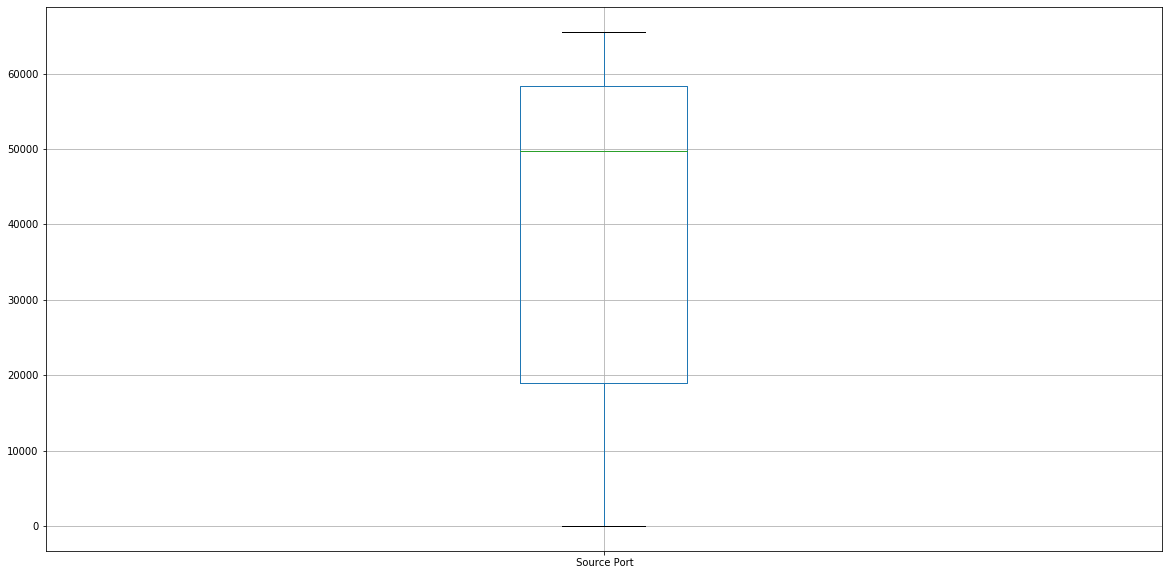

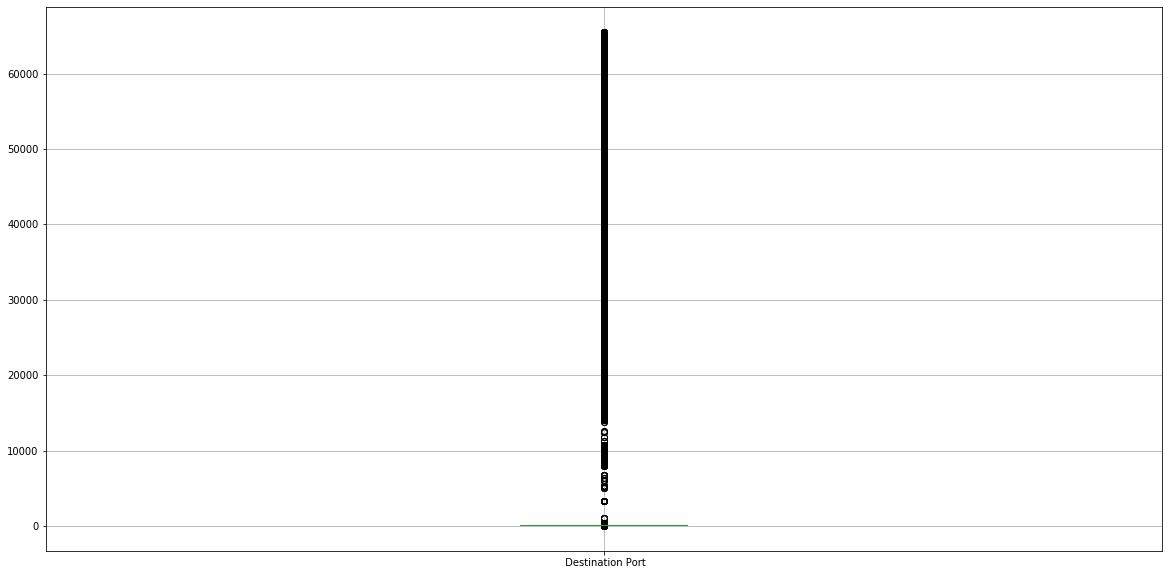

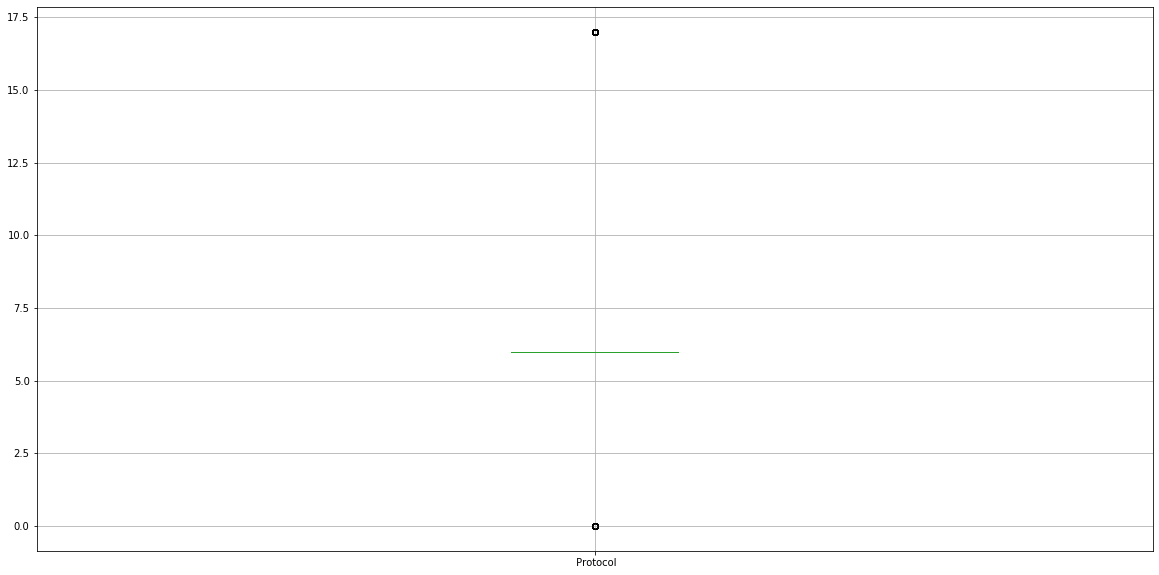

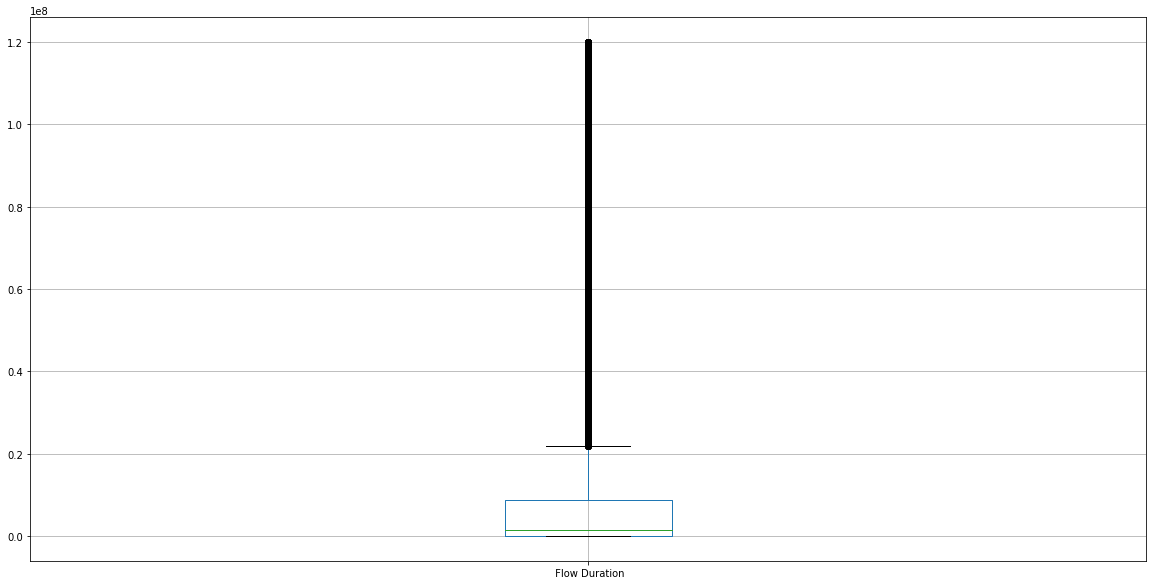

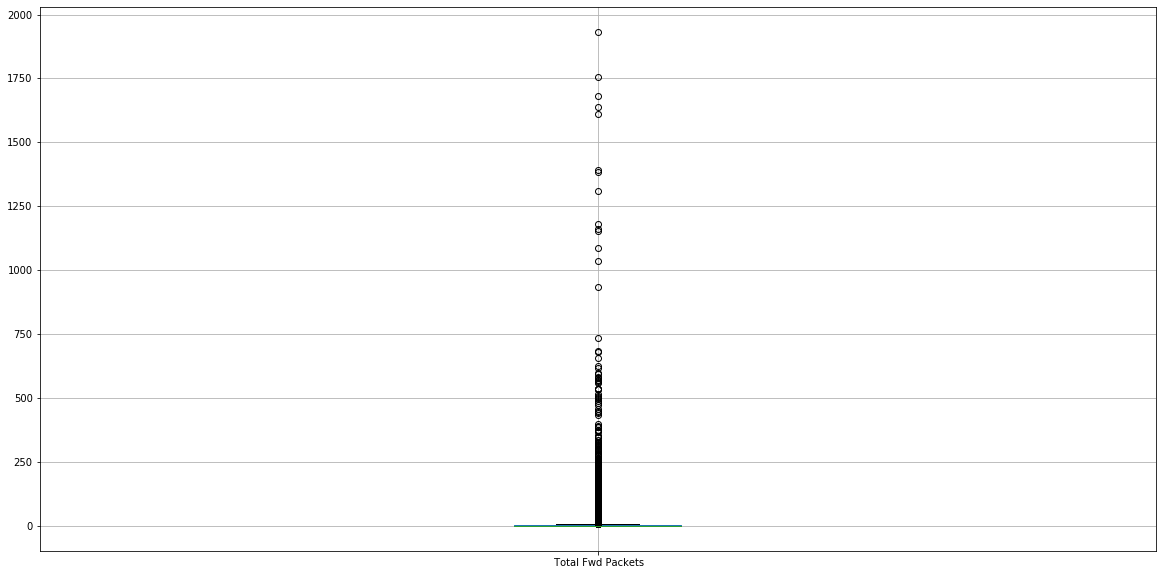

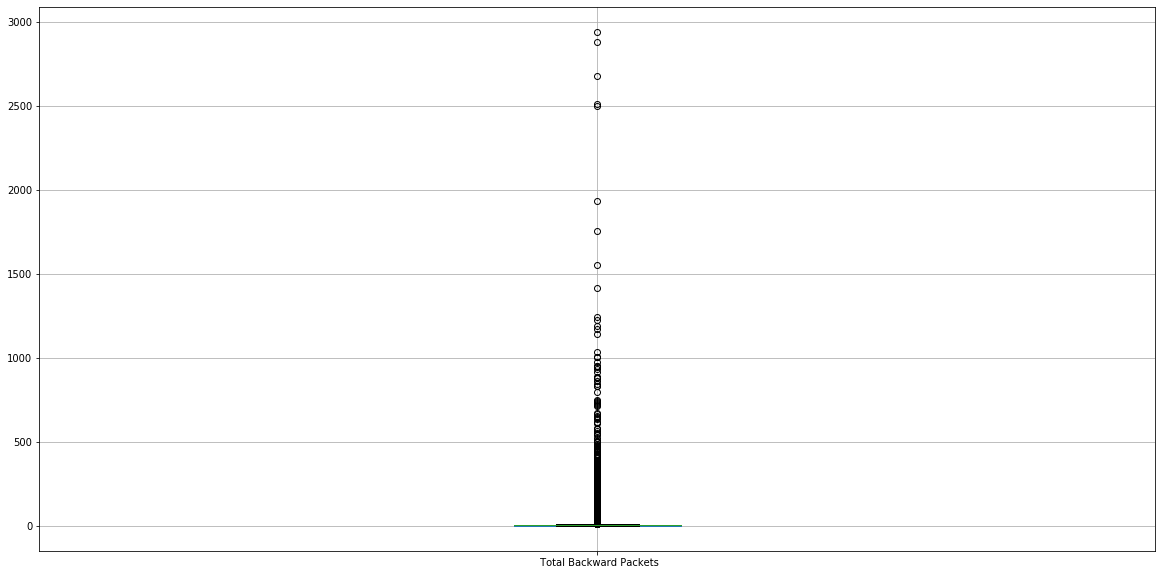

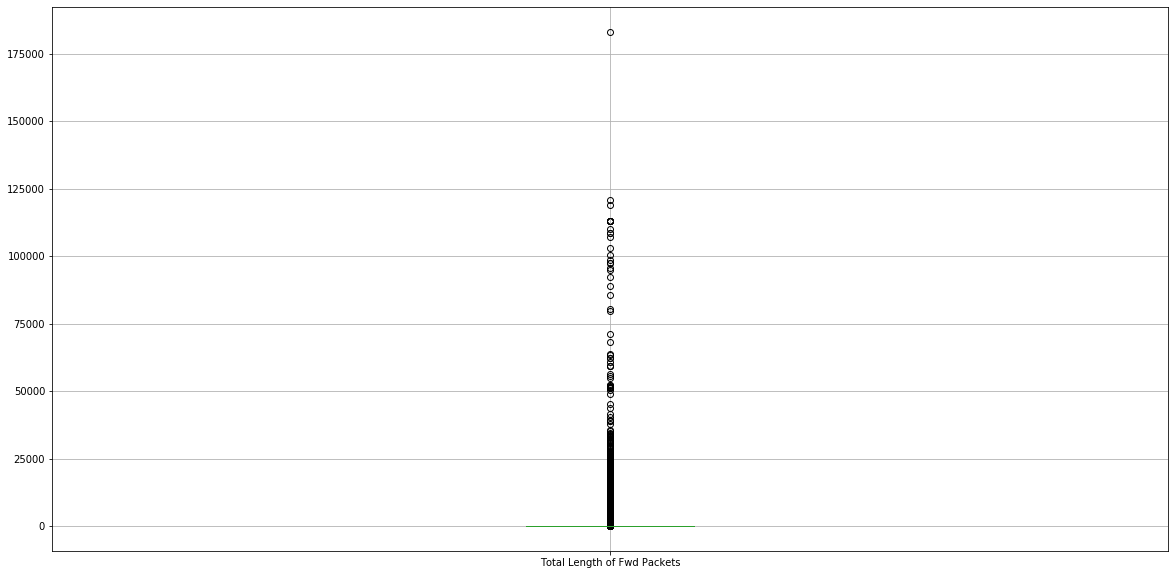

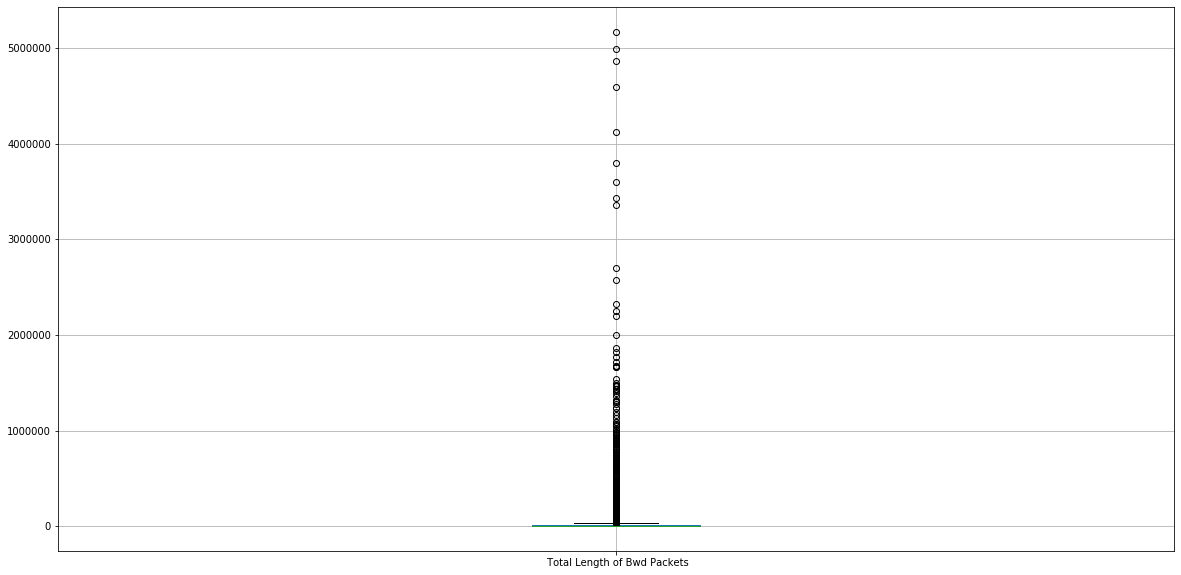

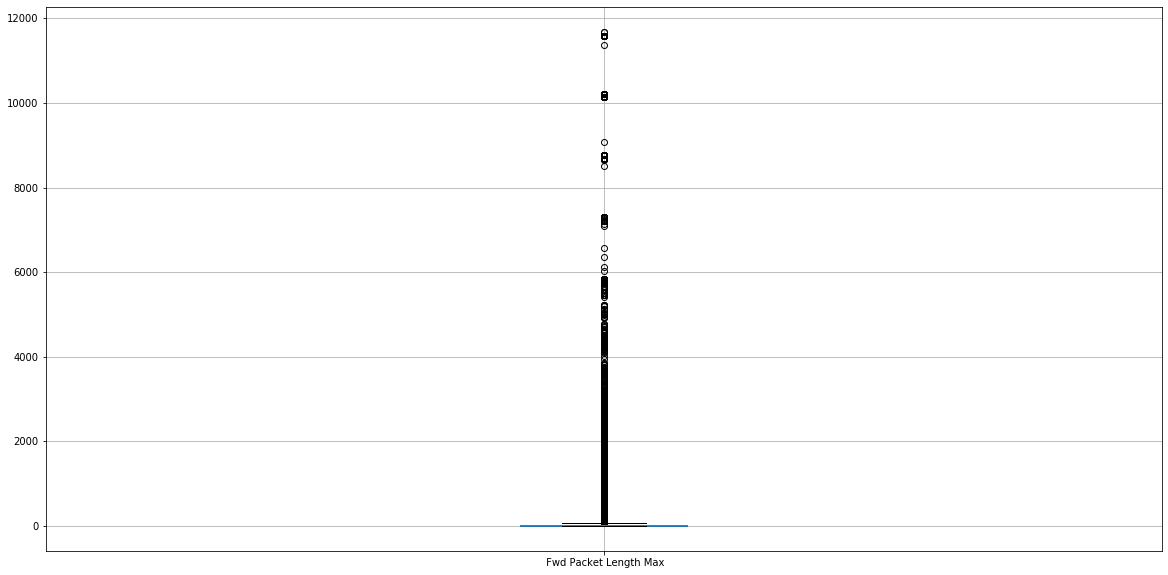

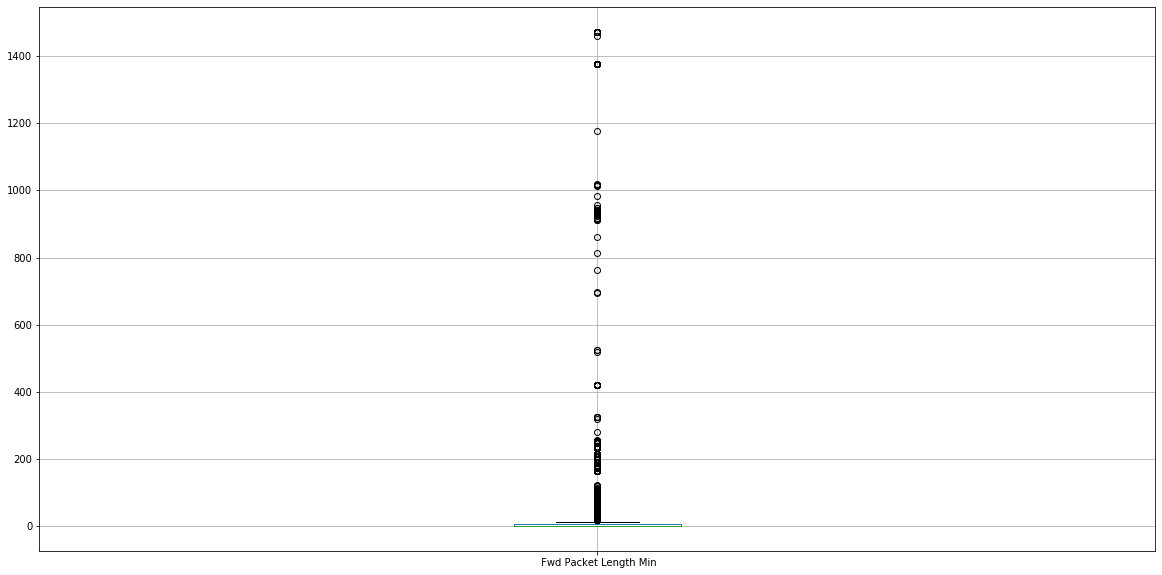

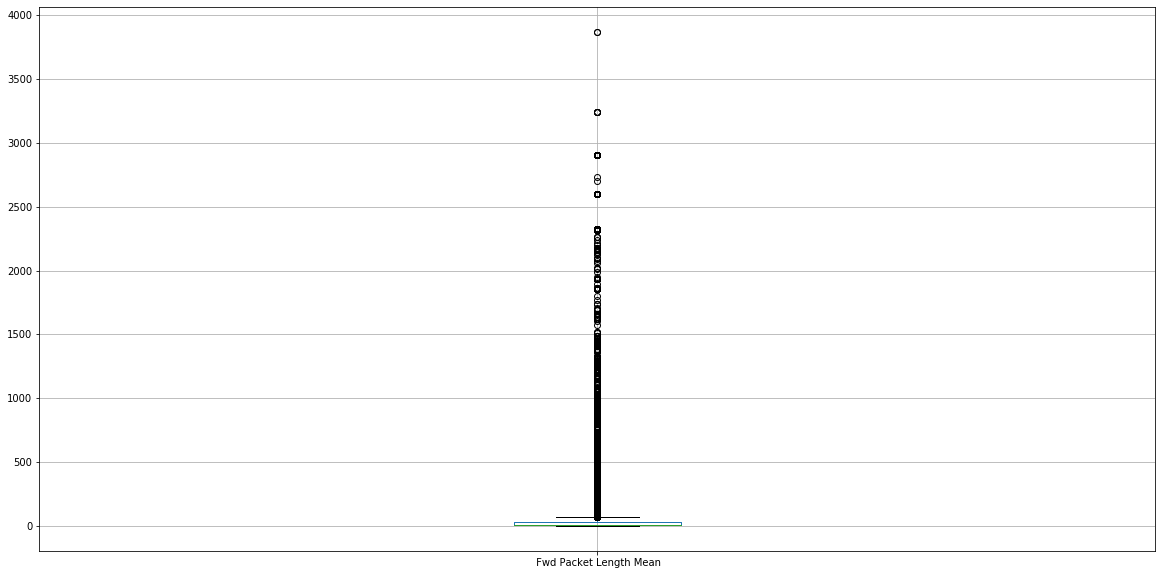

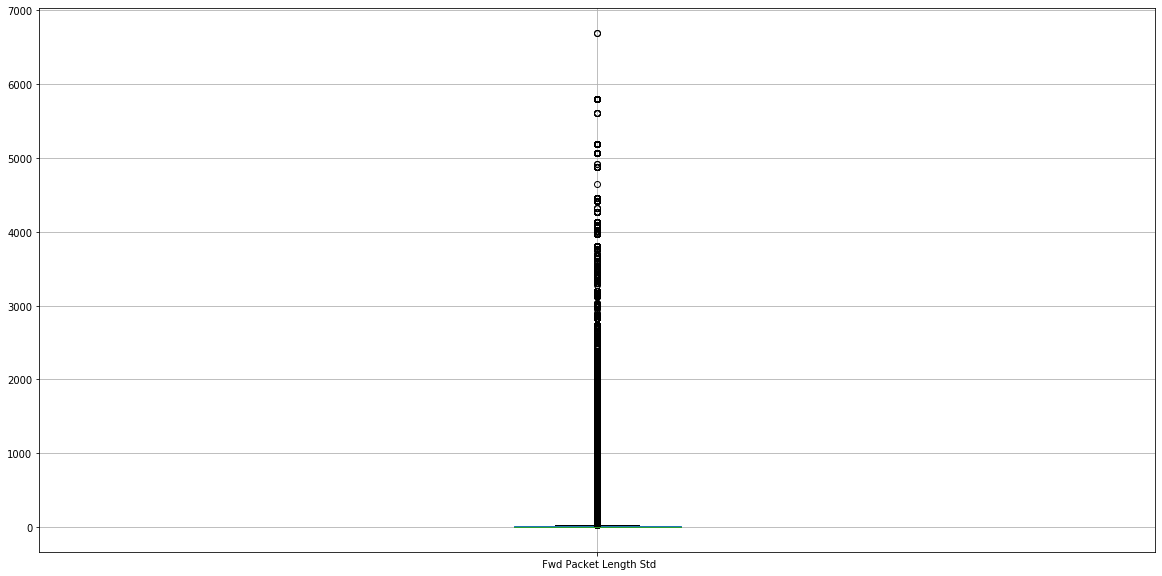

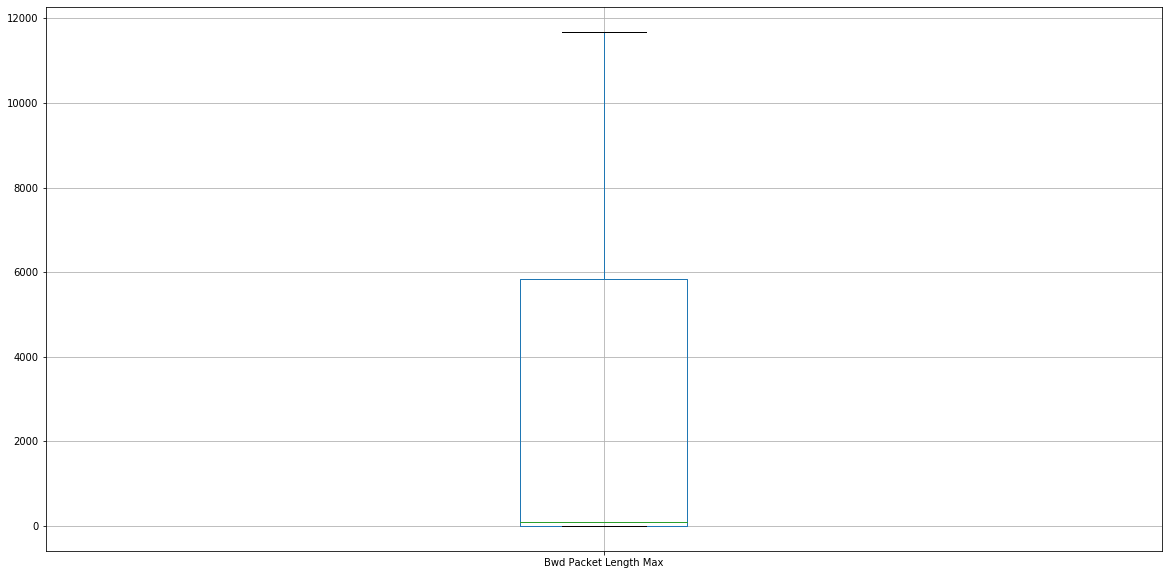

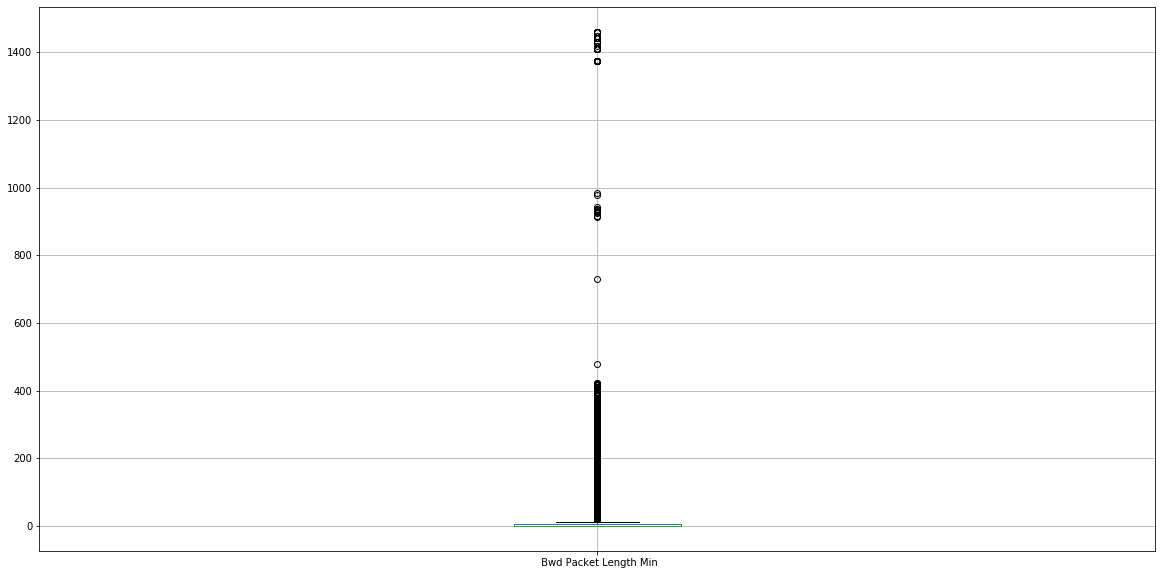

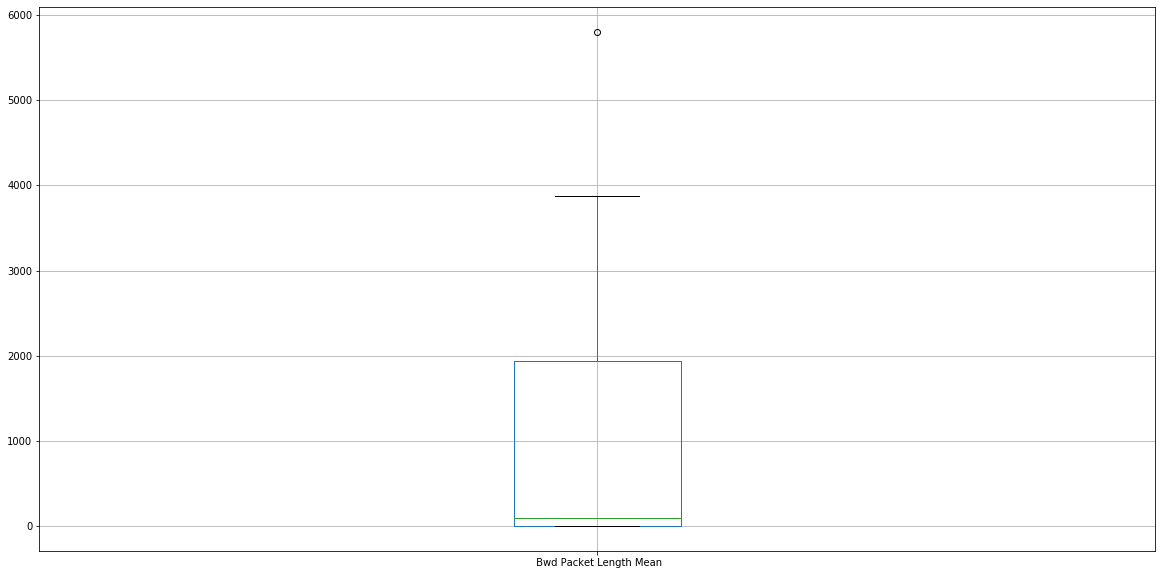

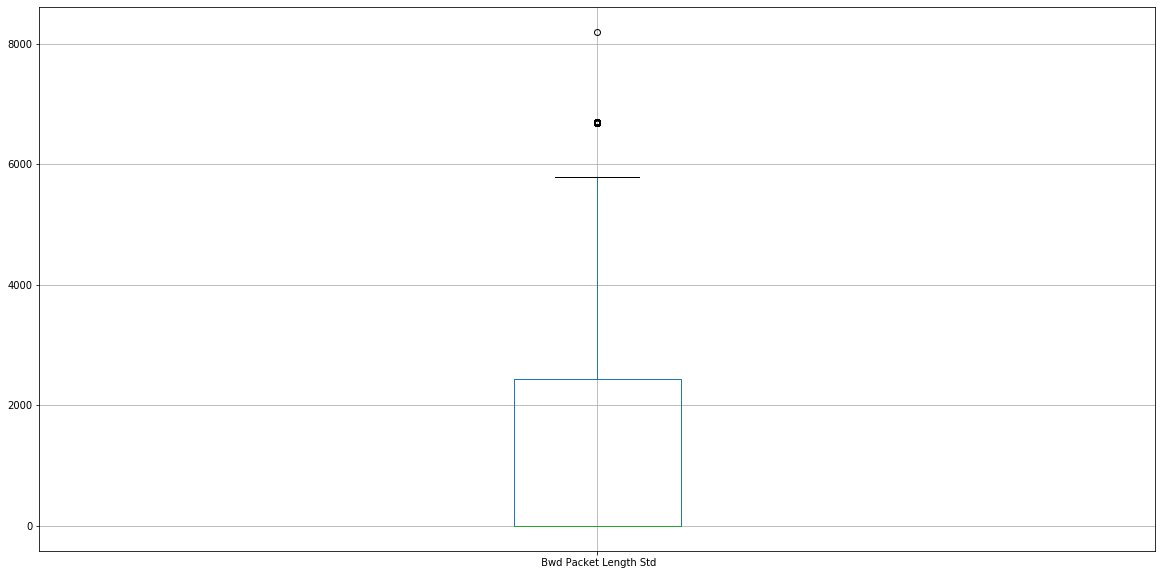

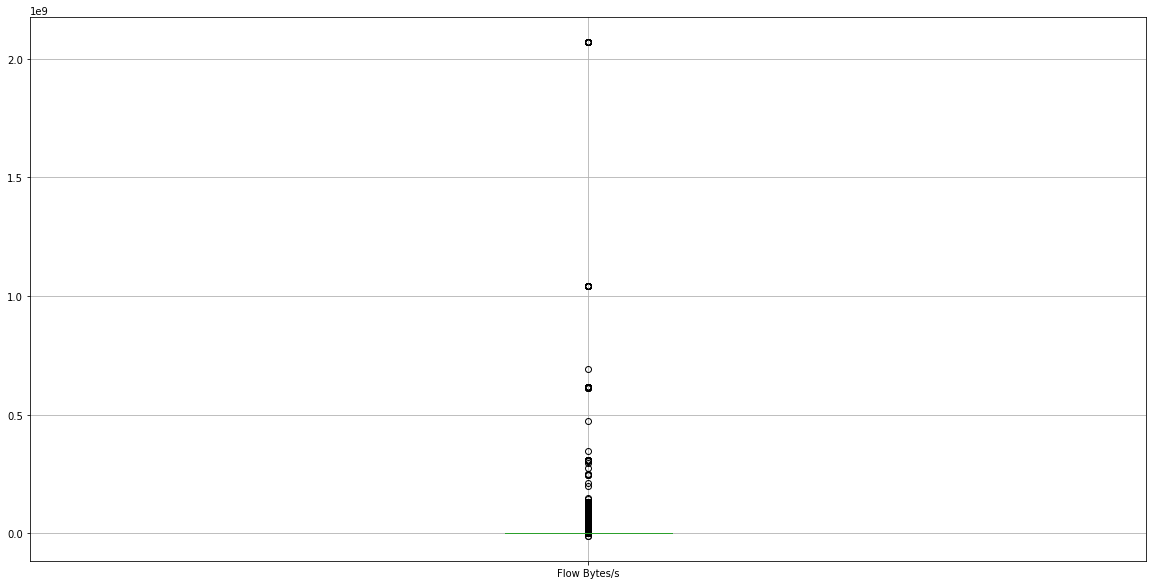

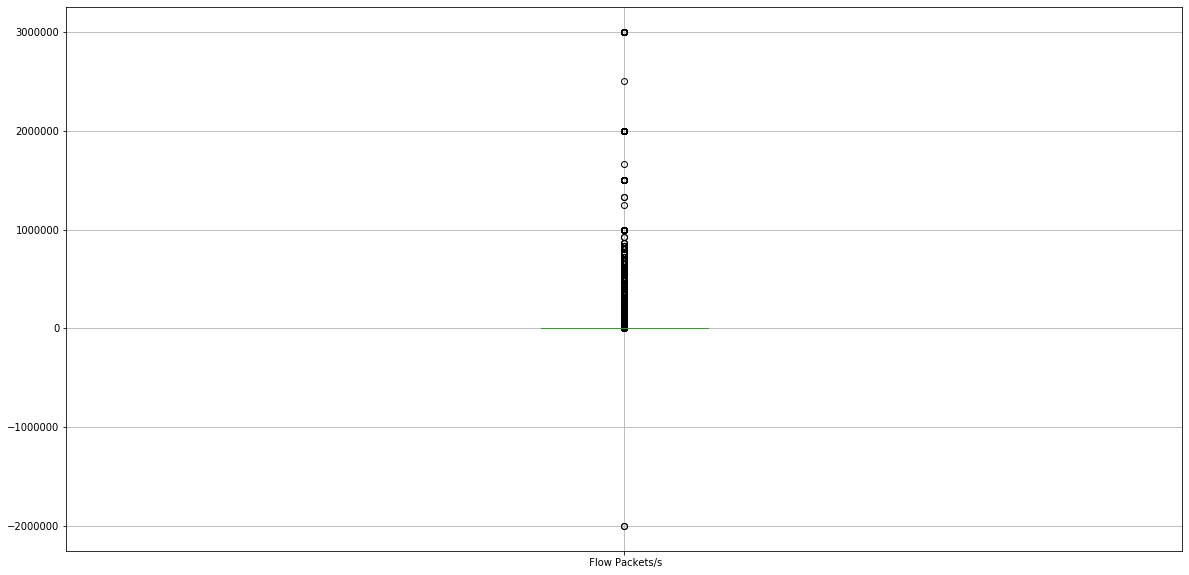

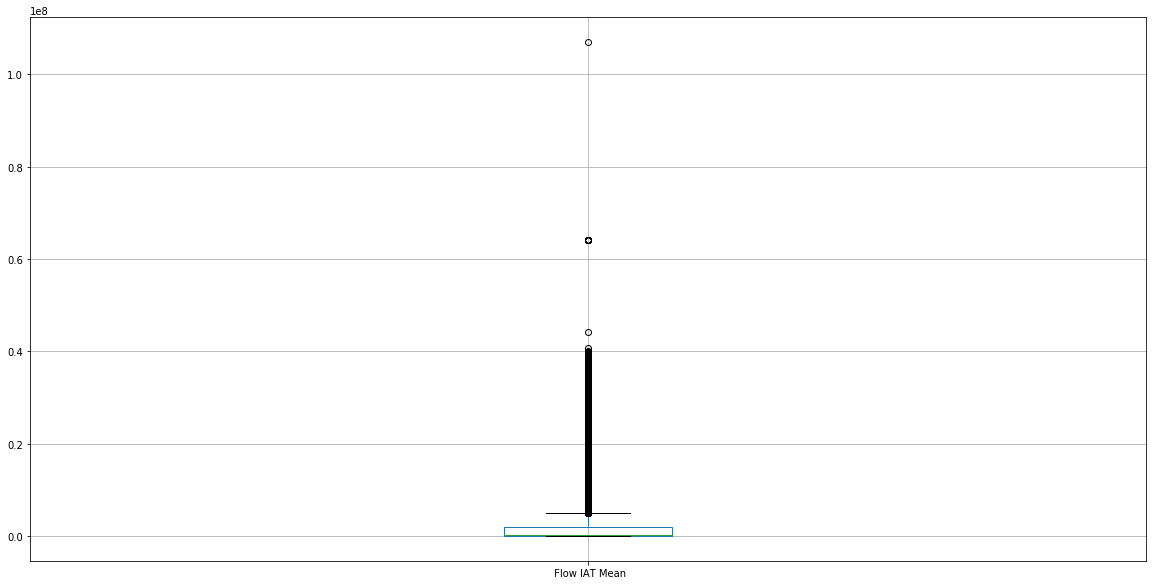

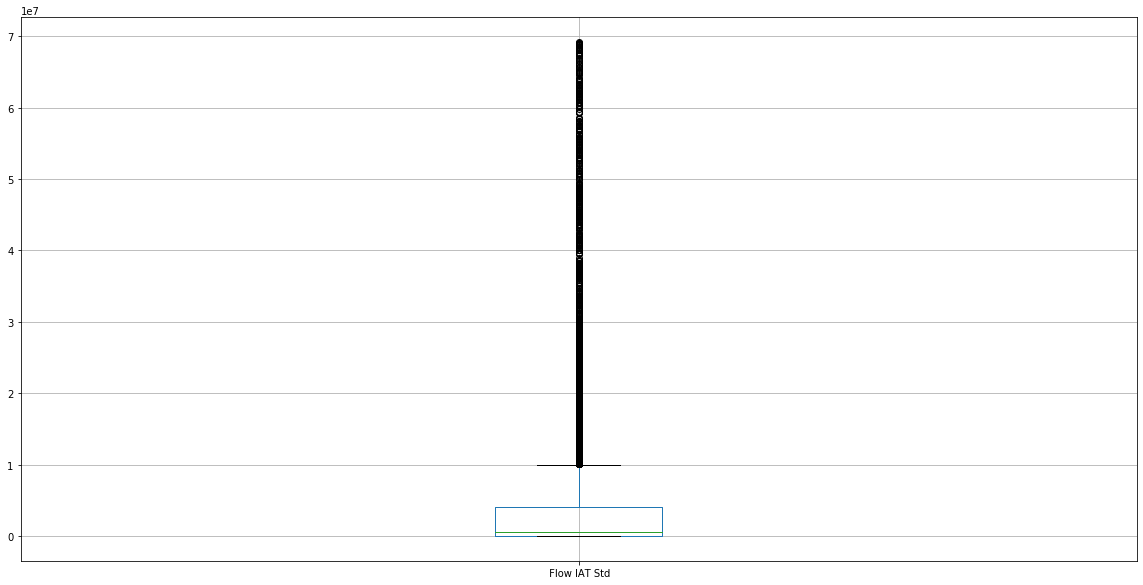

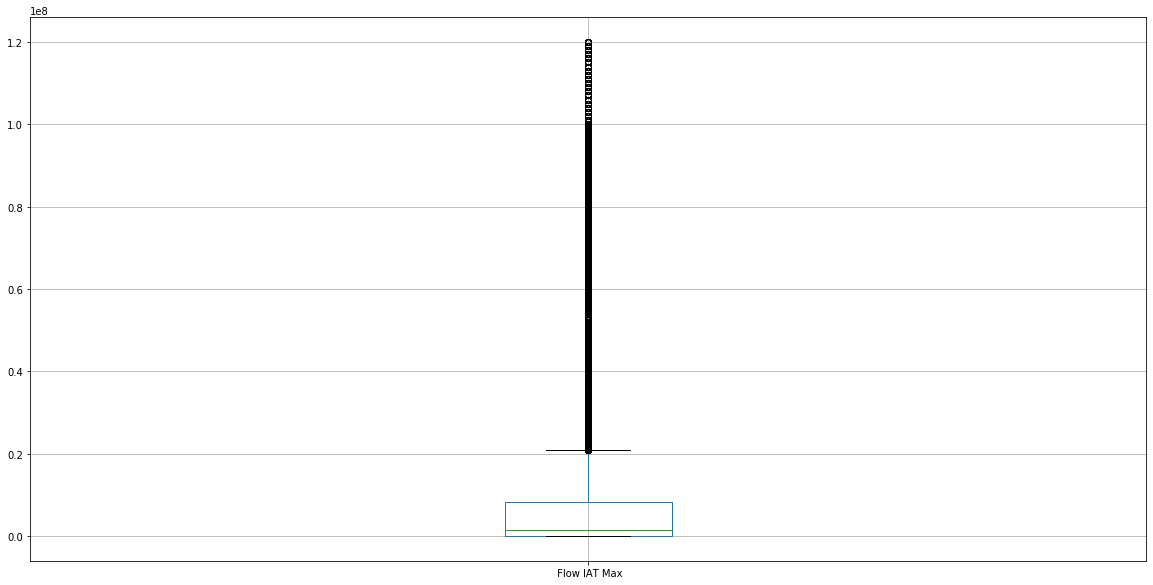

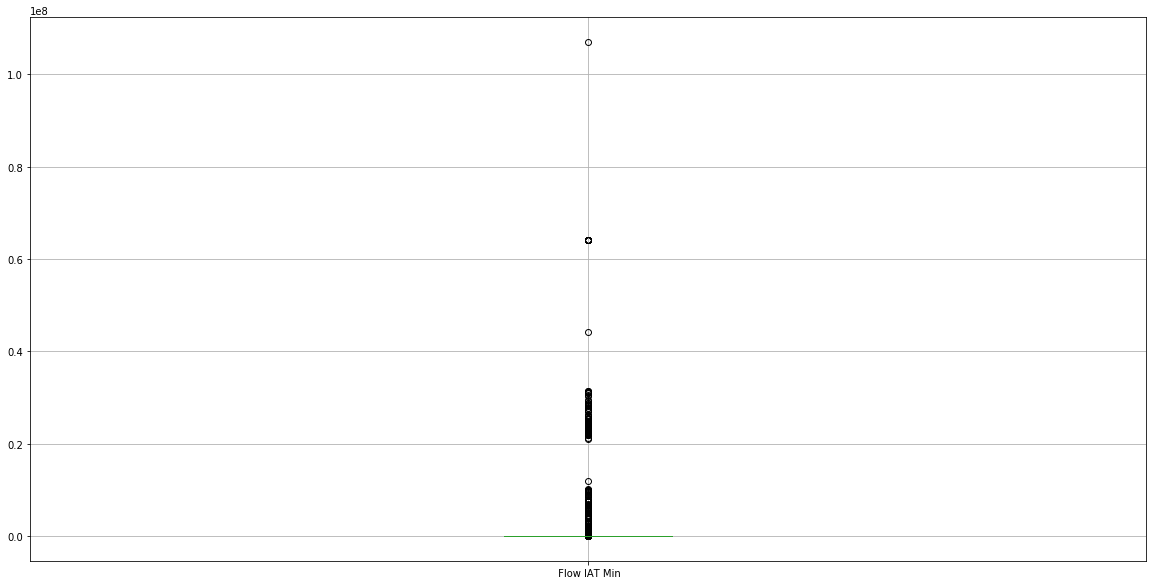

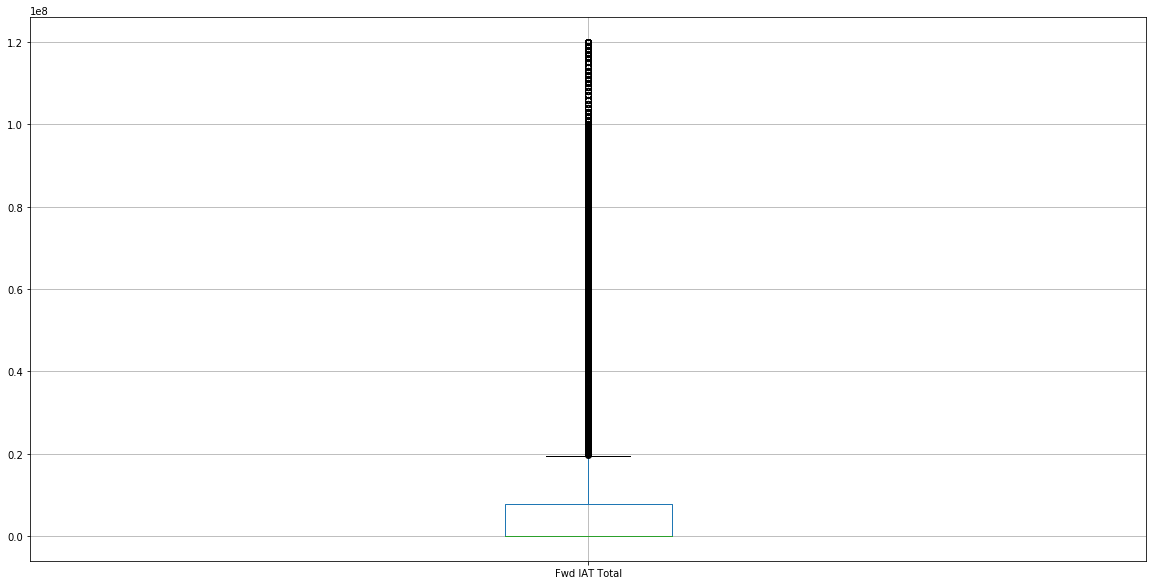

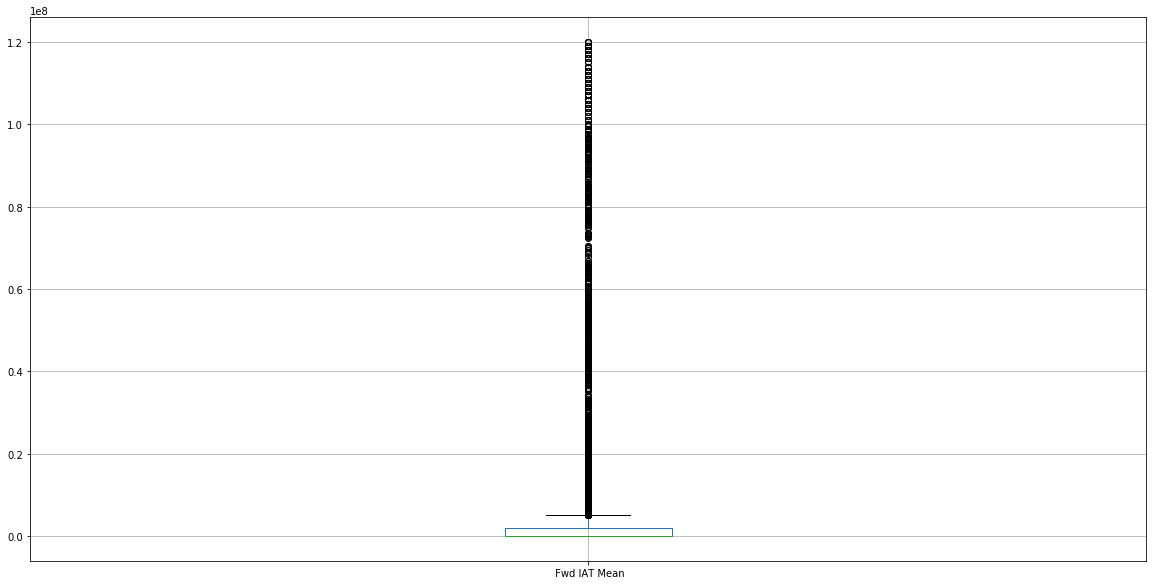

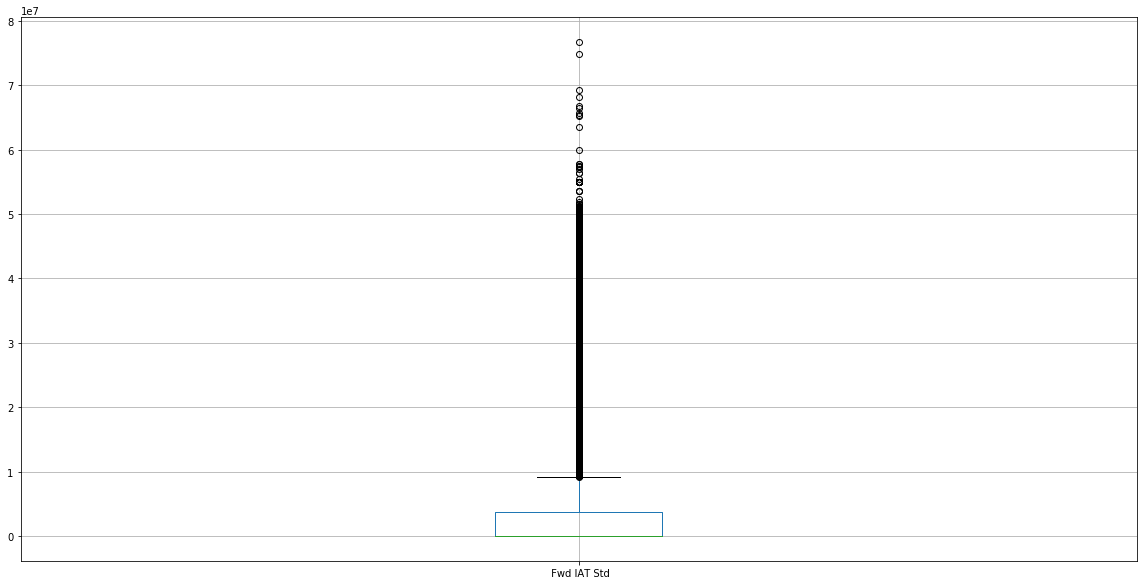

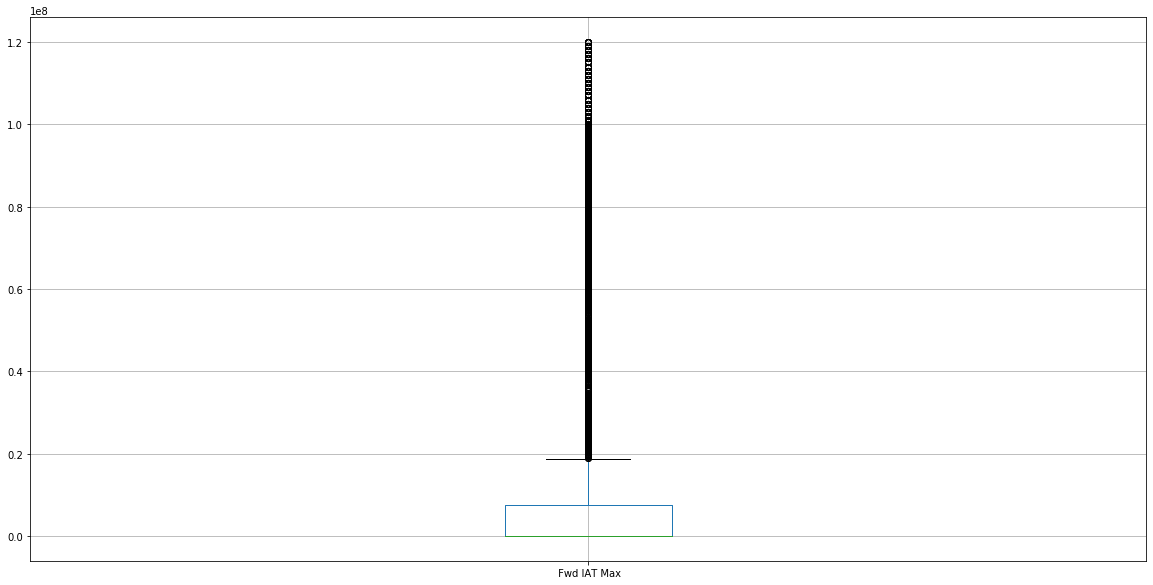

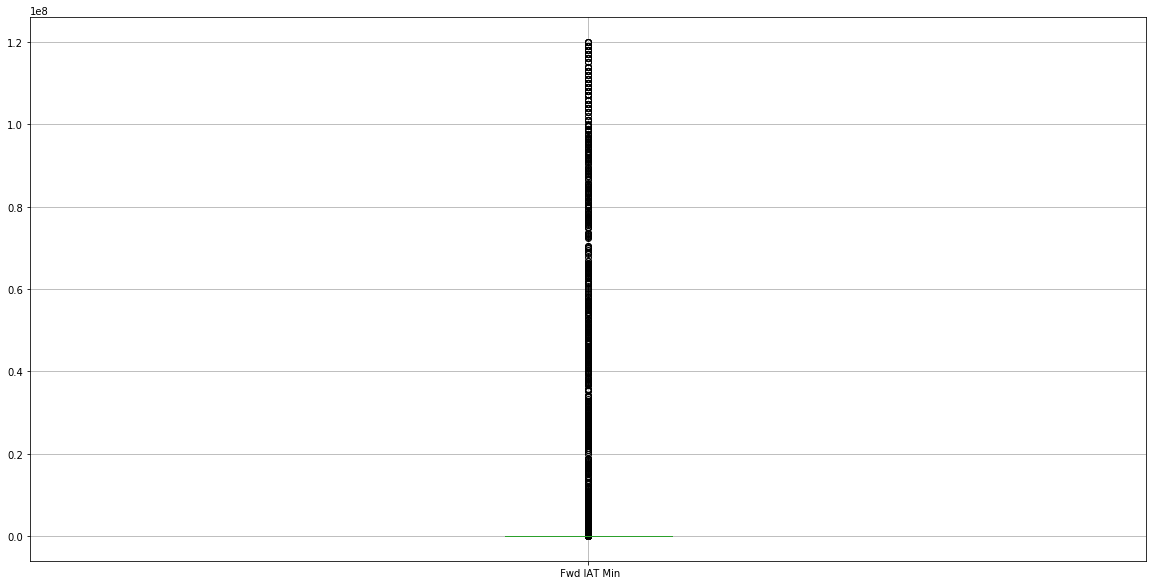

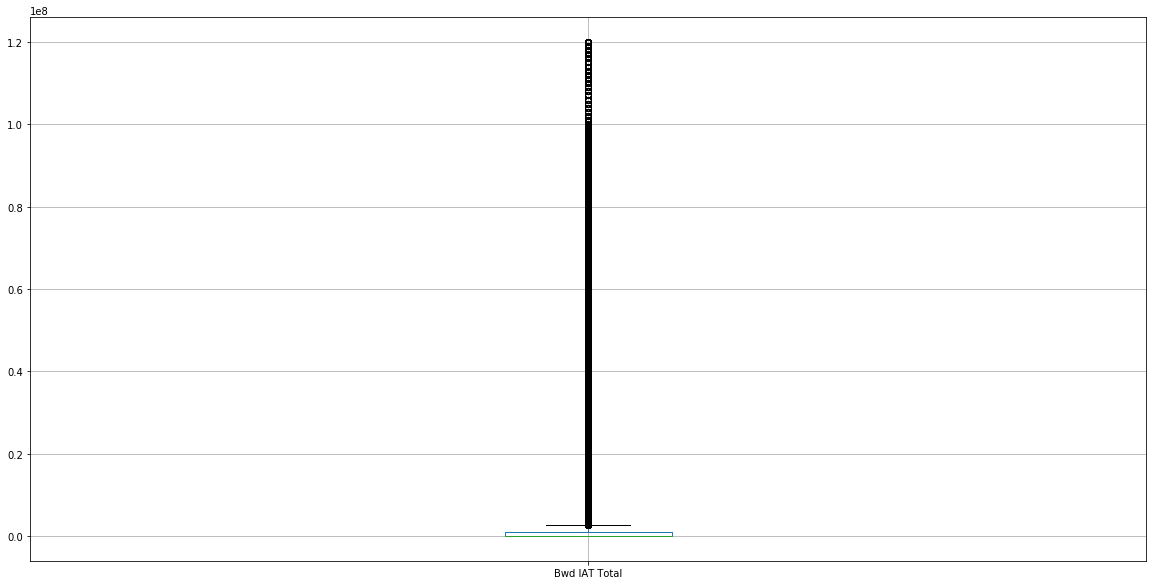

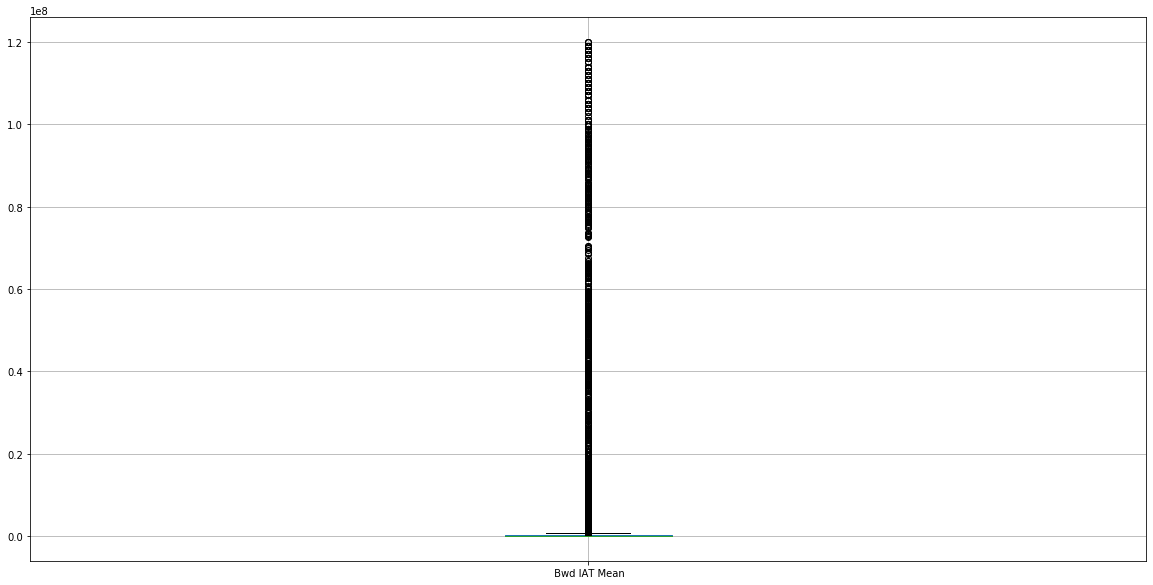

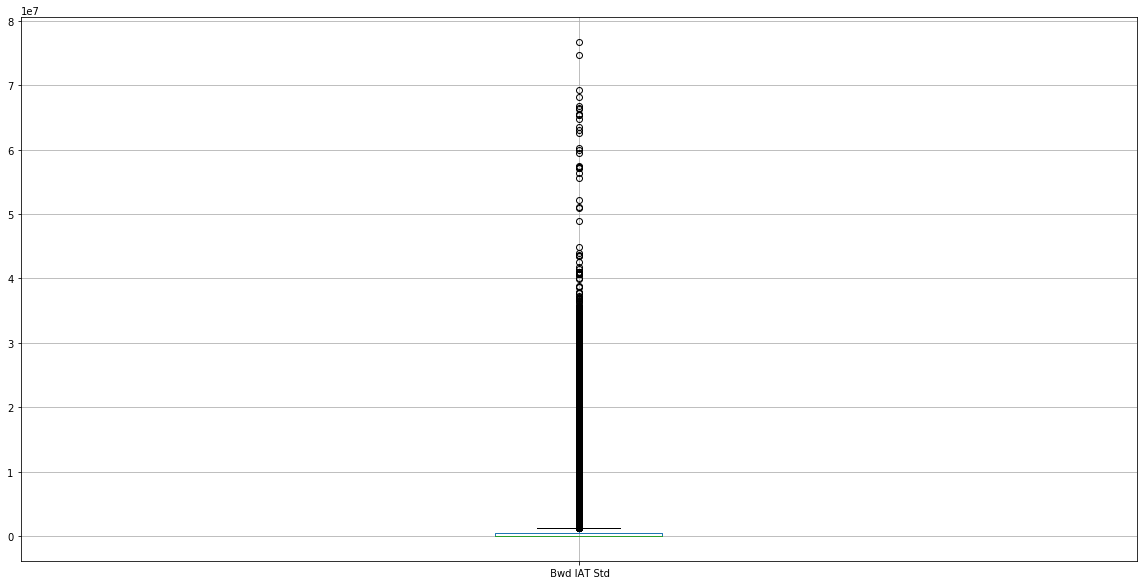

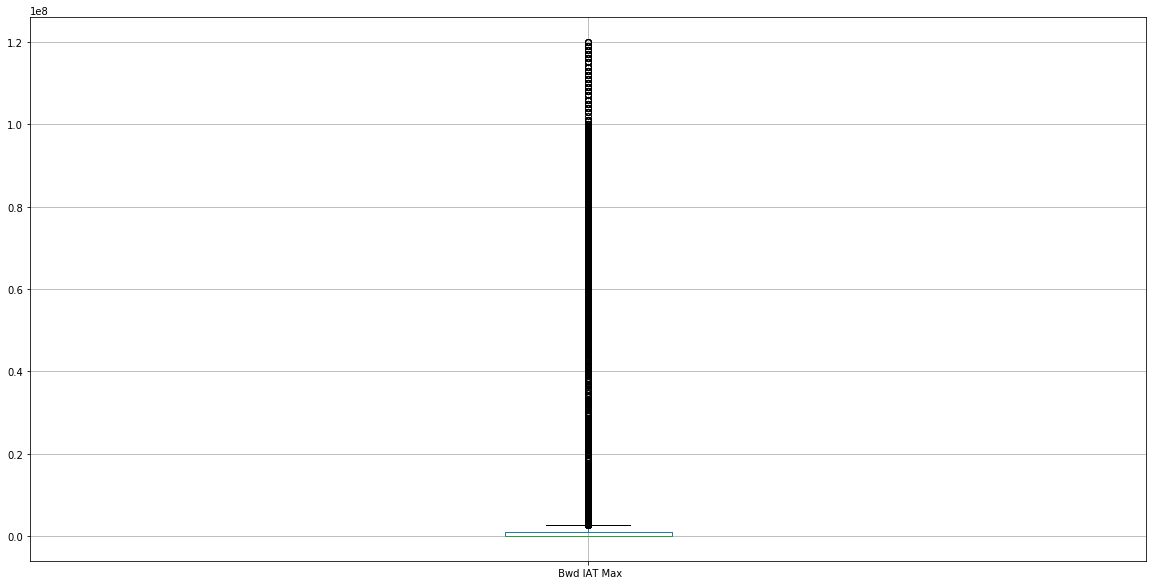

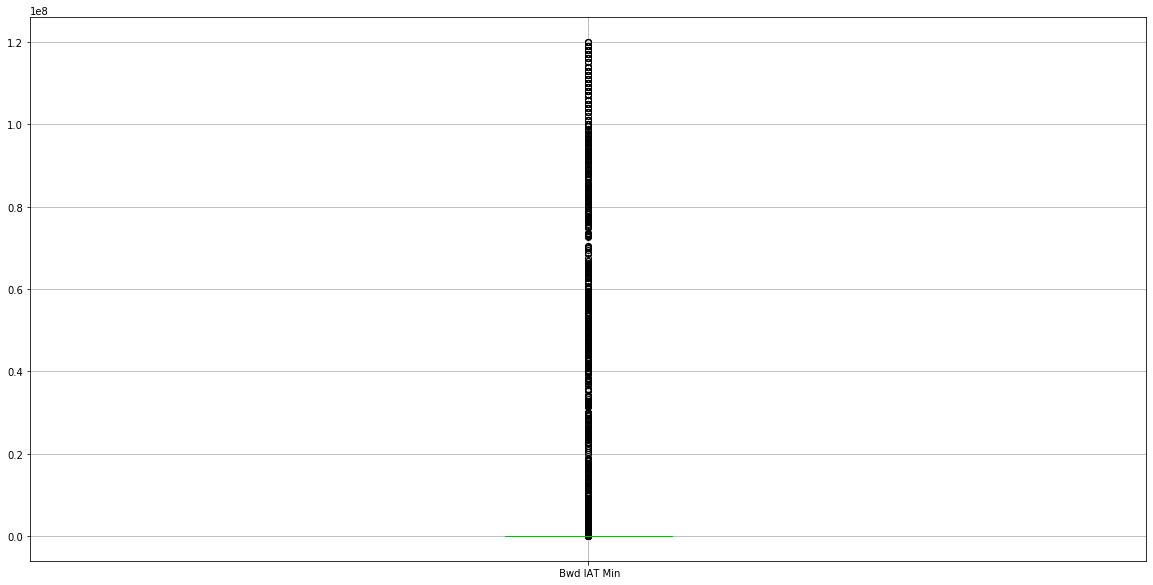

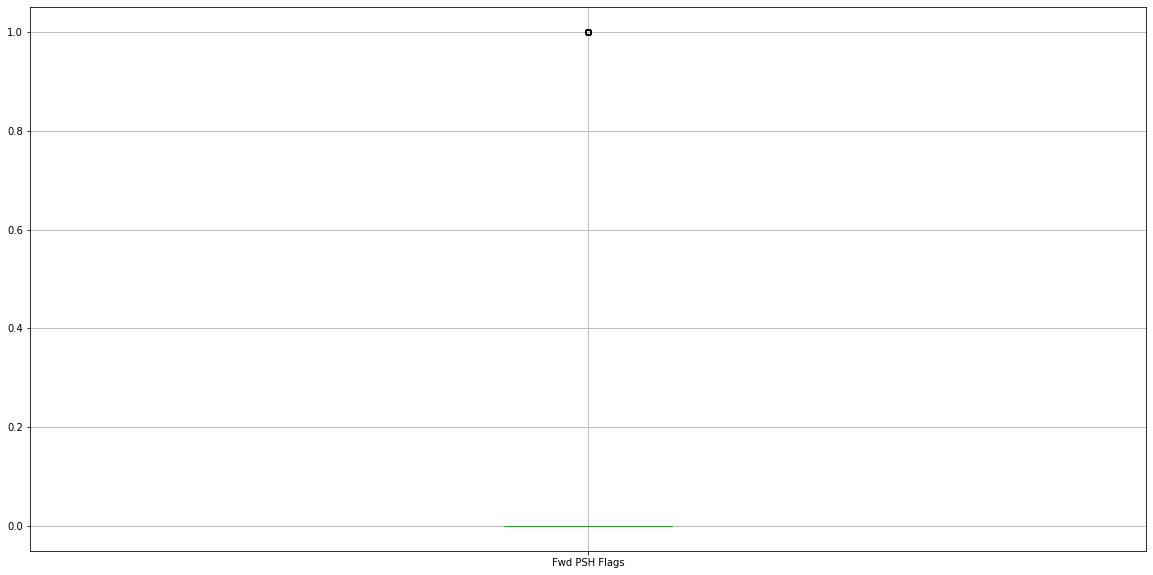

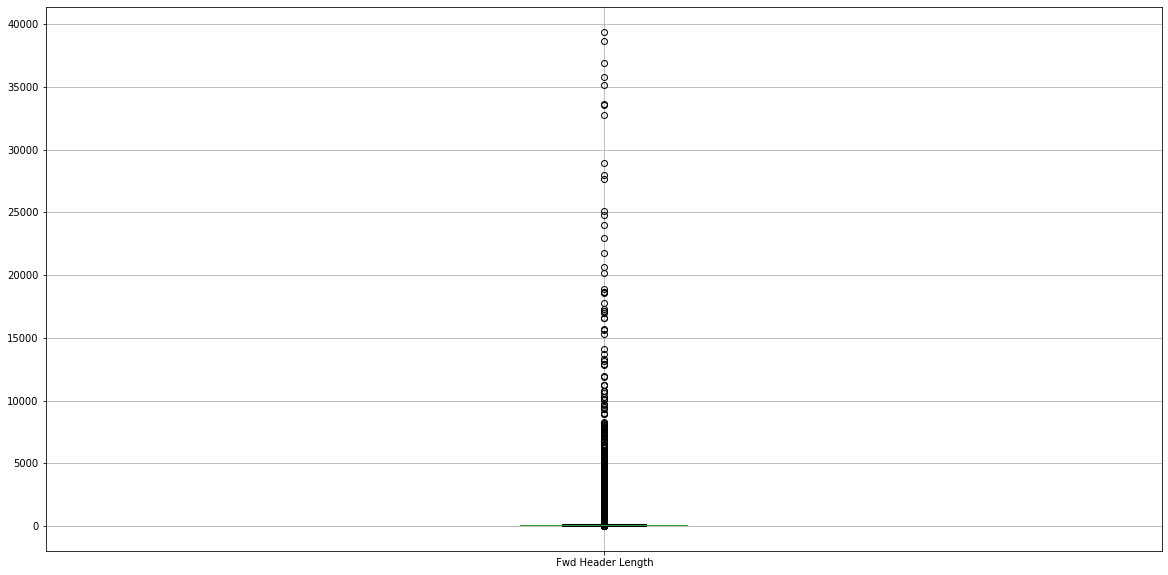

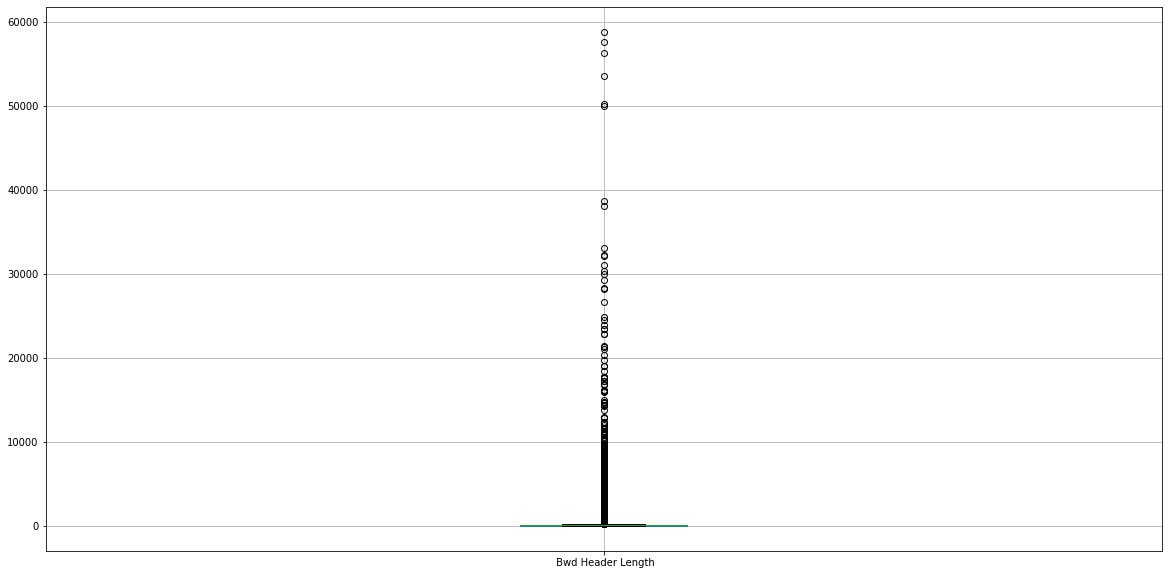

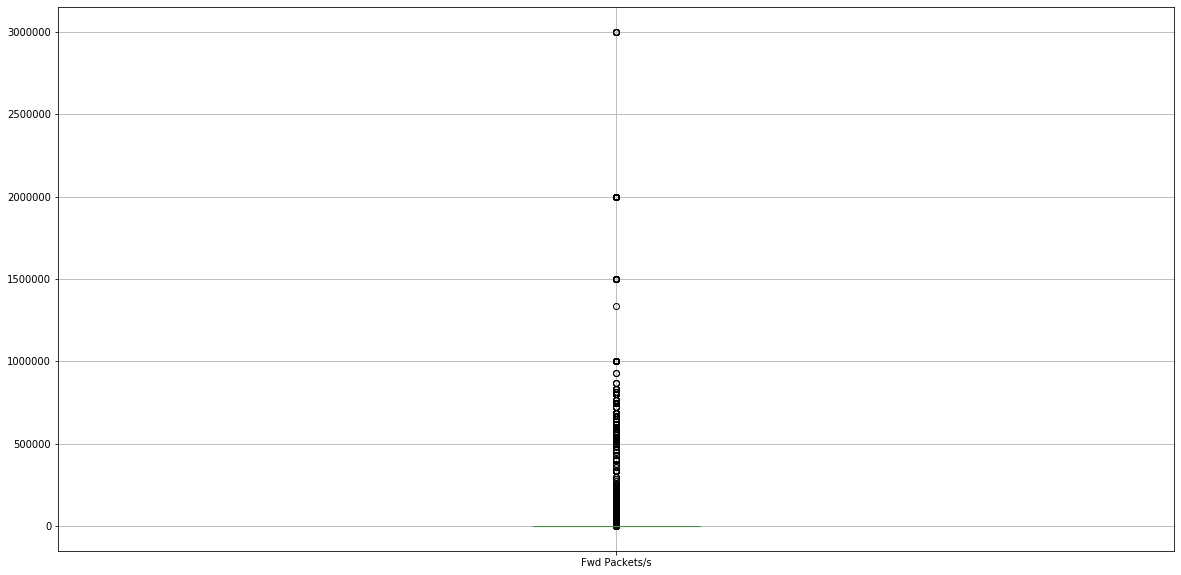

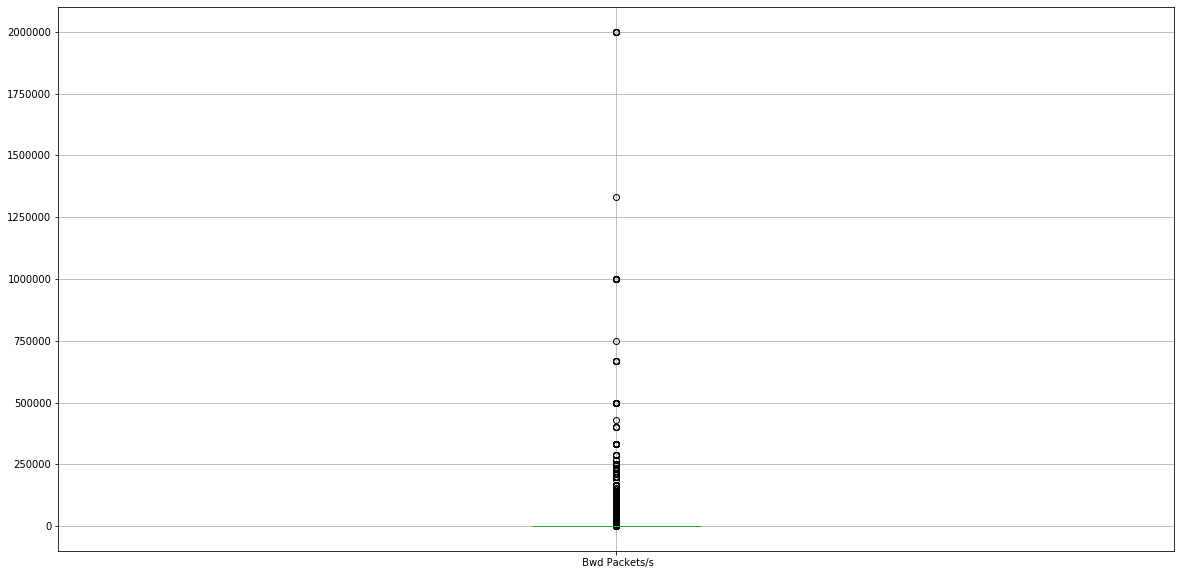

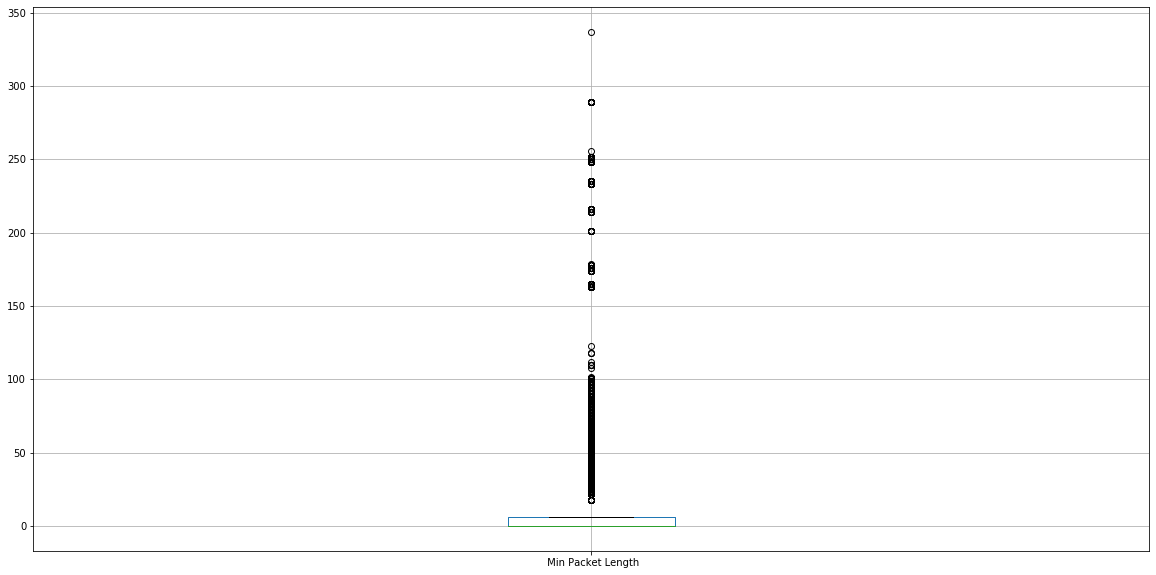

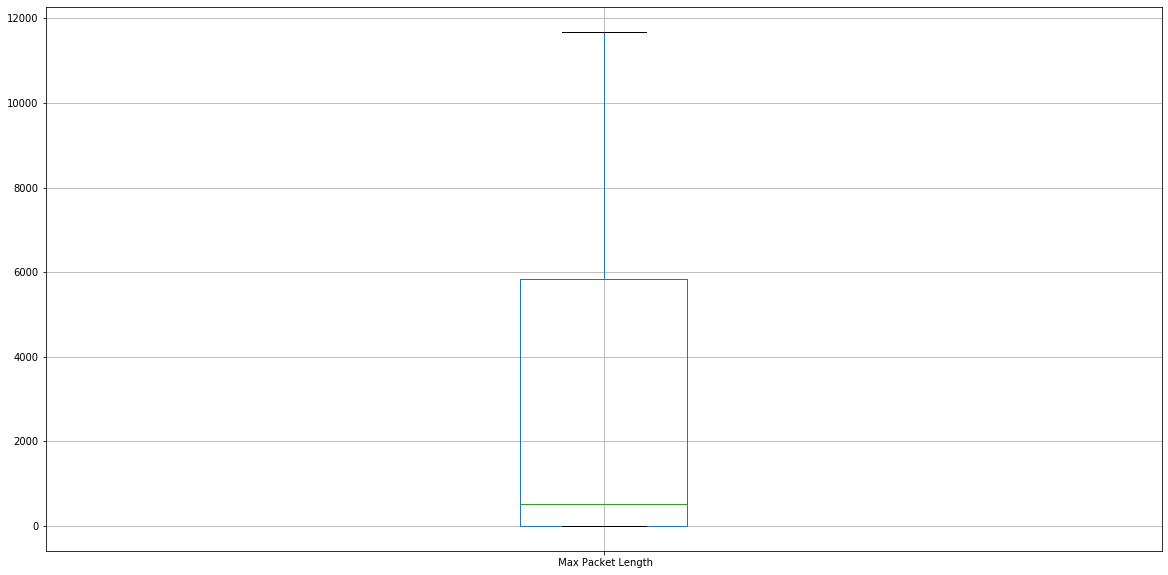

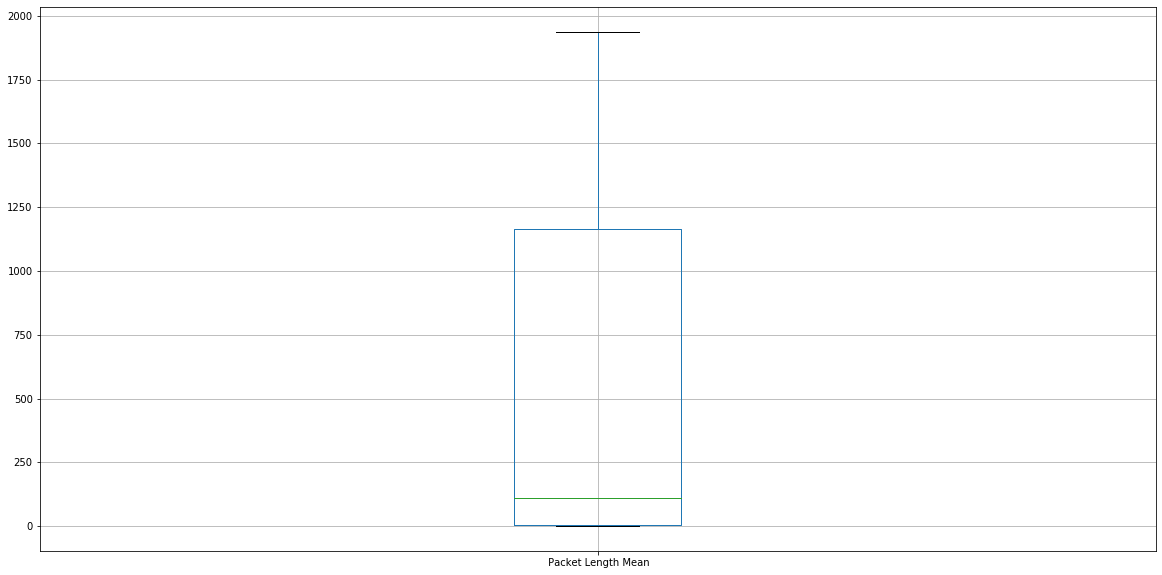

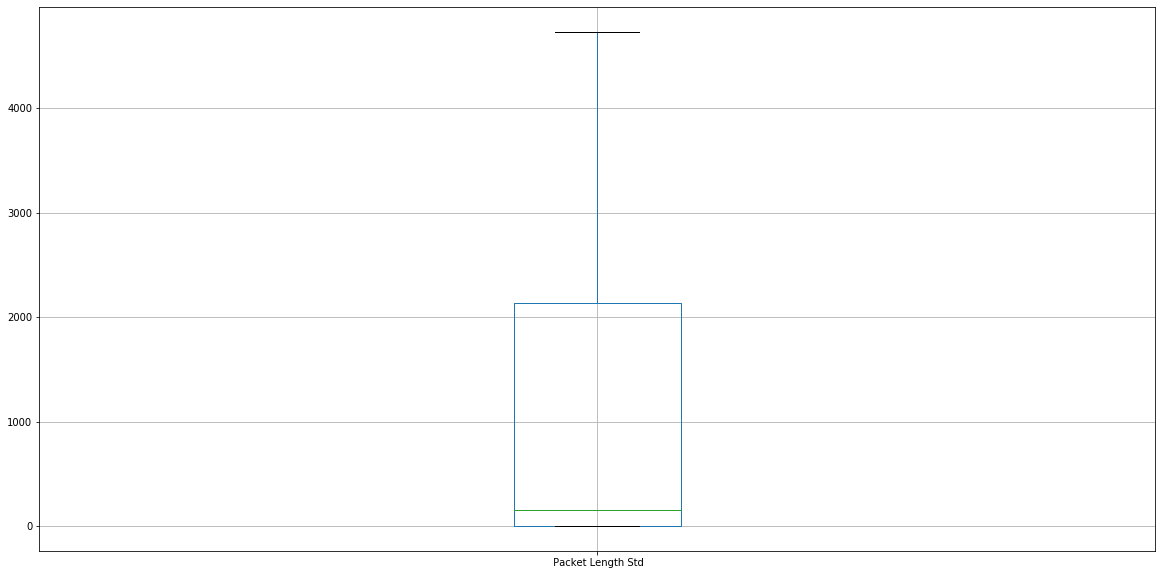

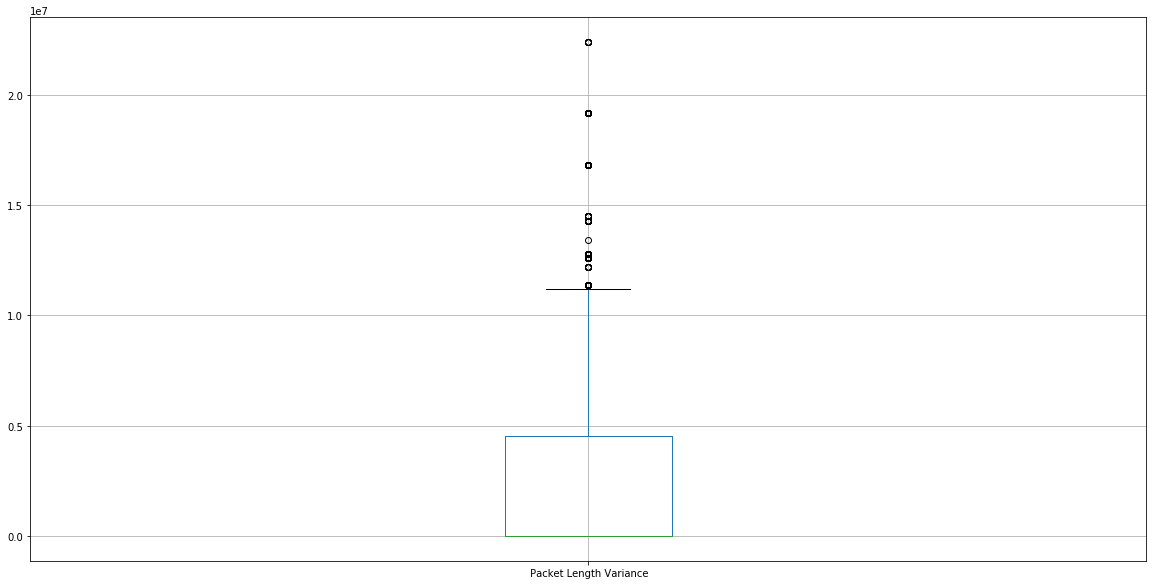

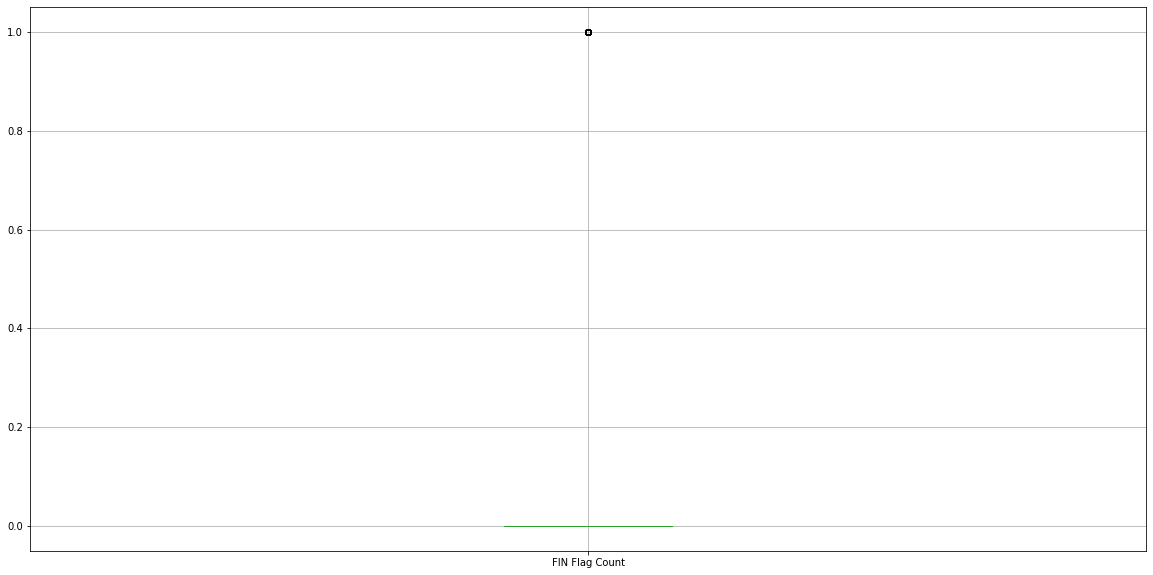

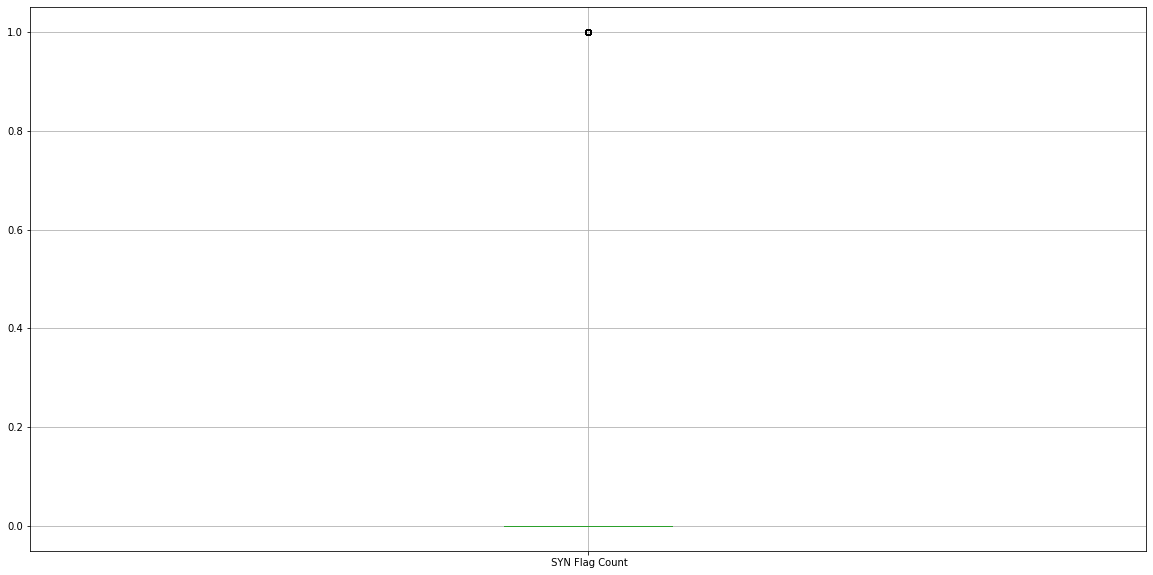

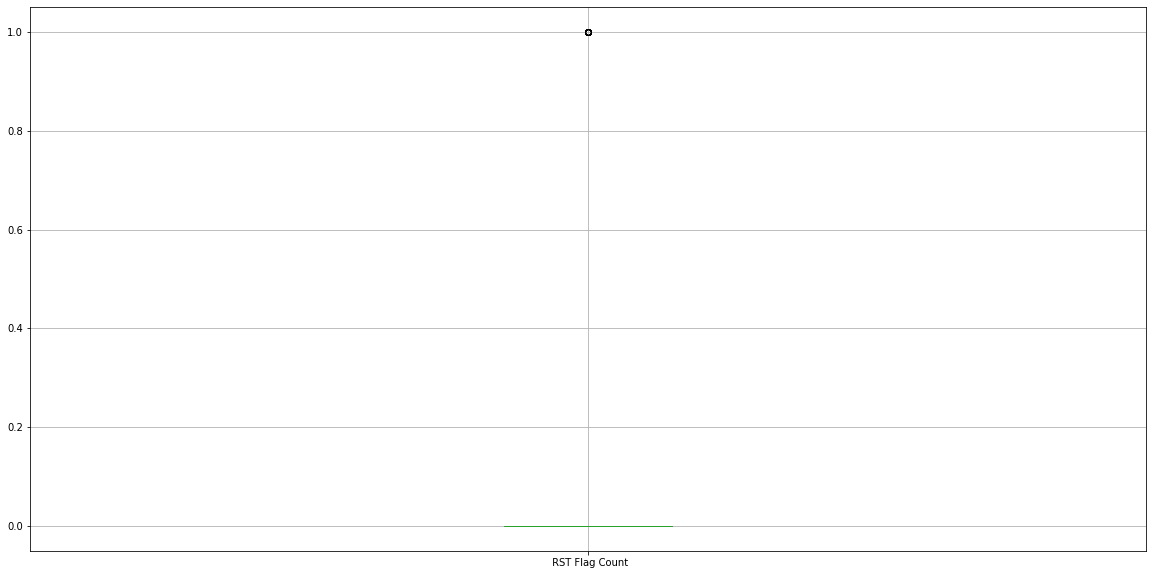

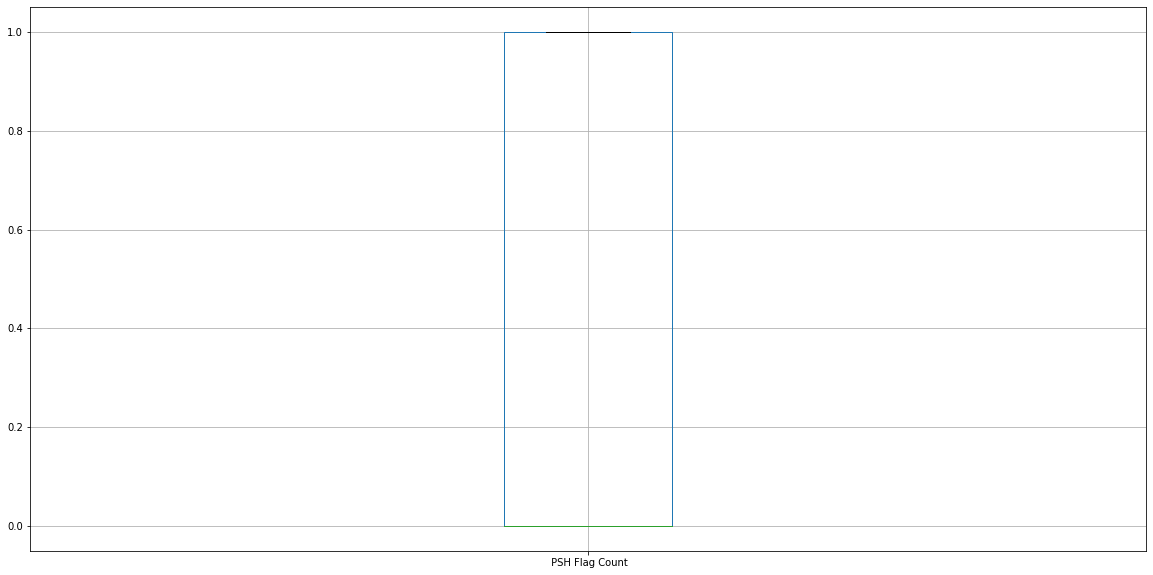

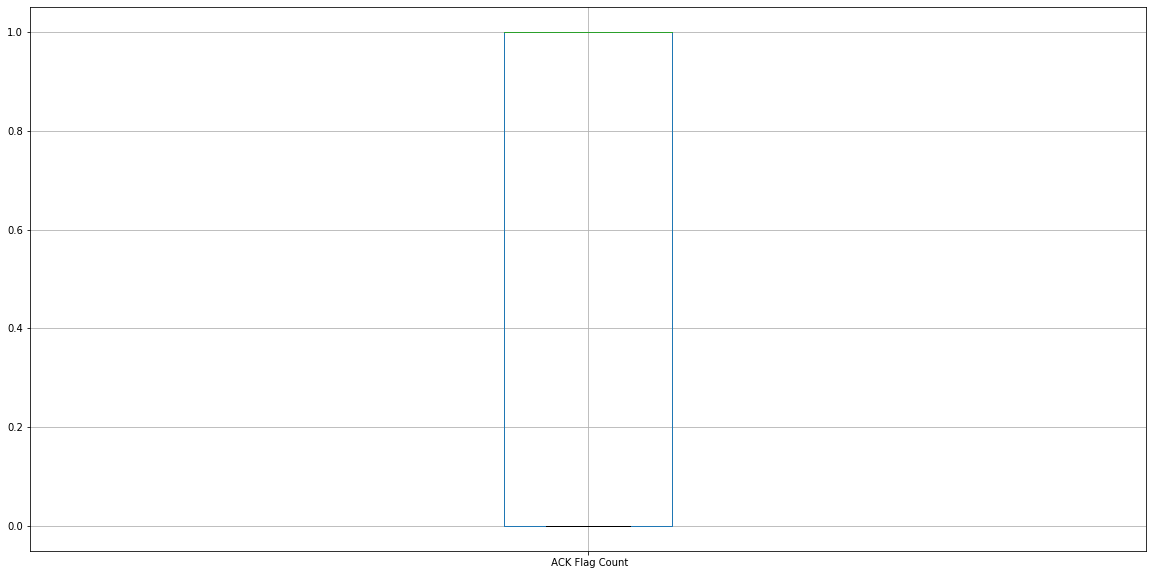

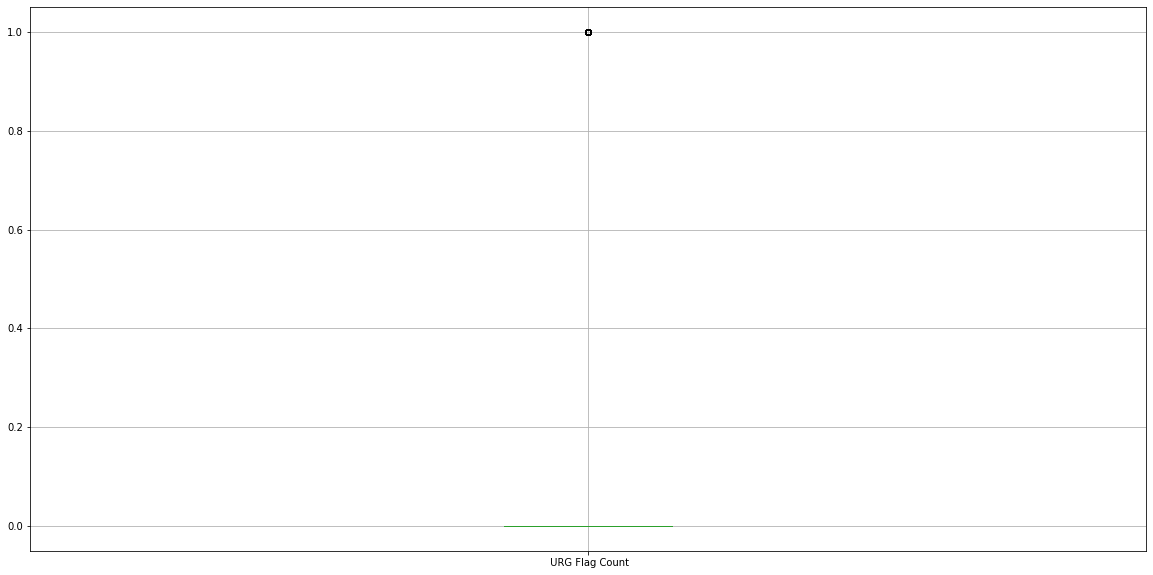

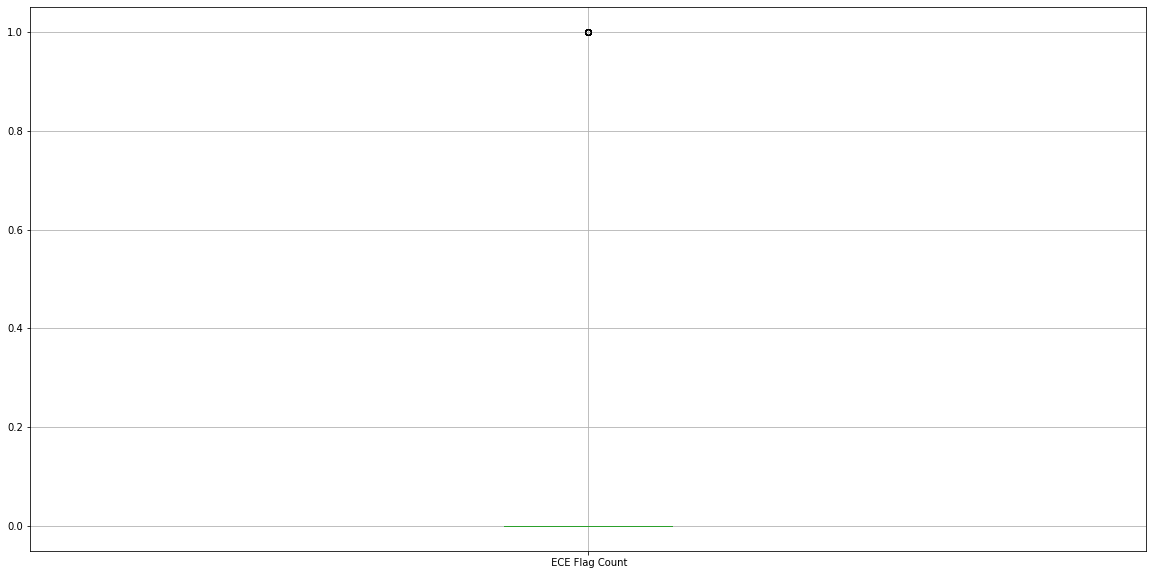

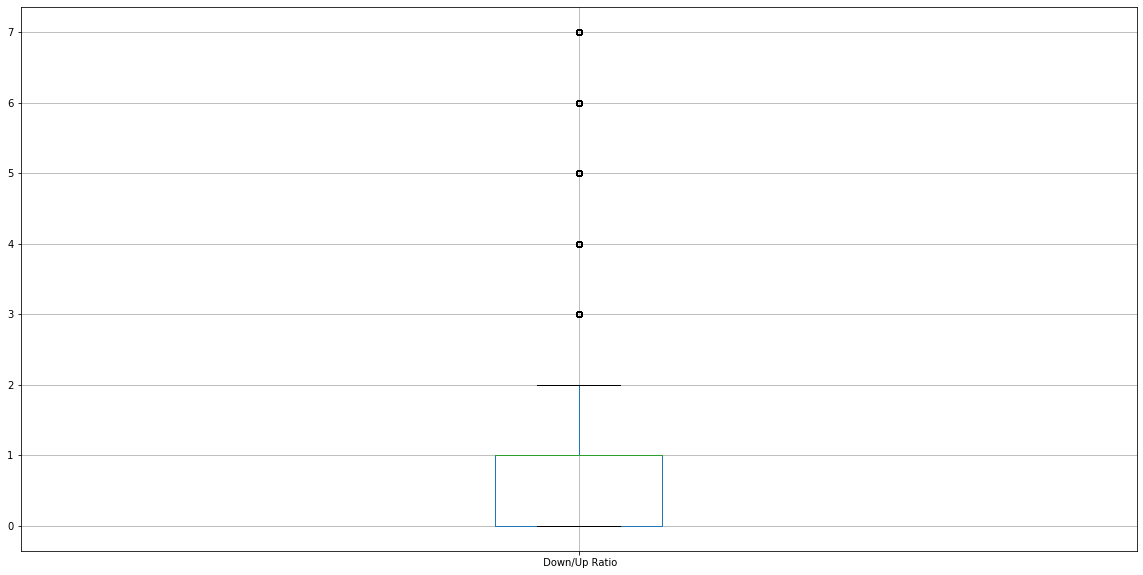

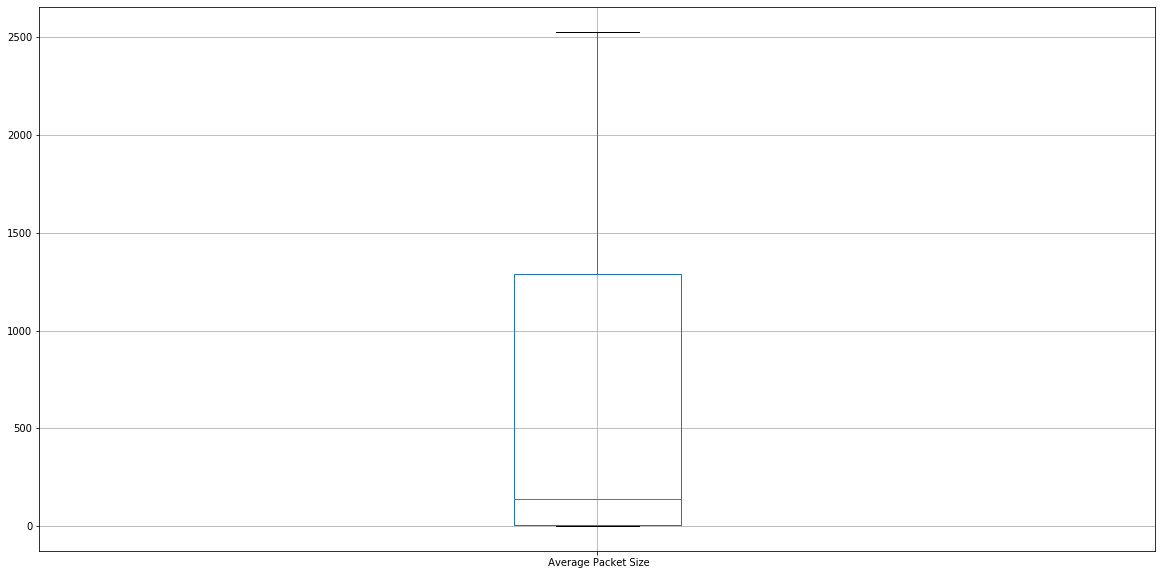

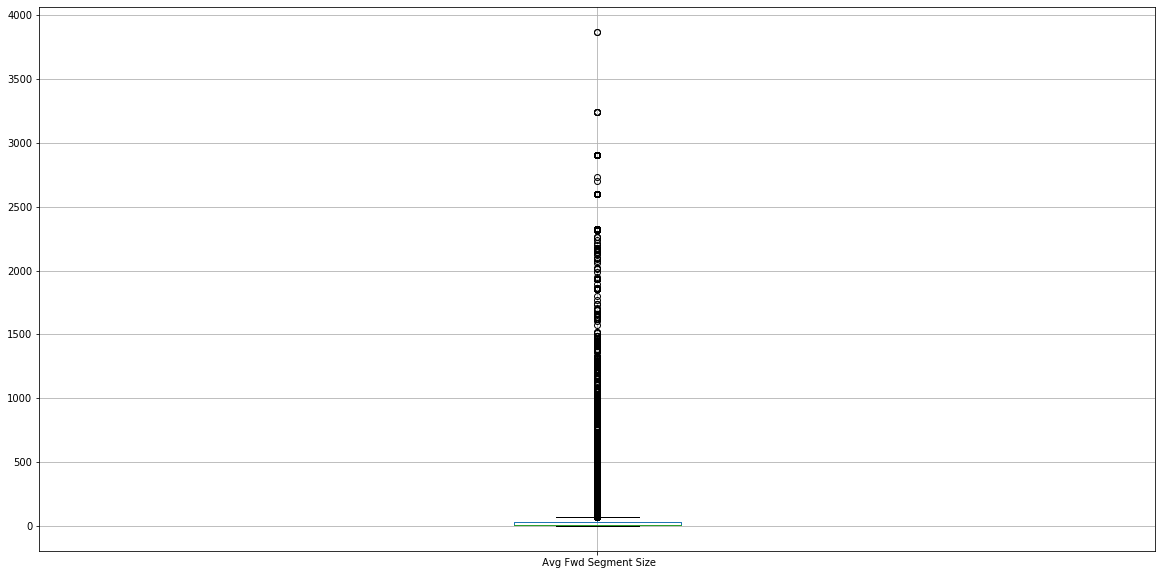

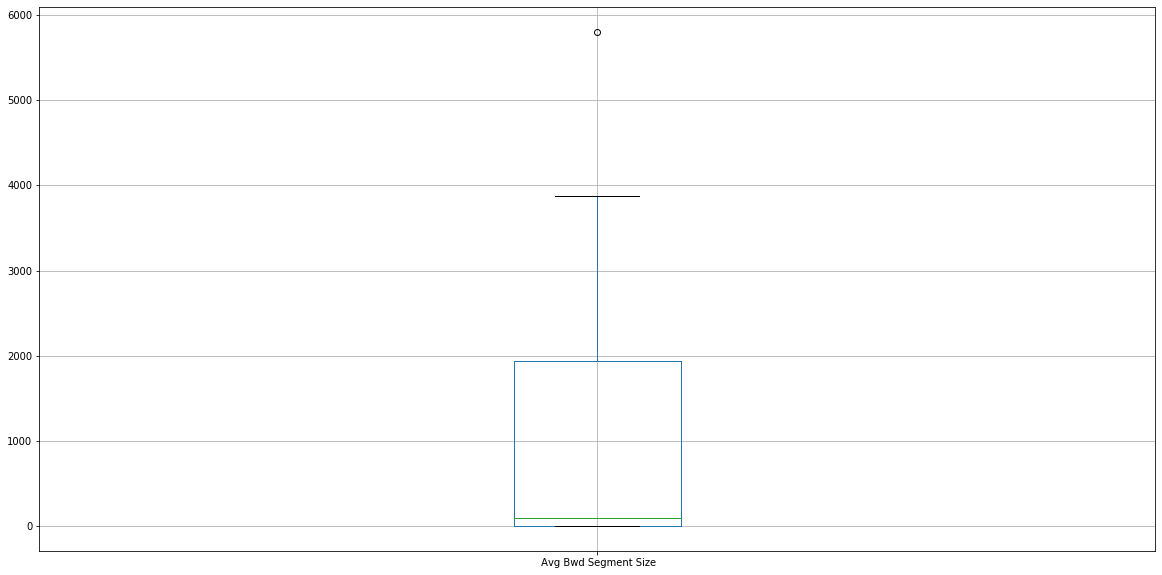

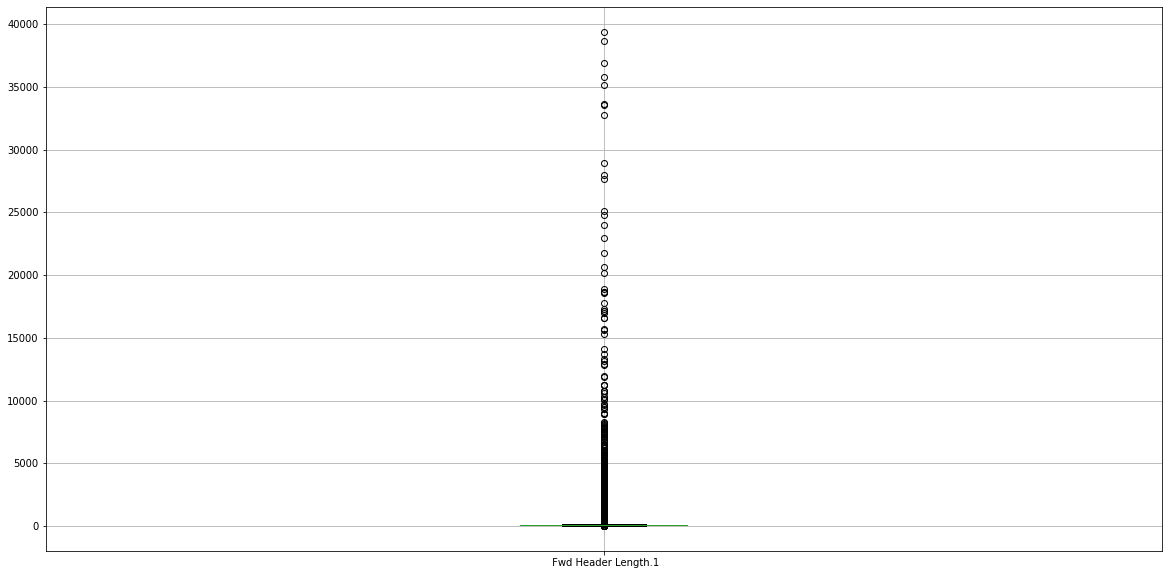

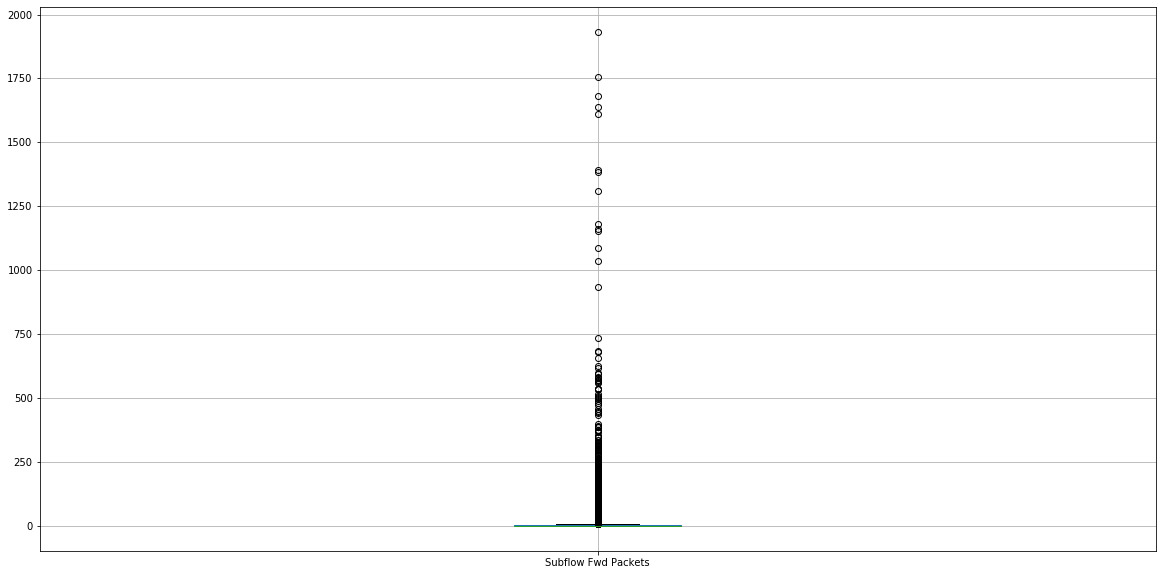

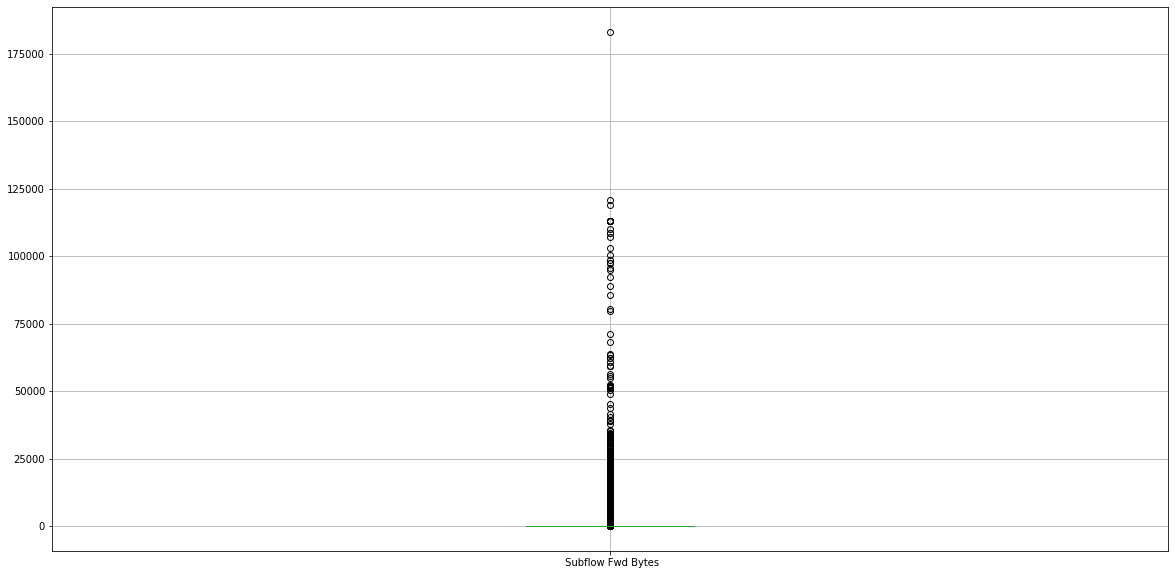

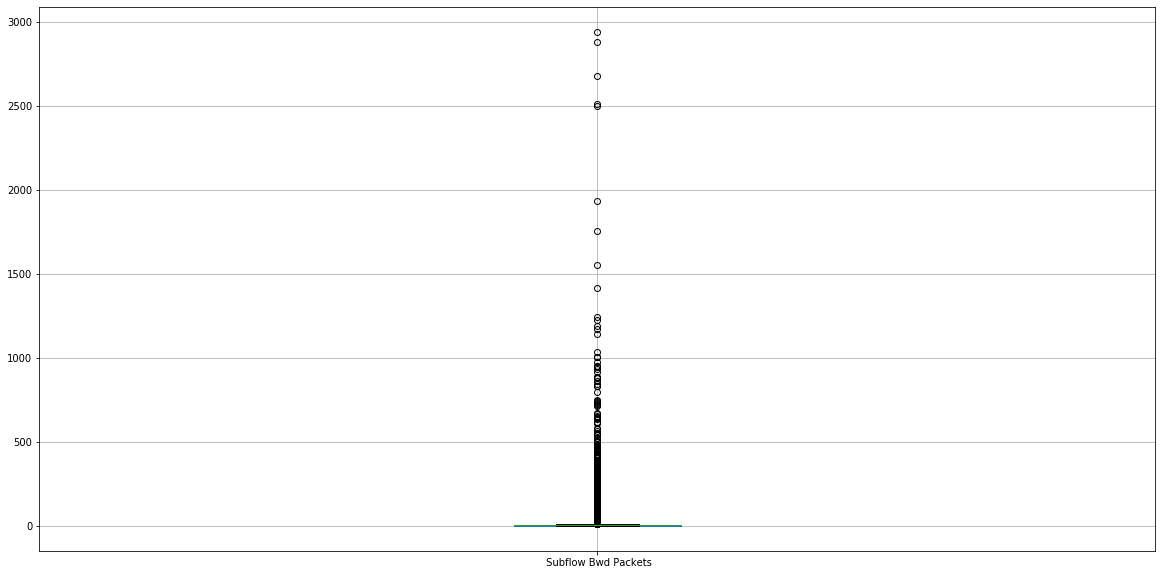

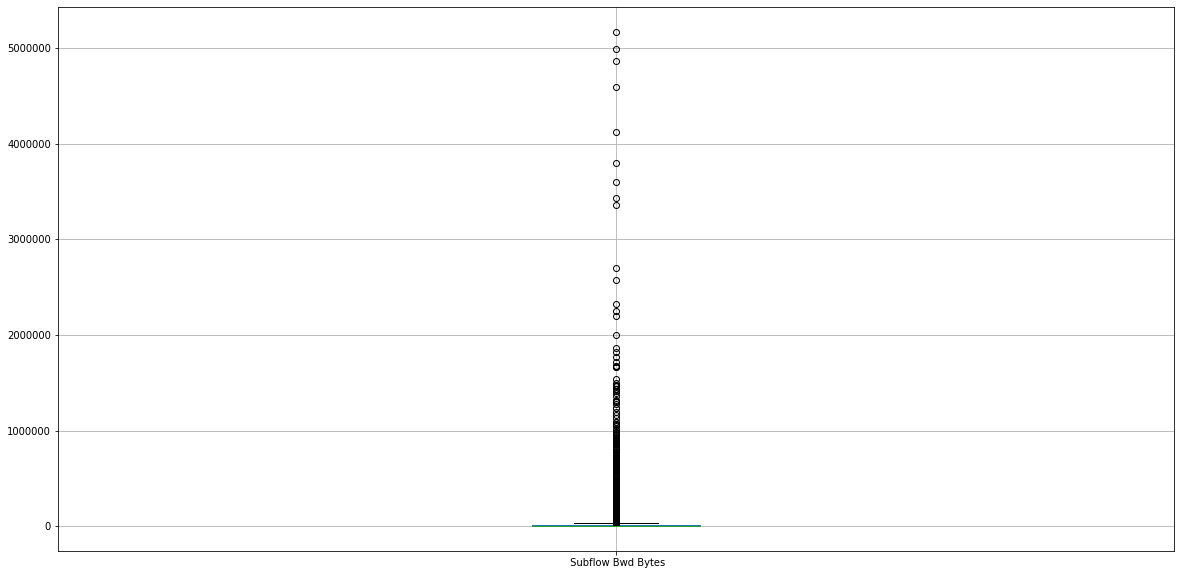

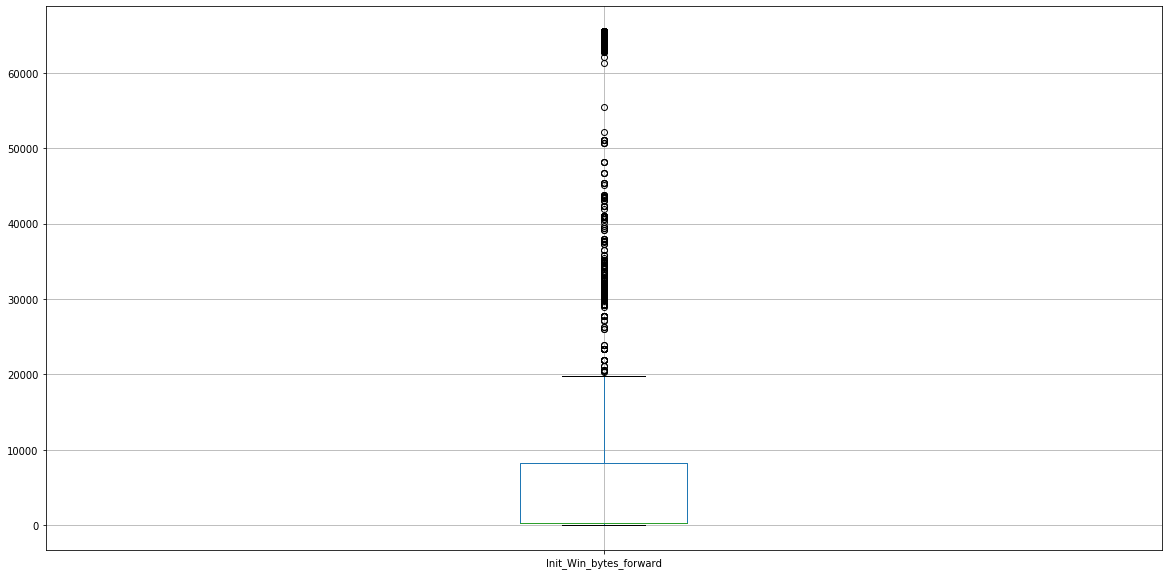

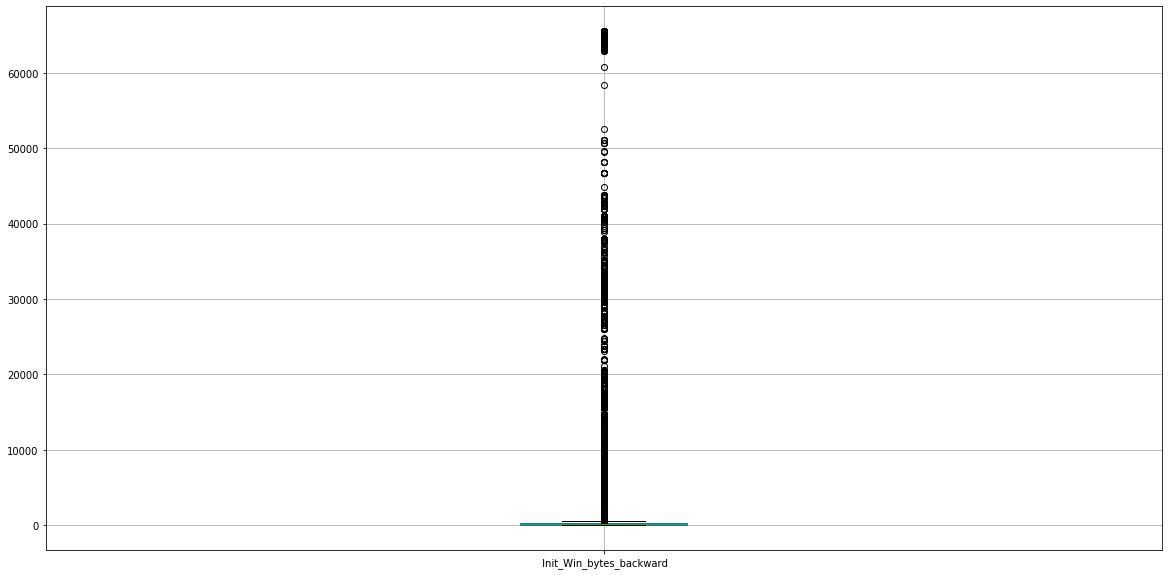

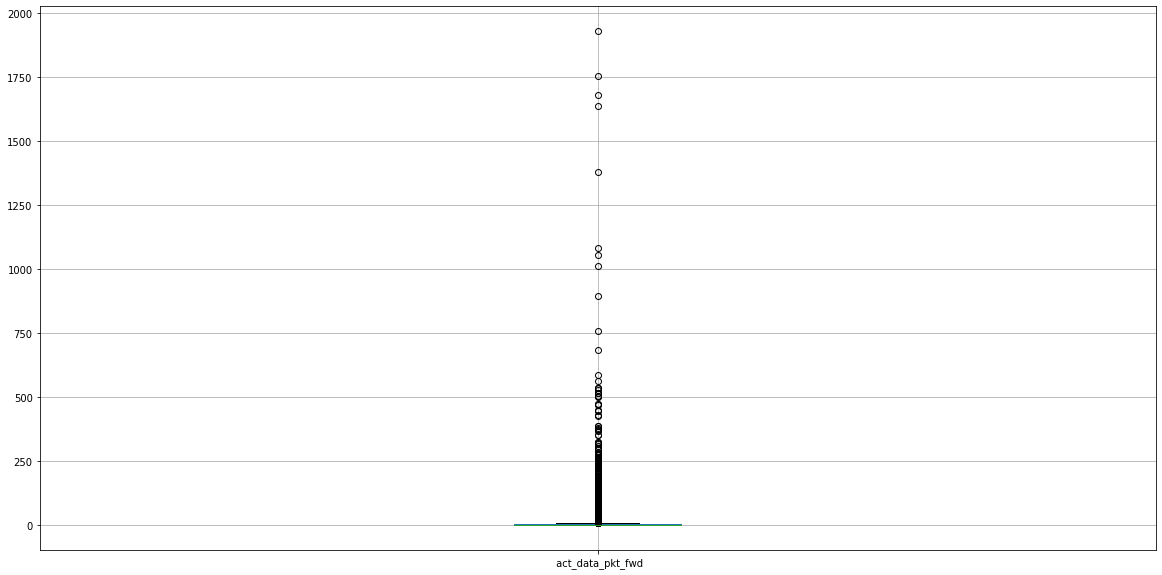

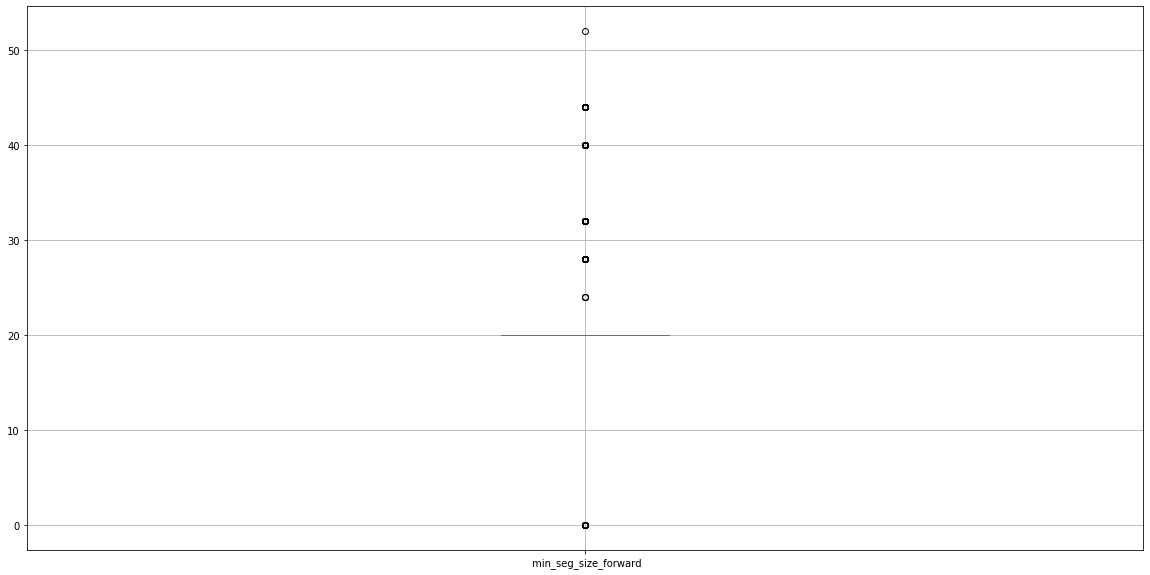

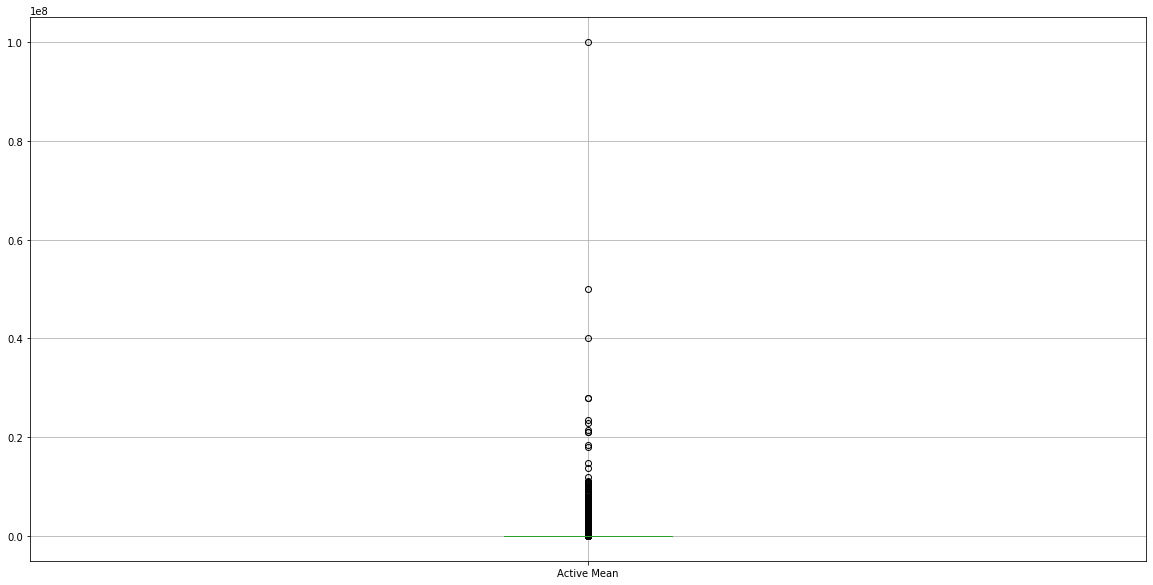

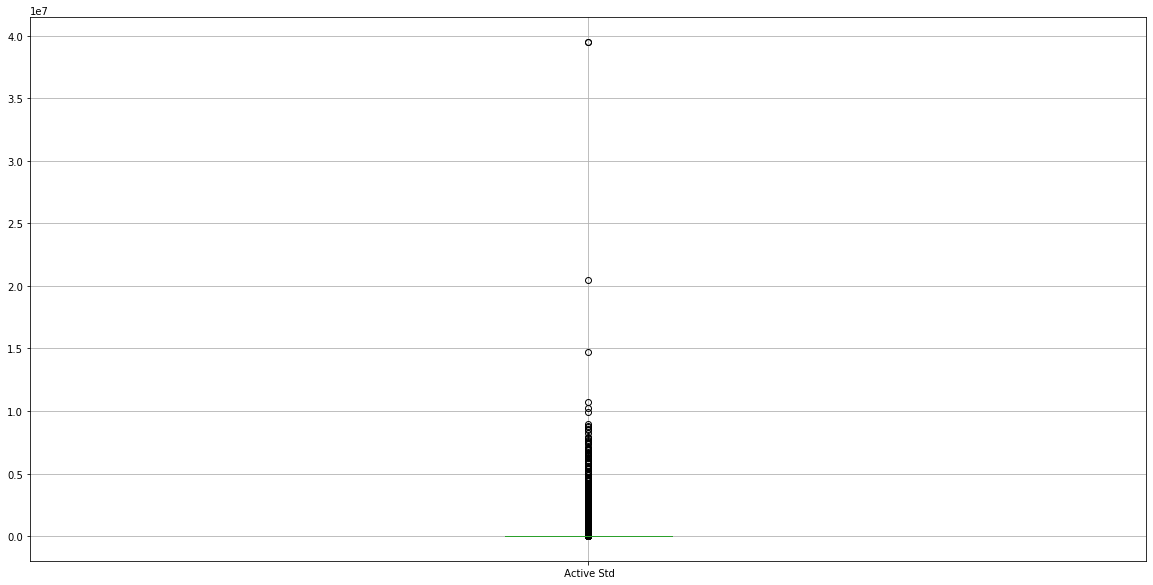

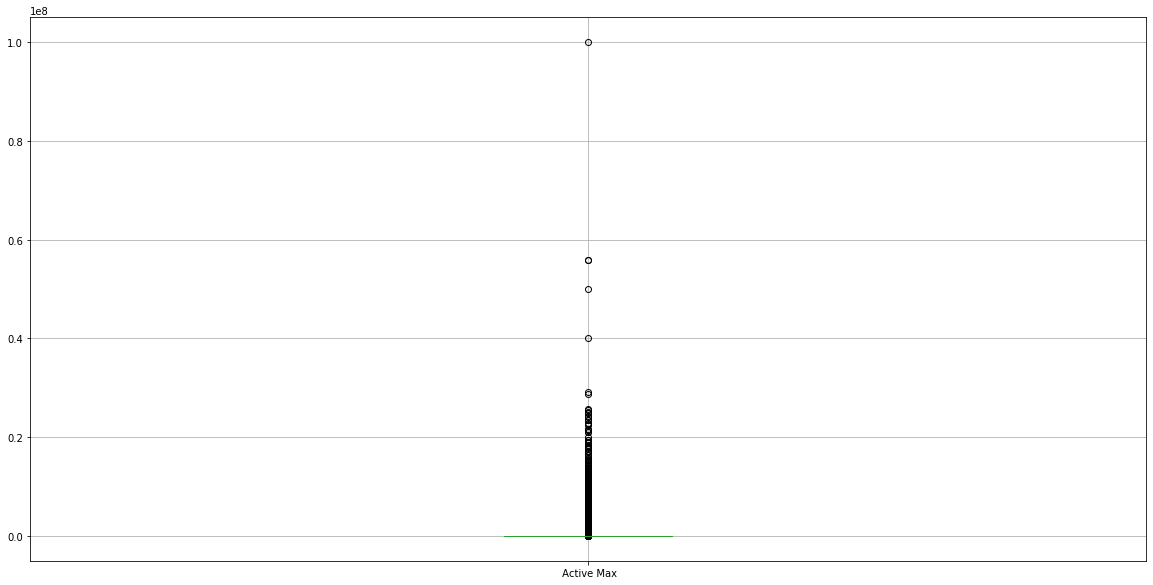

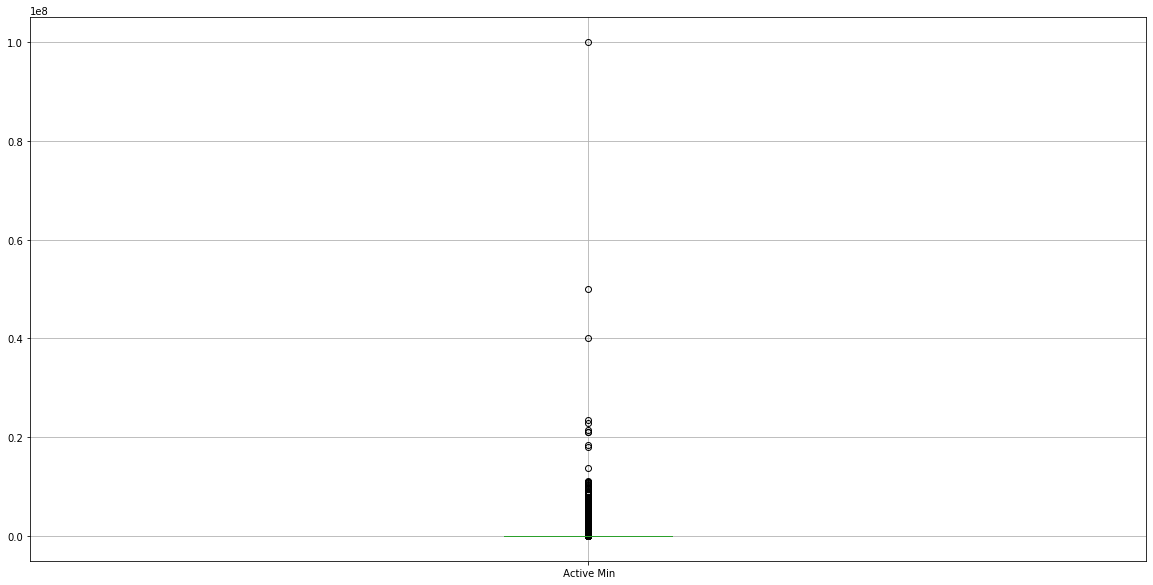

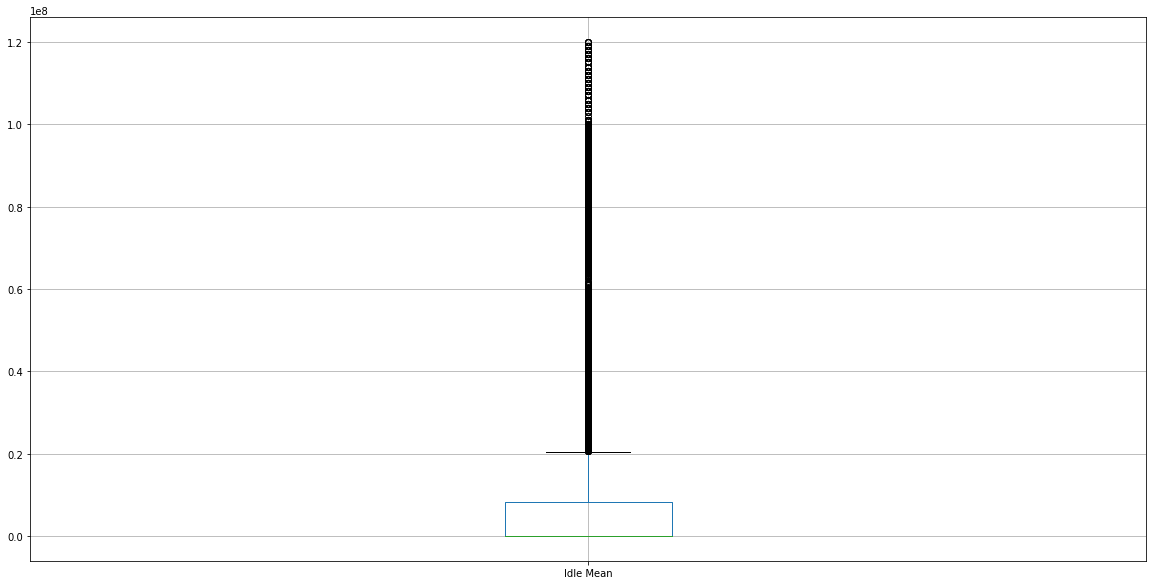

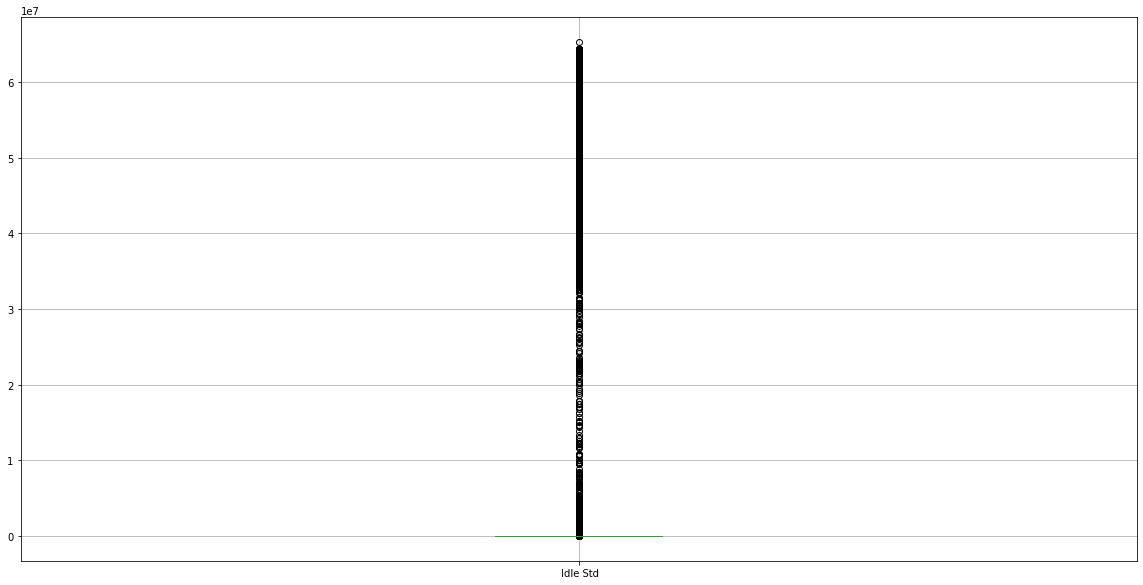

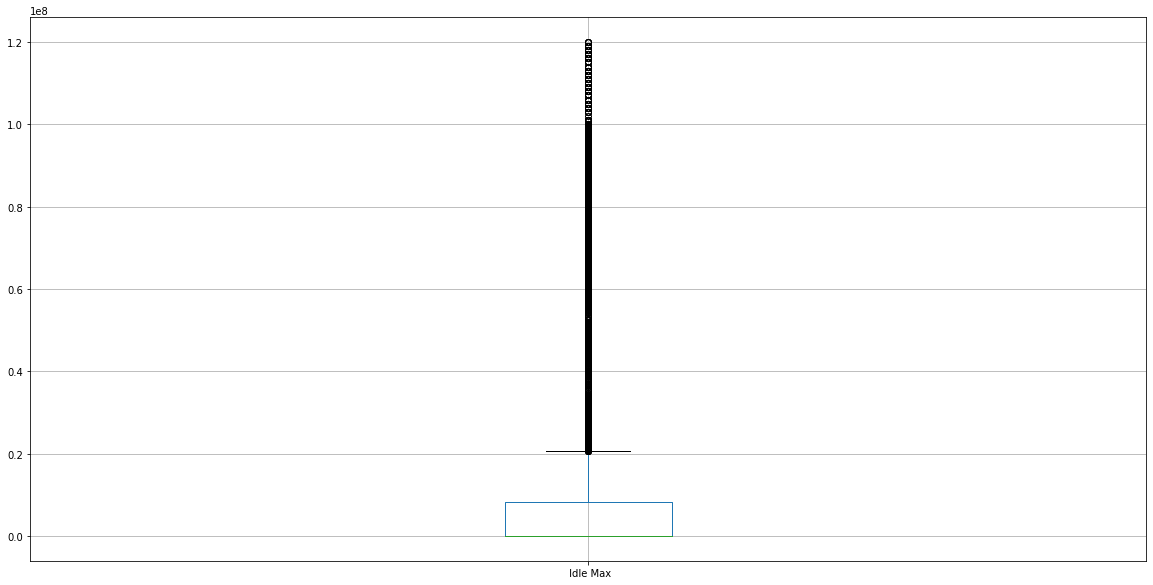

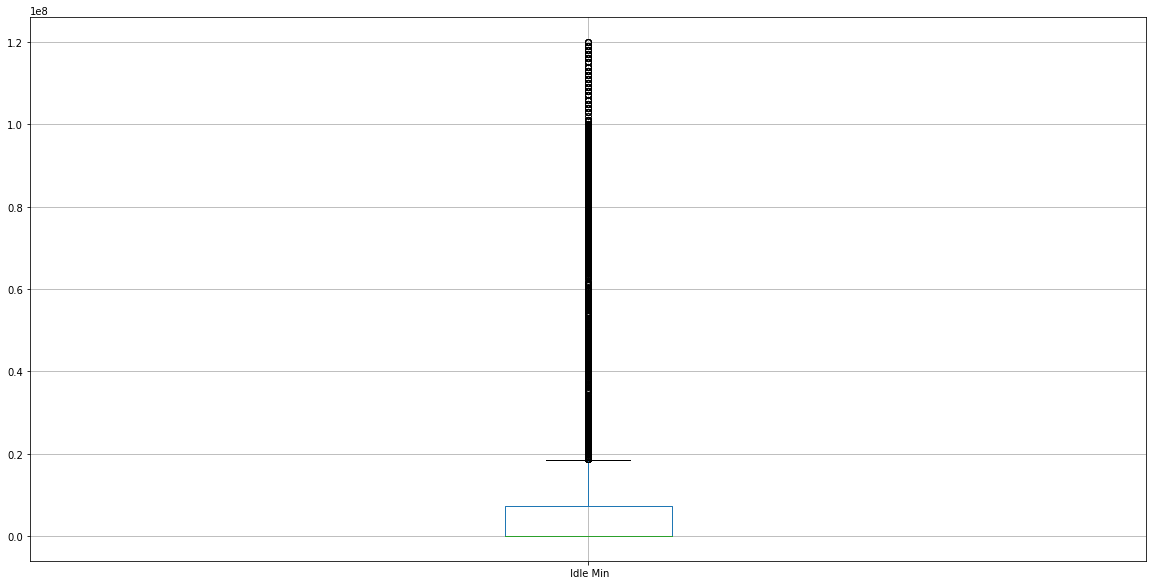

In [12]:
for i in data.columns:
    try:
        plt.figure(figsize=(20,10))
        data.boxplot(column=[i])
        plt.show()
    except:
        pass

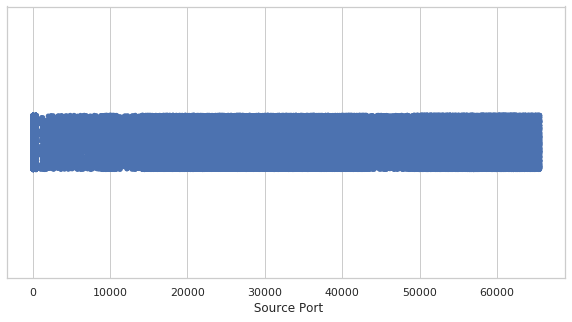

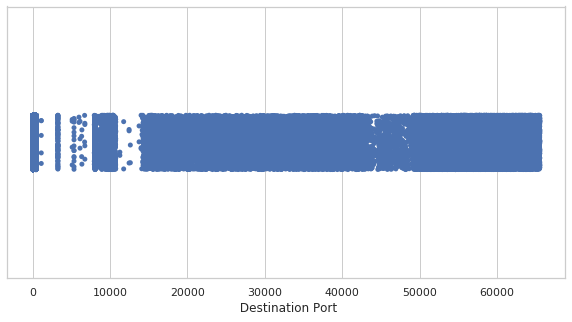

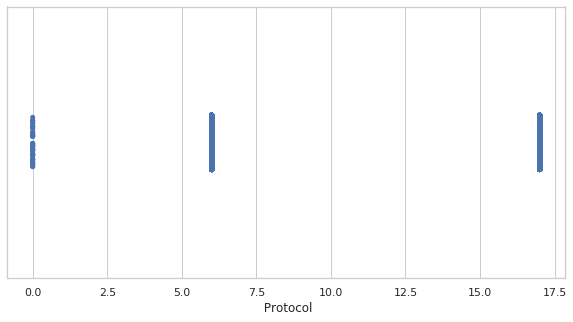

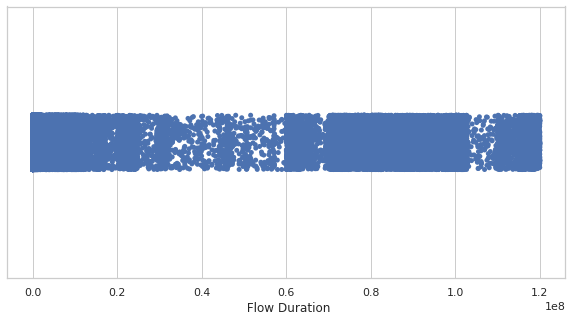

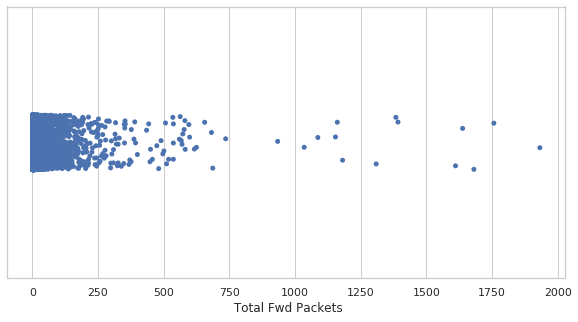

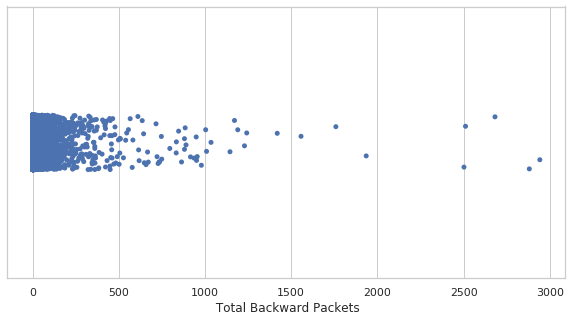

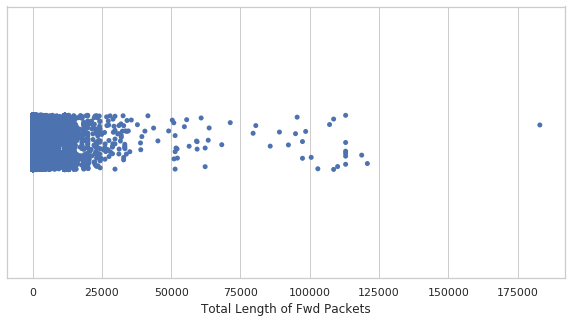

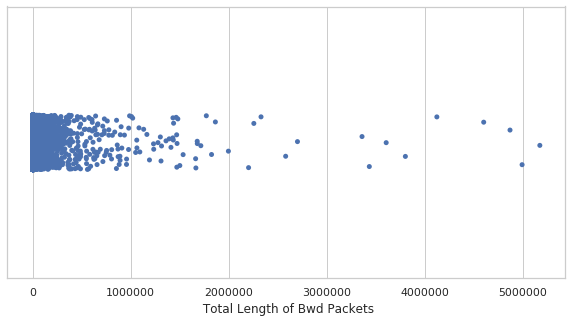

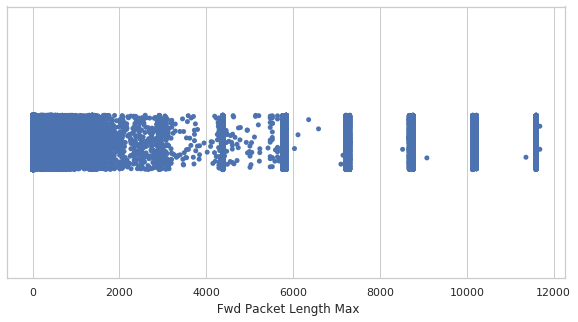

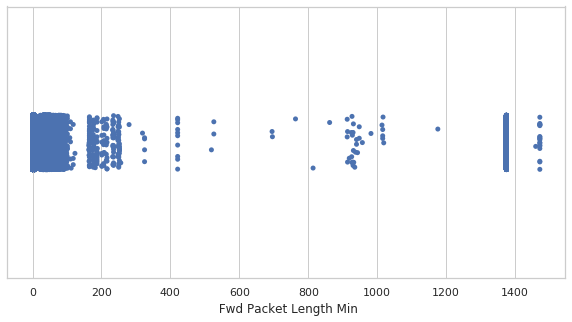

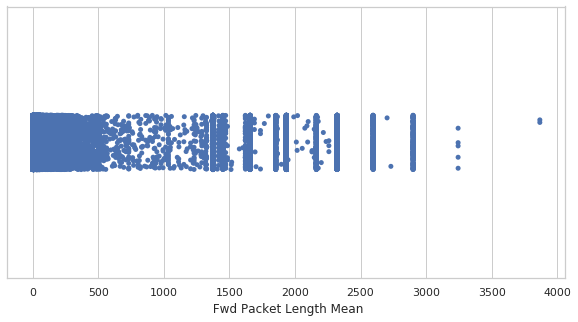

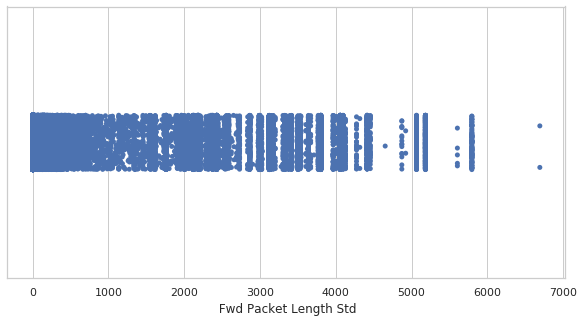

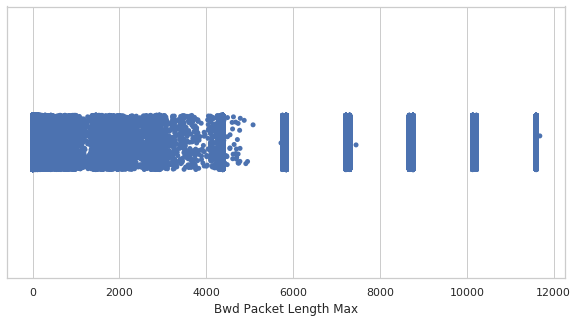

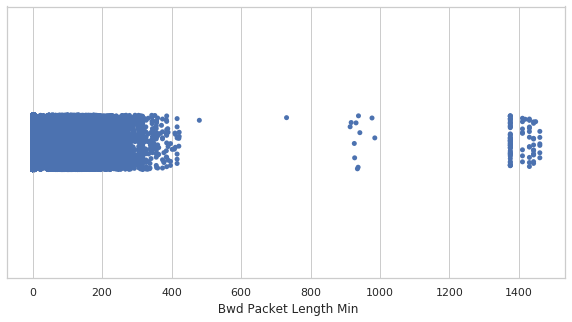

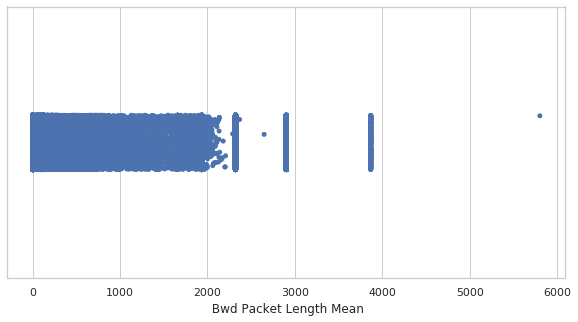

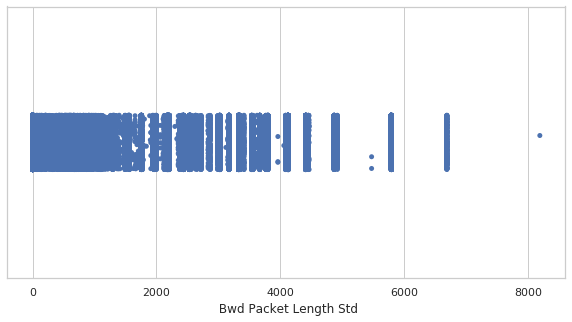

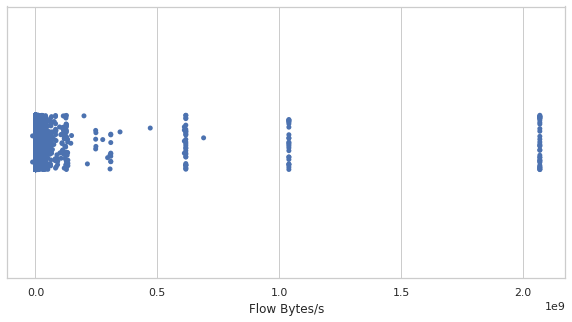

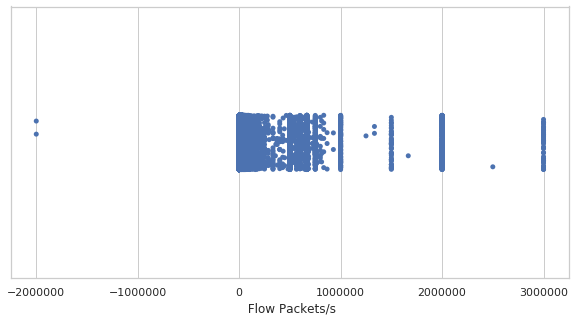

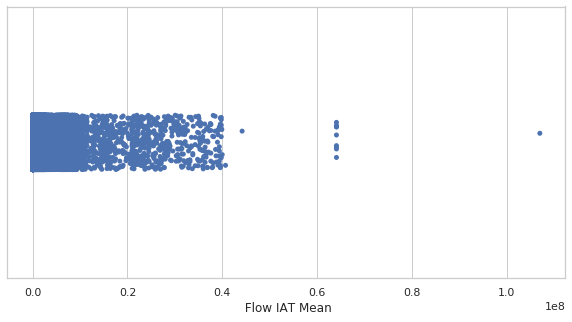

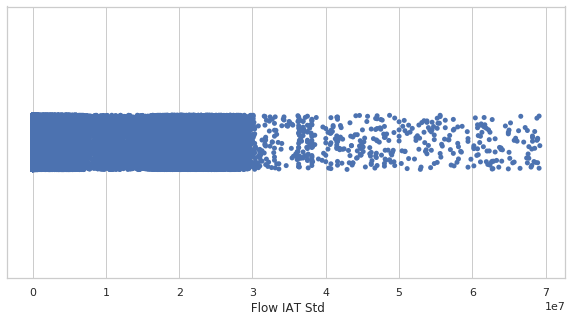

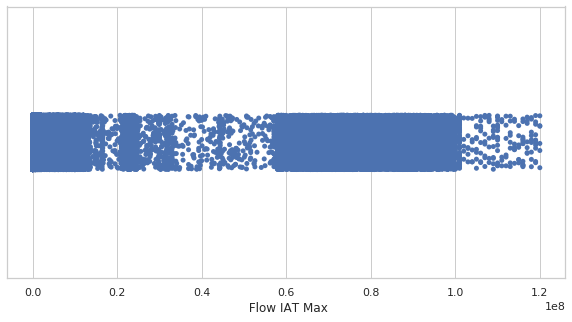

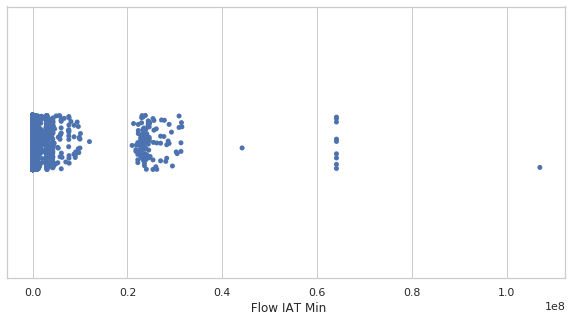

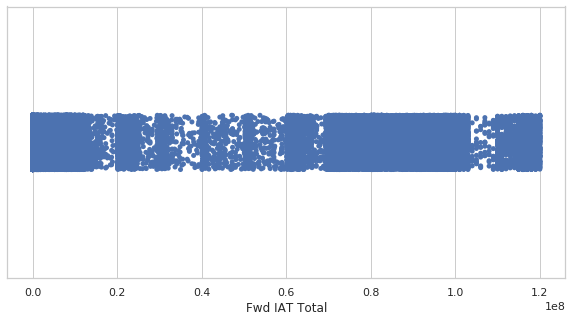

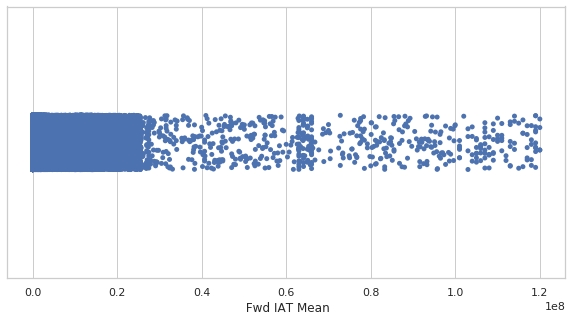

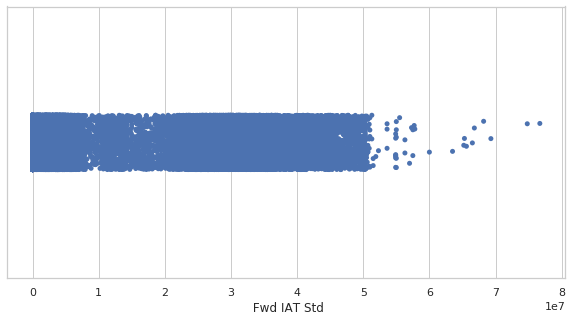

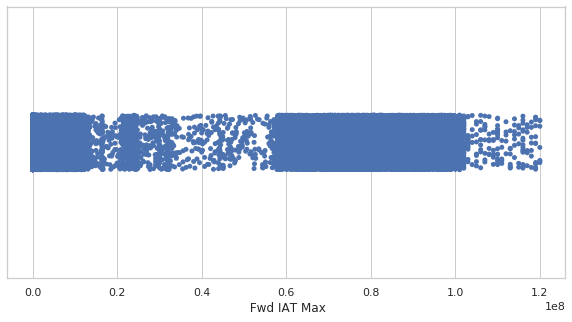

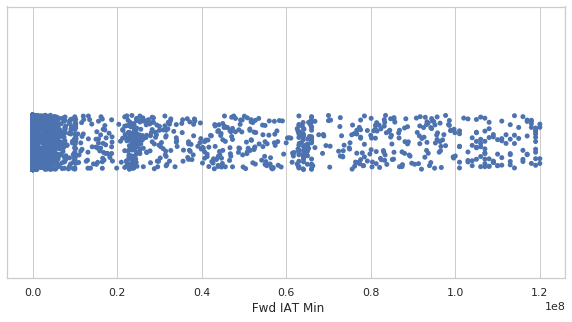

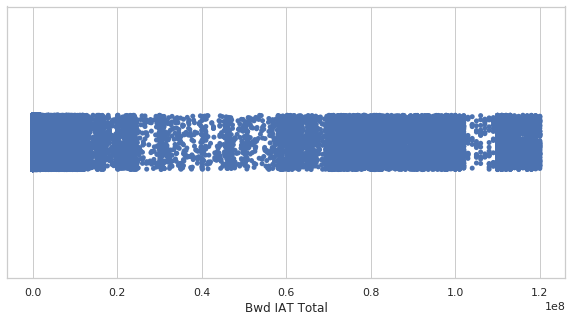

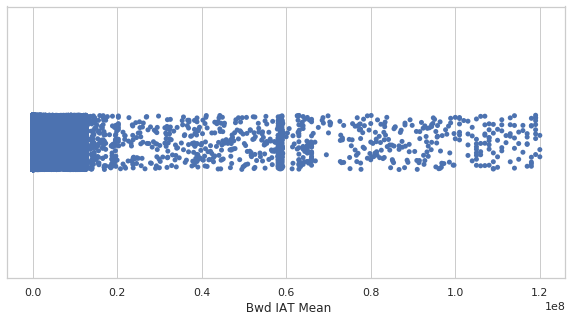

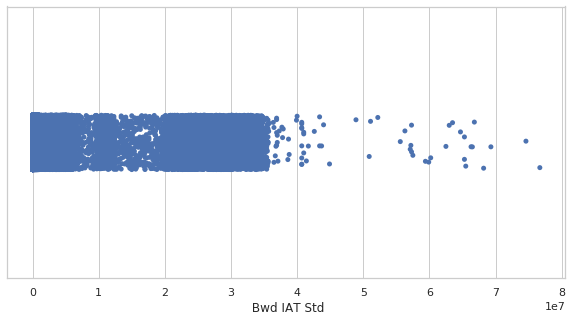

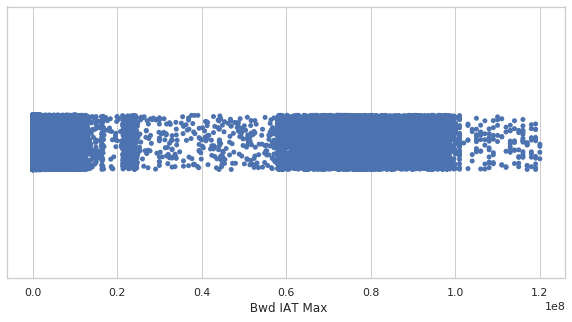

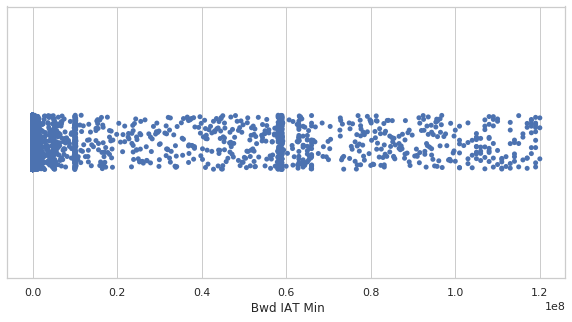

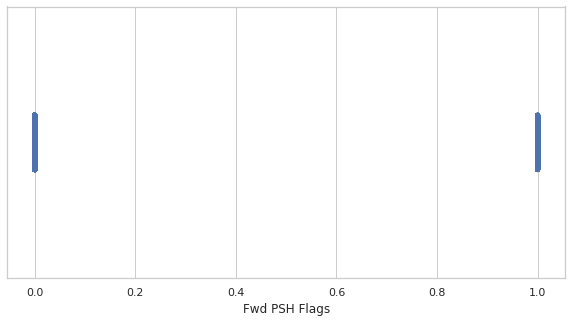

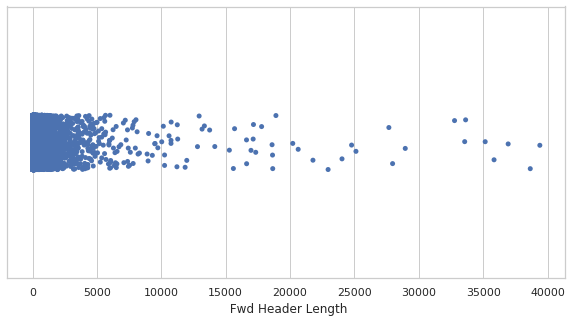

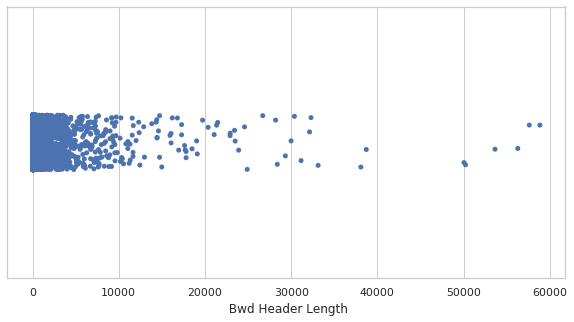

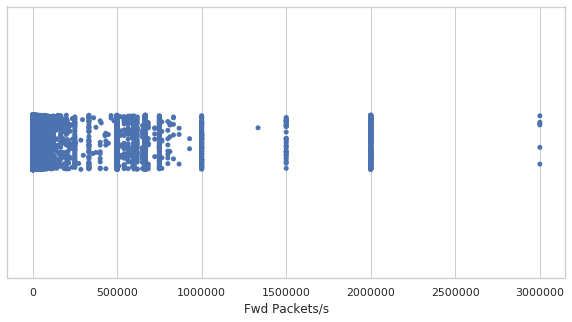

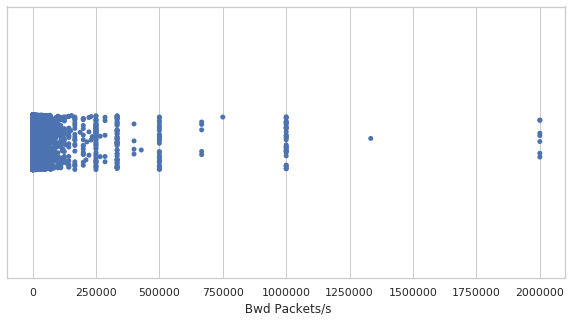

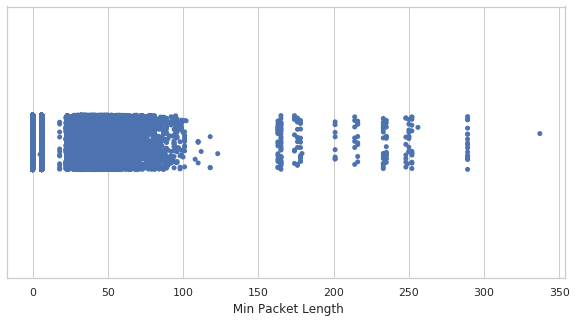

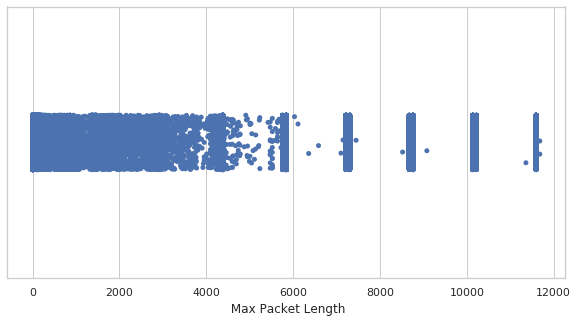

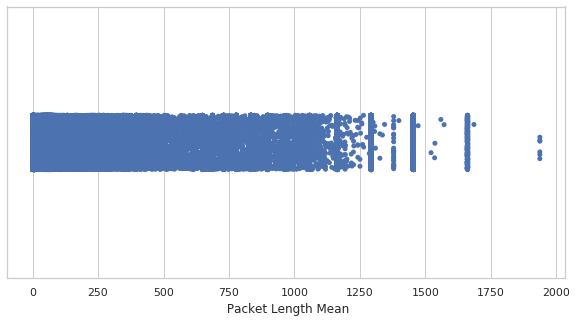

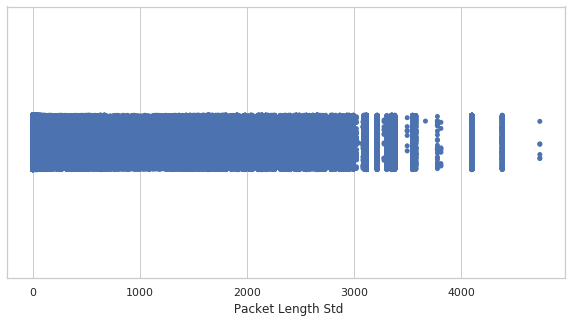

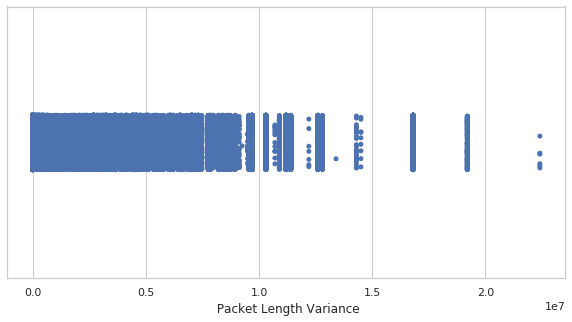

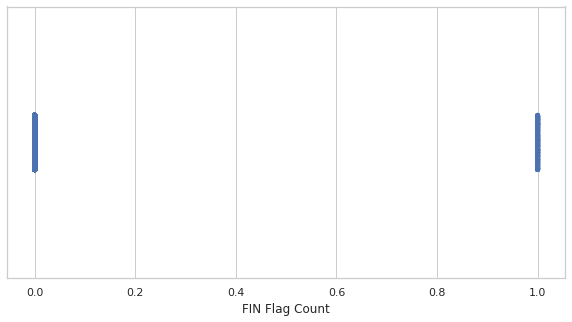

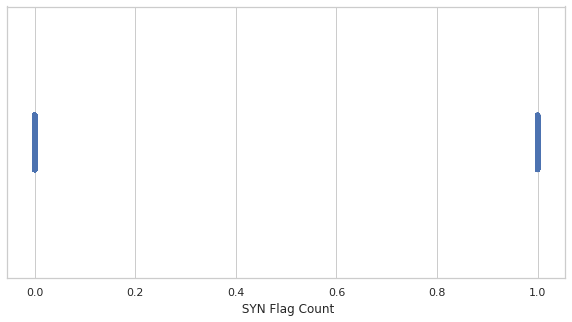

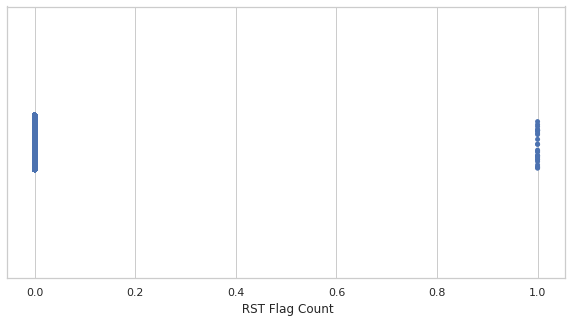

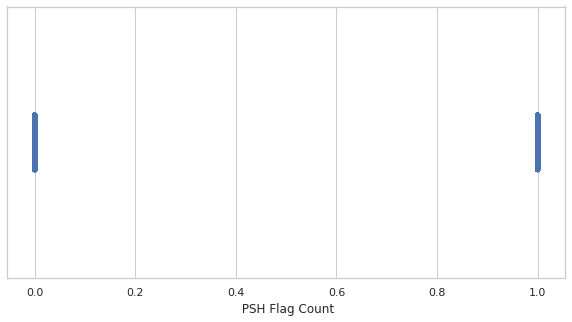

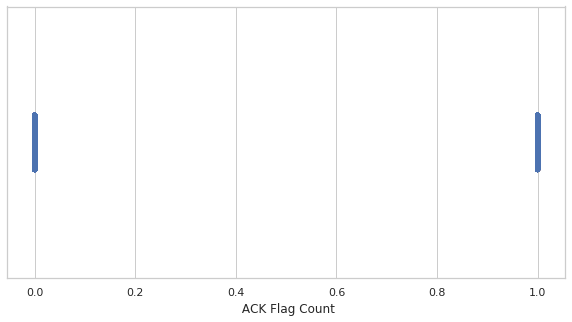

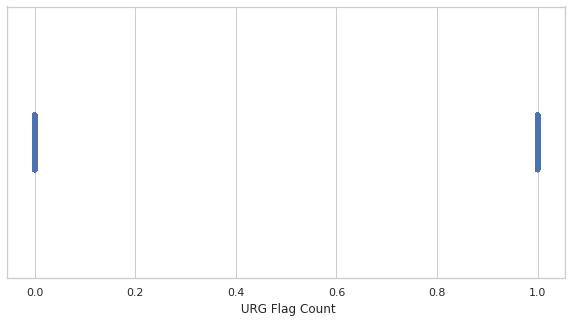

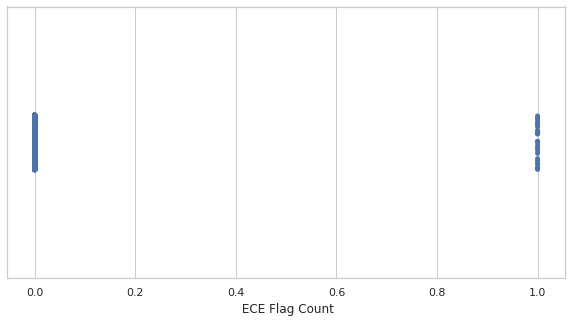

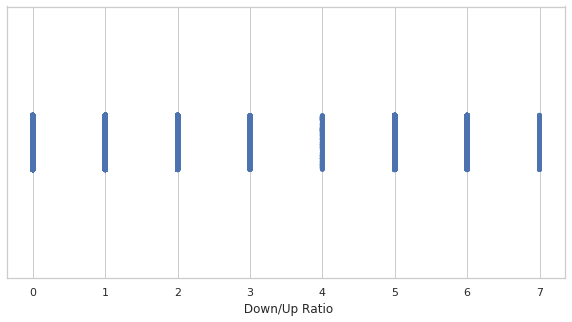

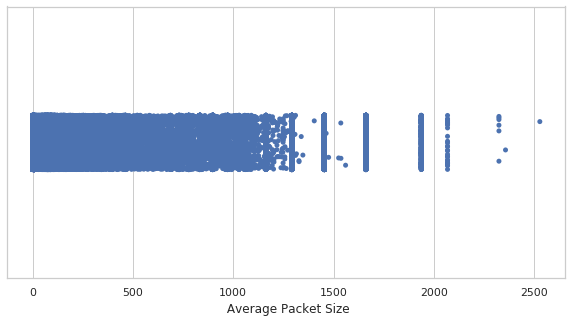

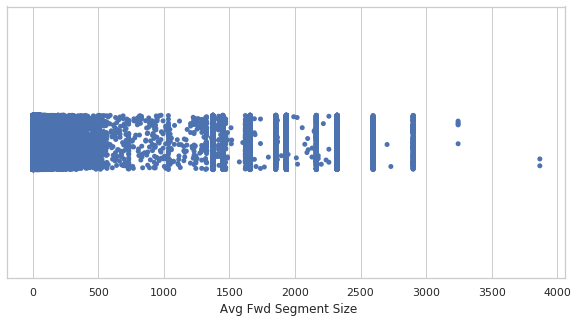

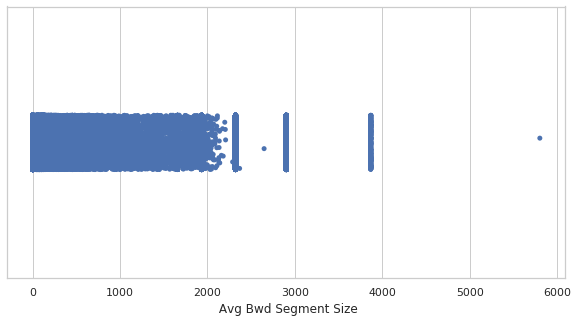

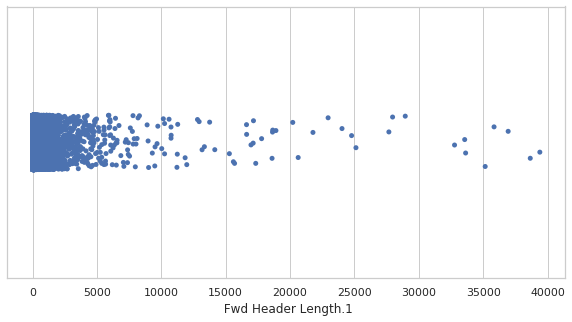

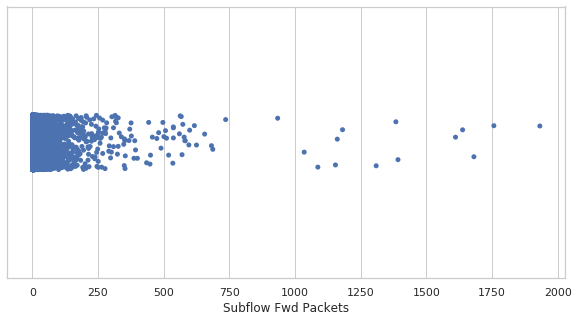

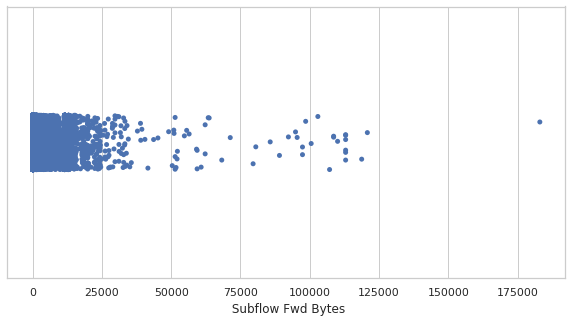

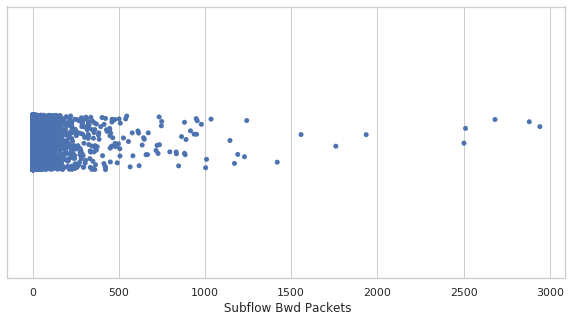

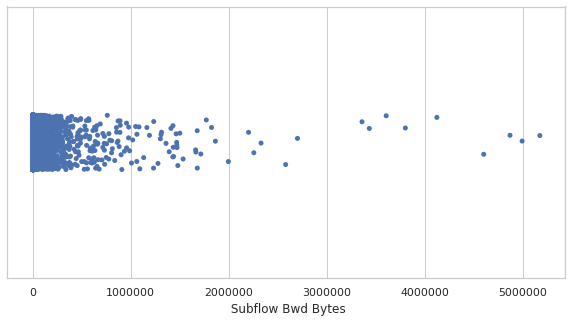

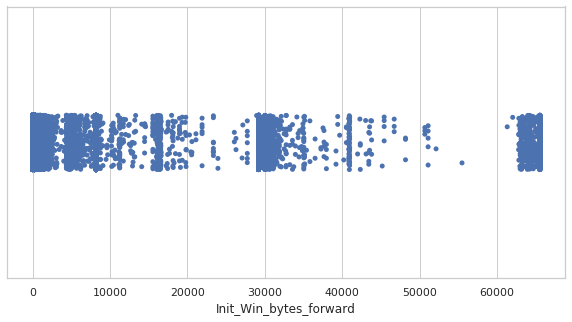

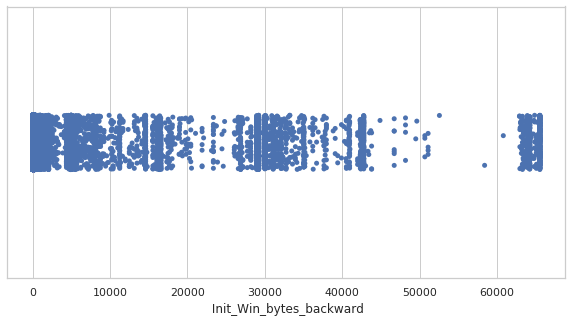

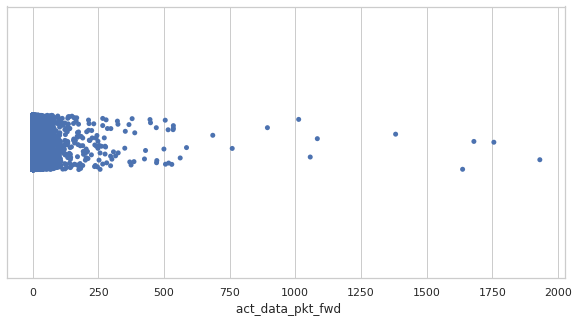

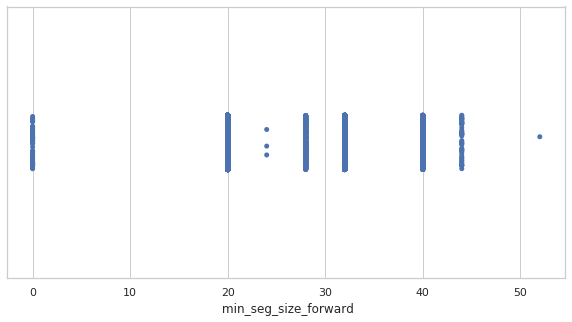

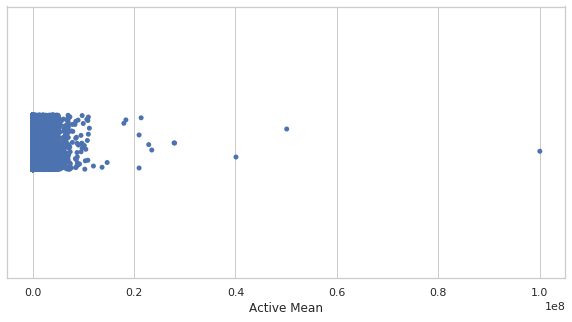

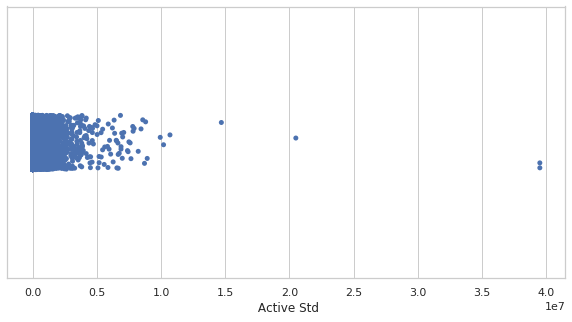

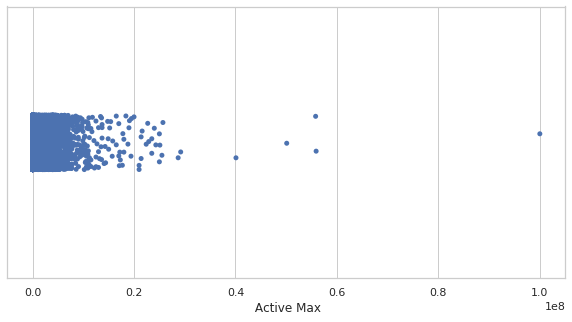

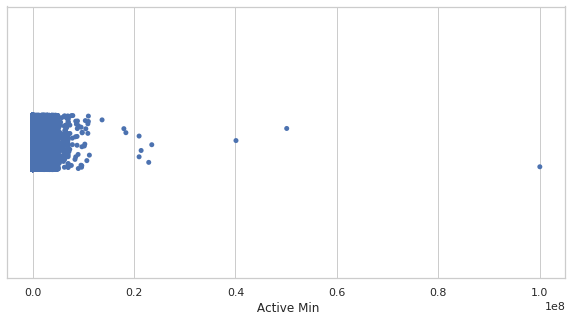

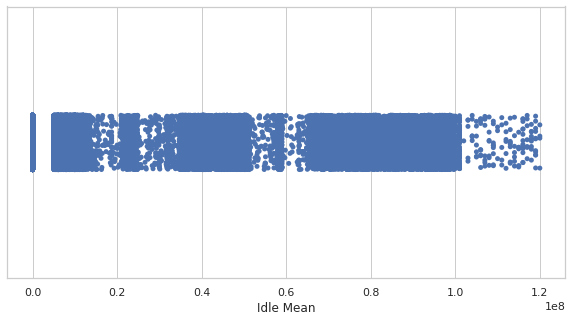

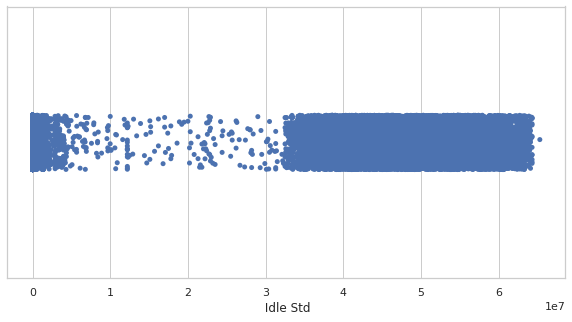

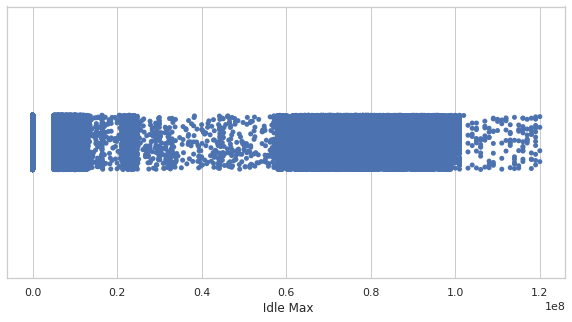

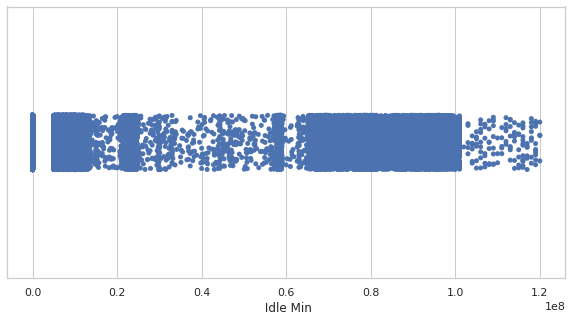

In [13]:
sns.set(style="whitegrid")
for i in features:
    try:
        plt.figure(figsize=(10,5))
        sns.stripplot(x=data[i])
        plt.show()
    except:
        pass

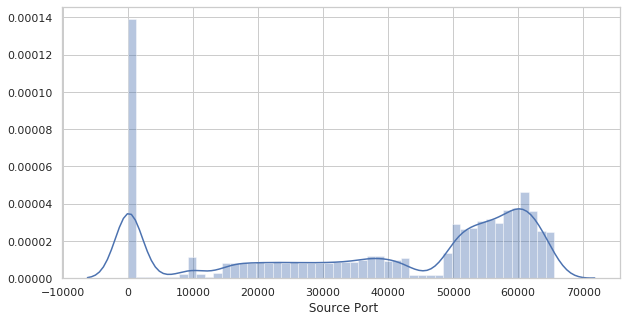

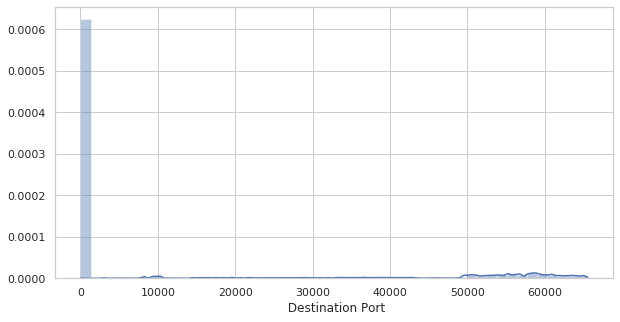

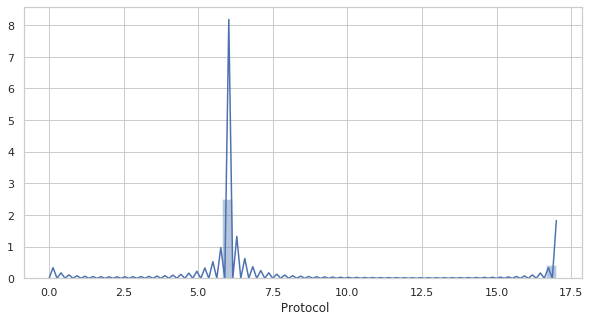

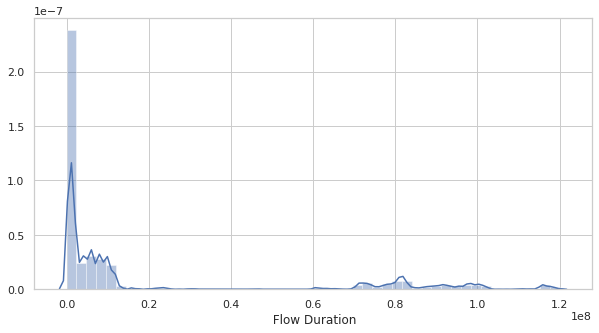

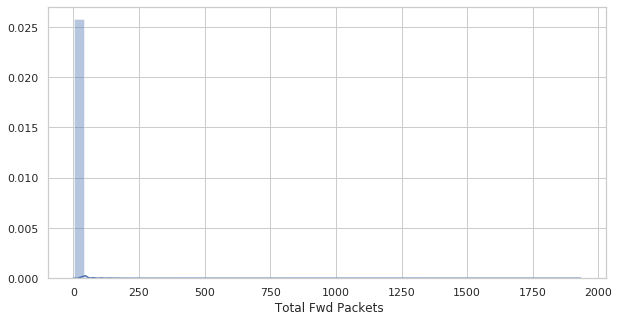

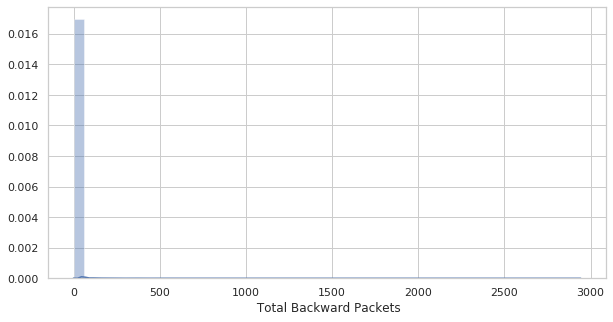

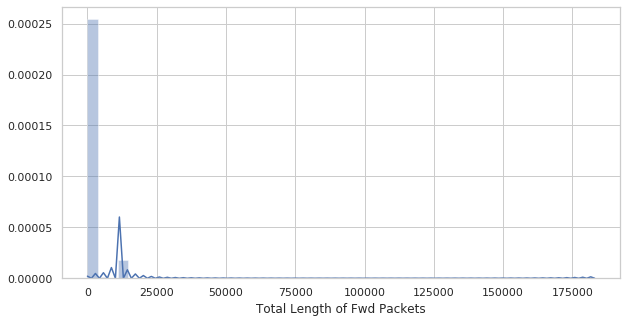

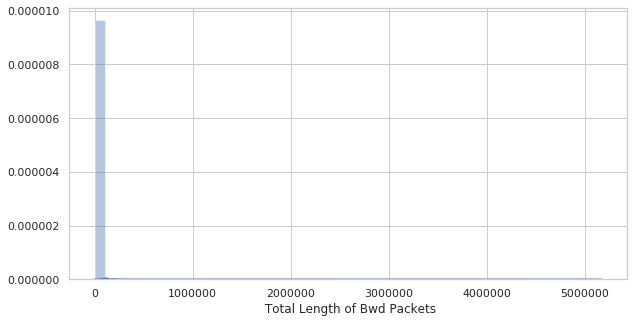

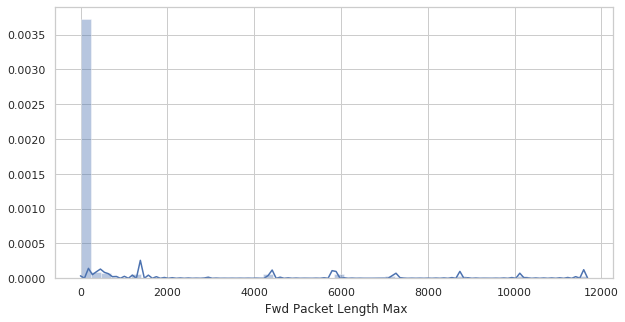

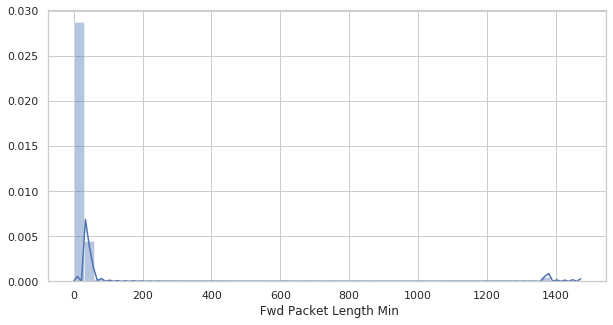

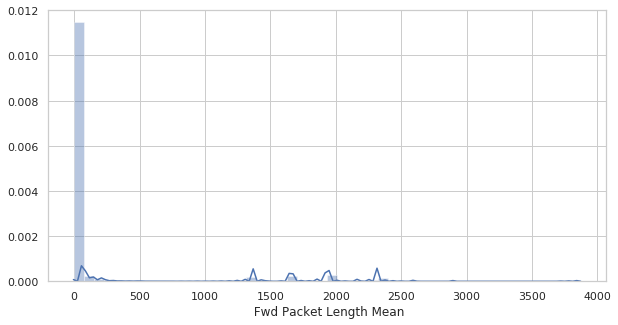

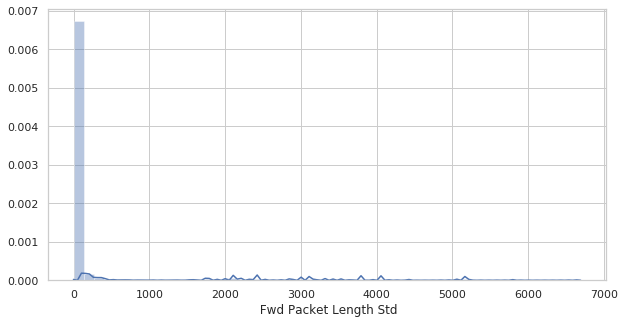

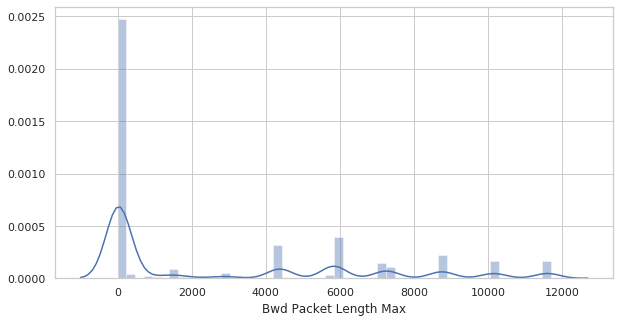

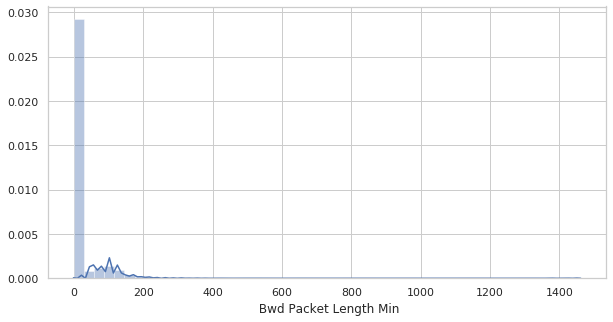

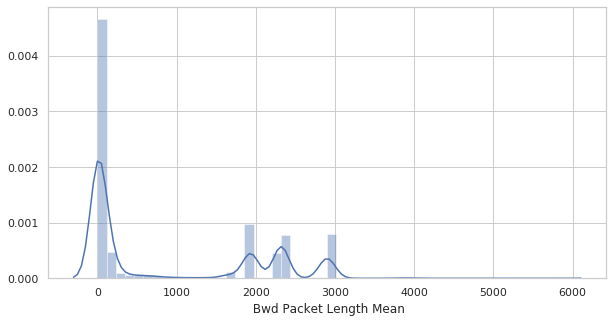

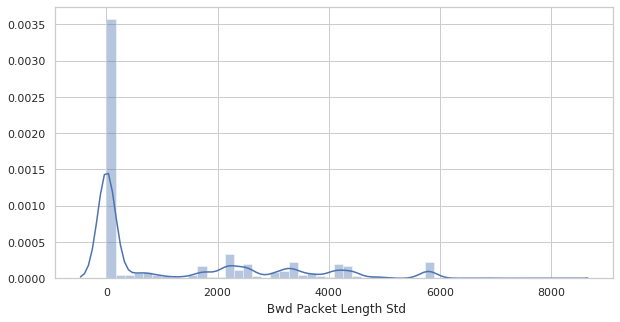

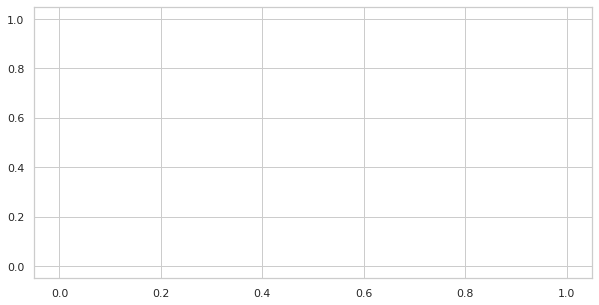

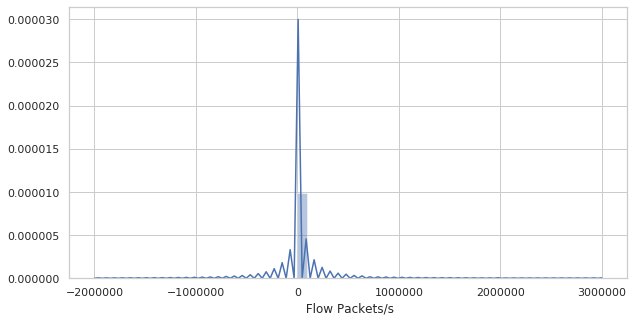

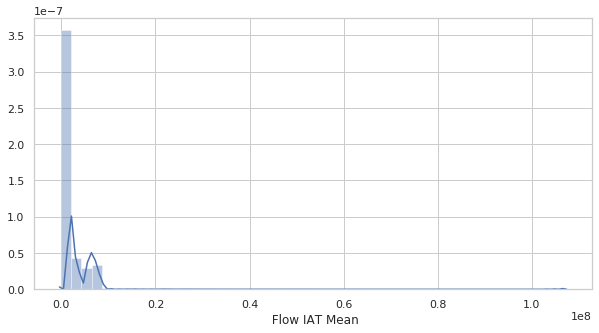

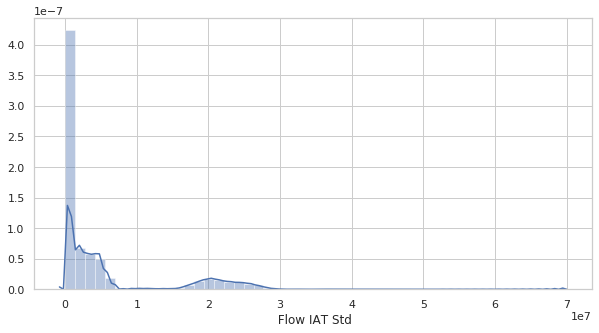

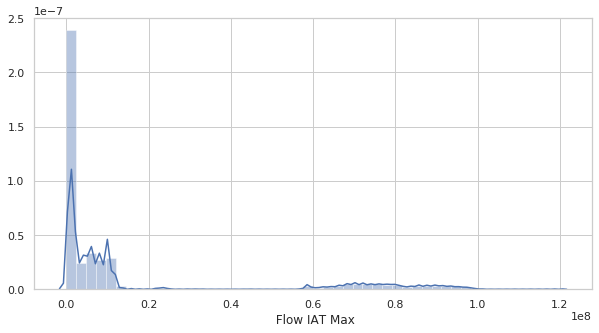

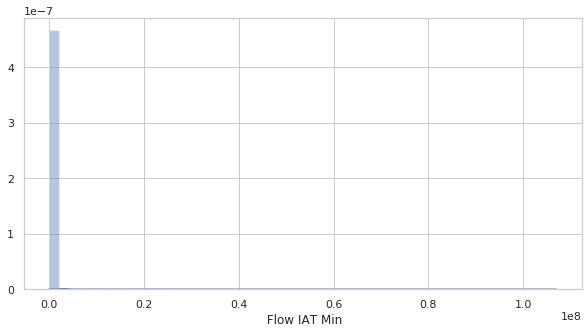

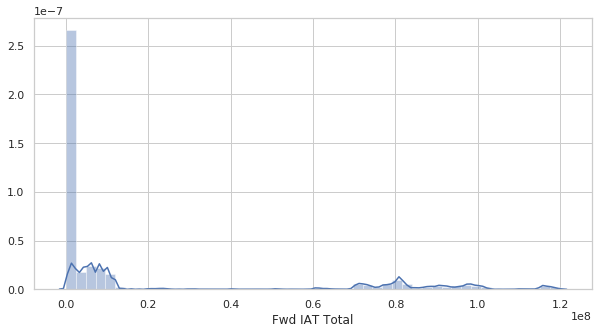

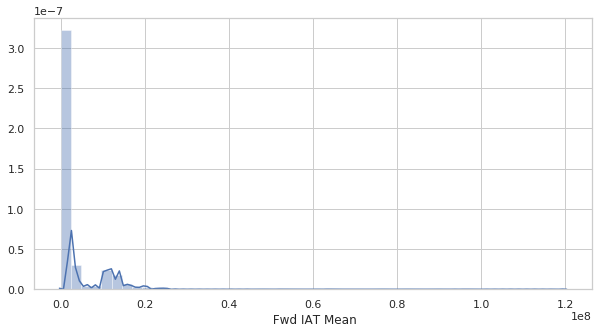

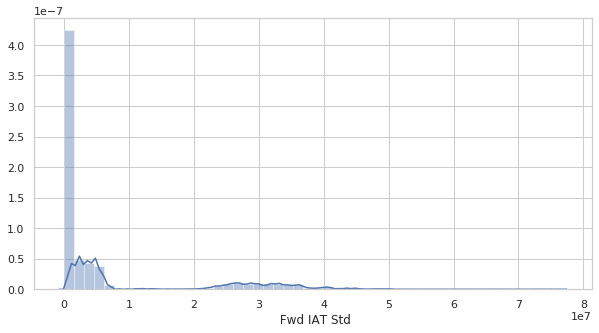

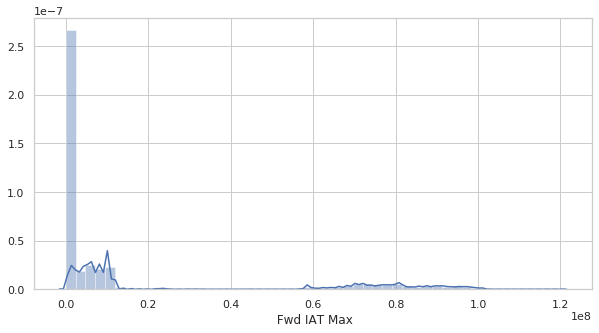

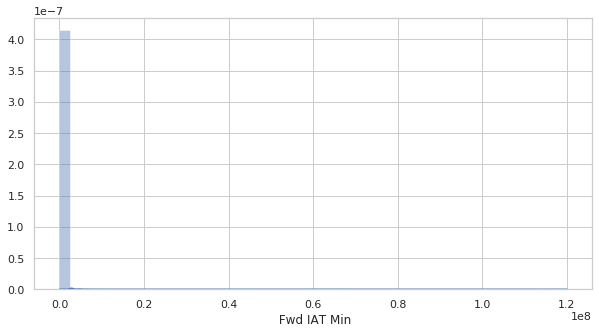

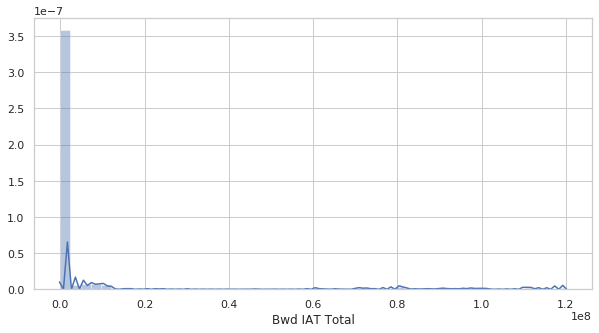

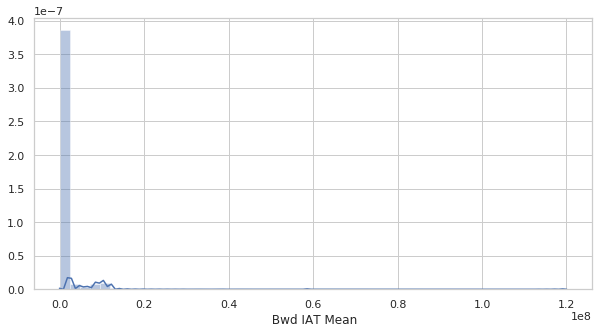

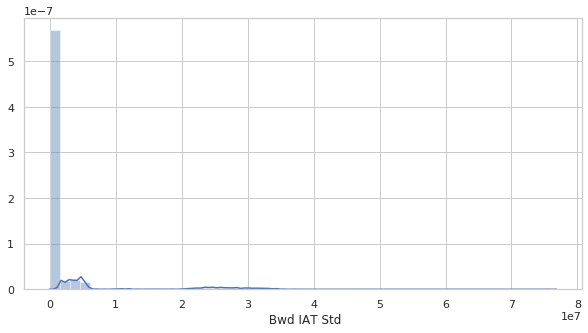

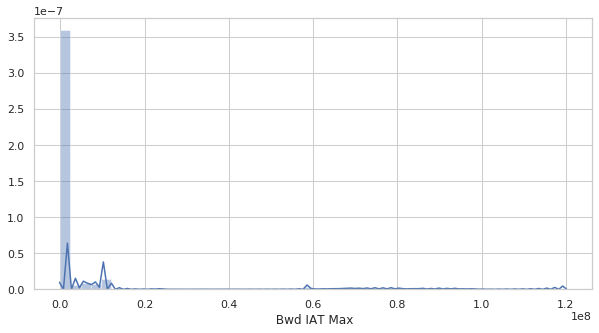

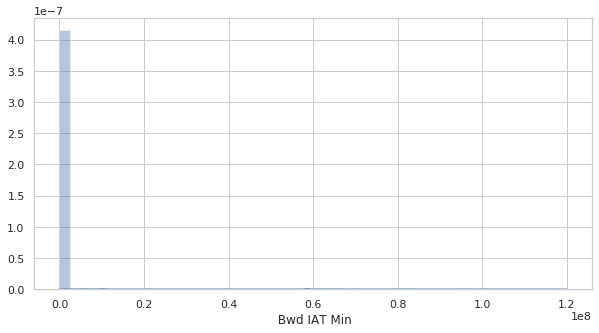

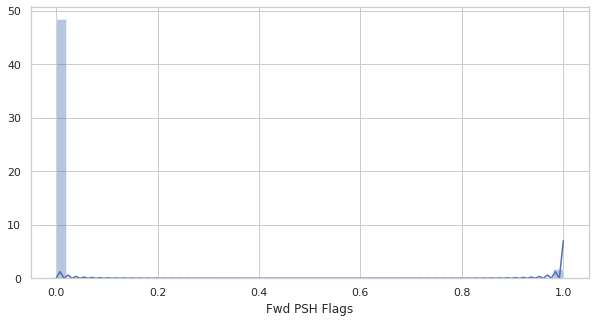

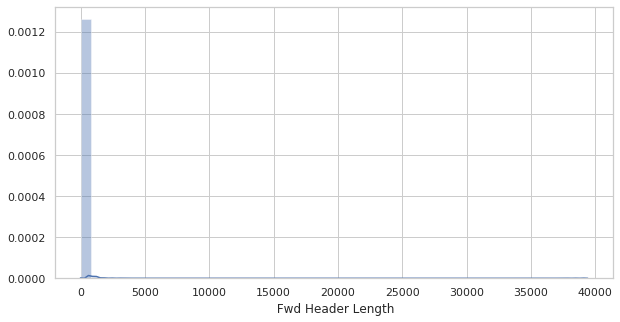

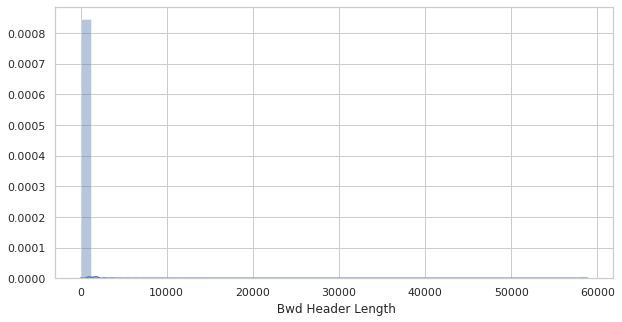

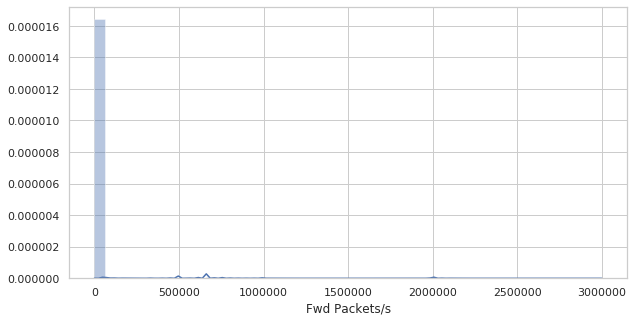

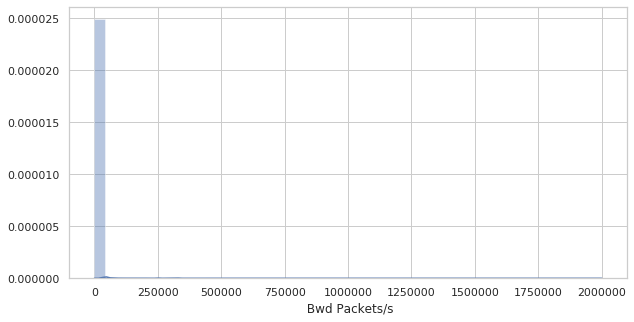

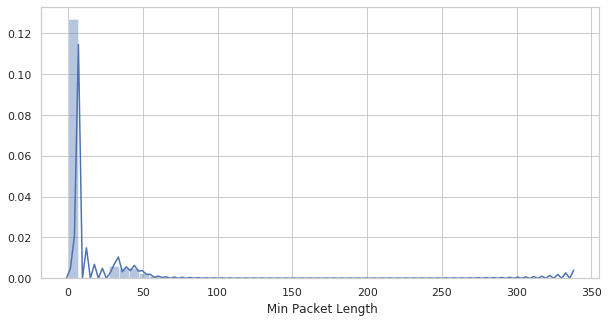

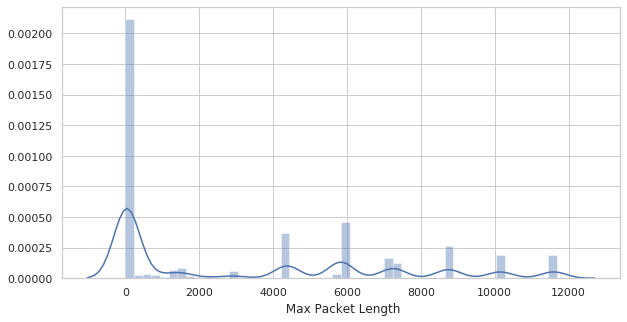

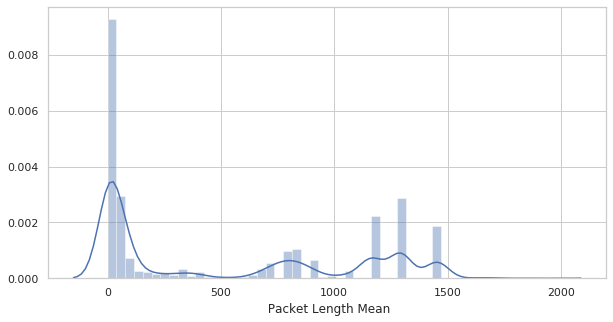

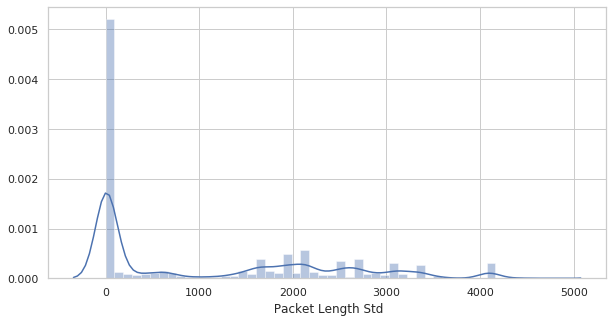

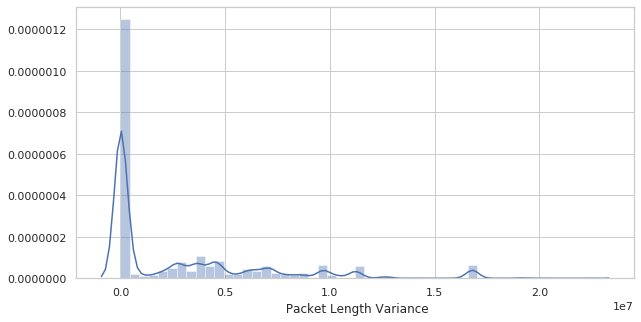

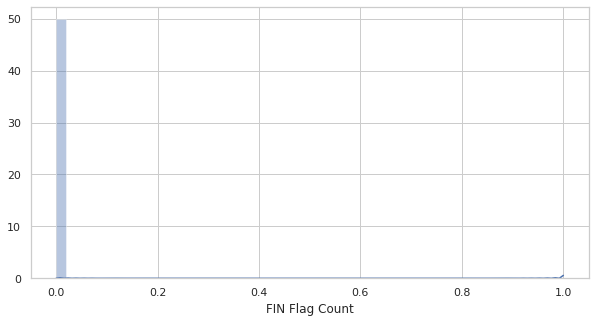

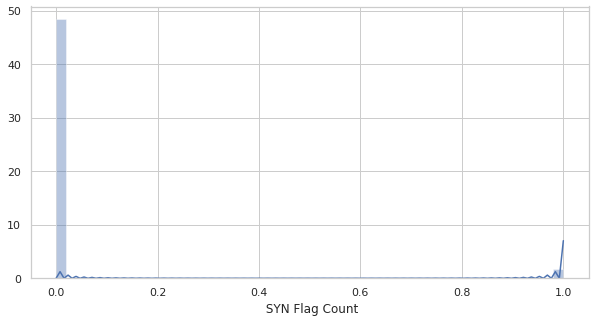

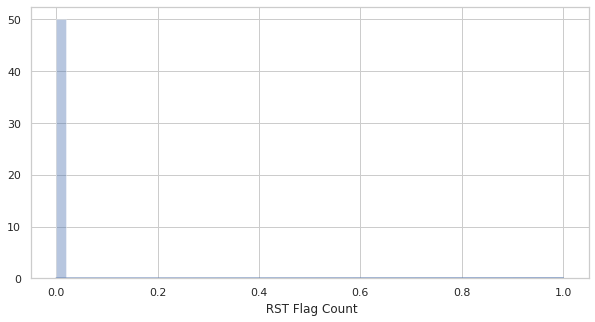

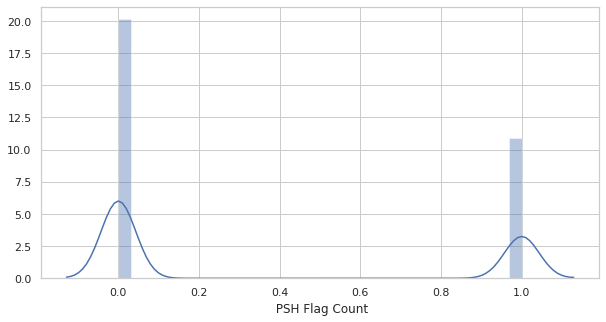

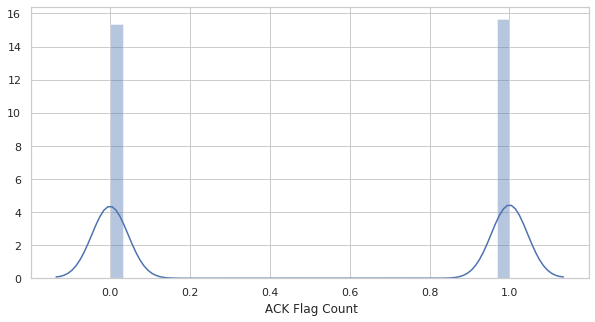

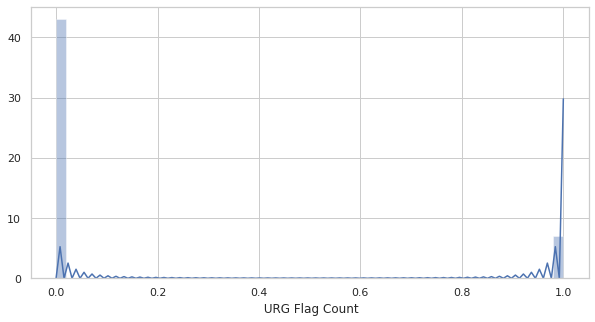

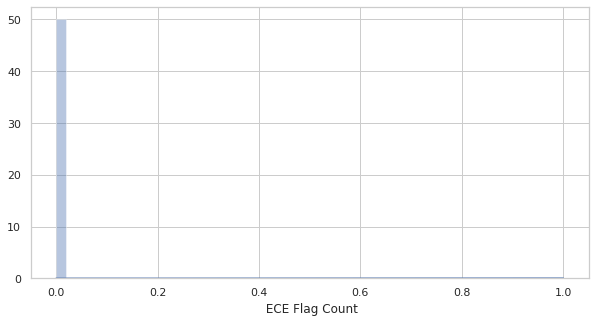

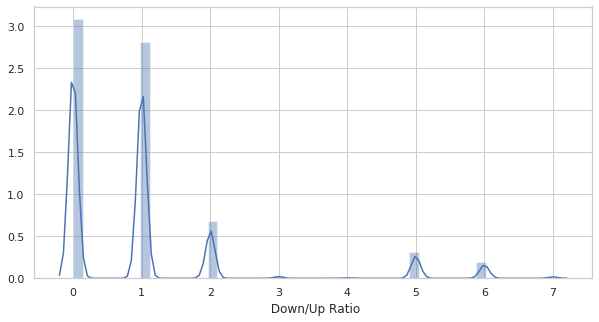

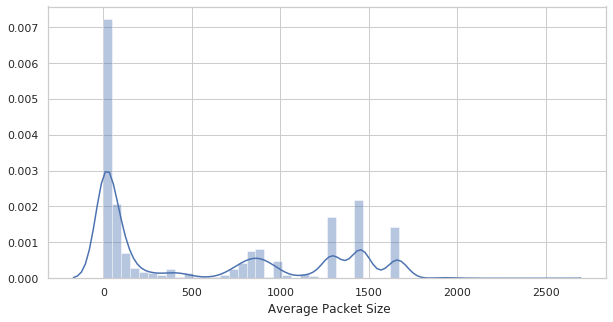

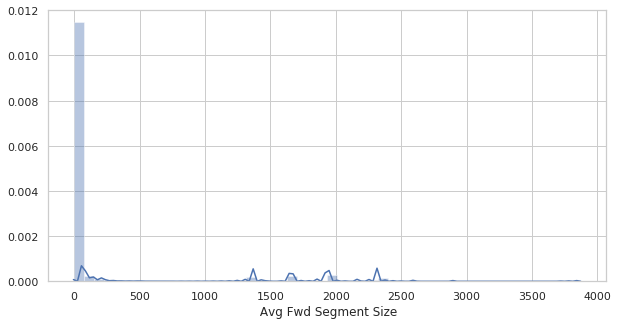

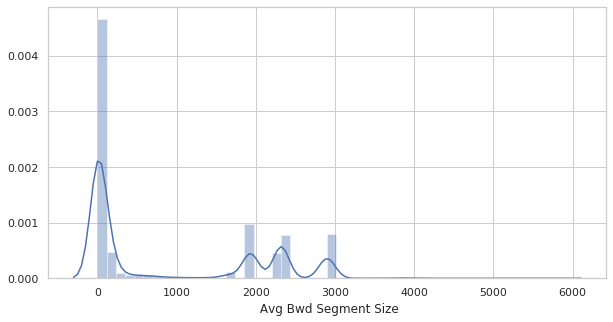

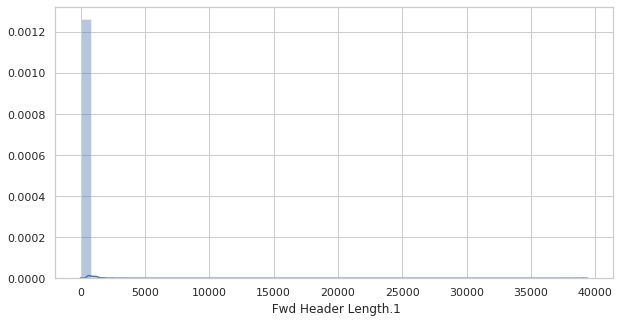

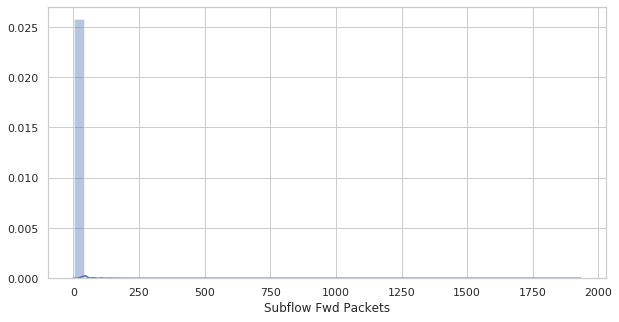

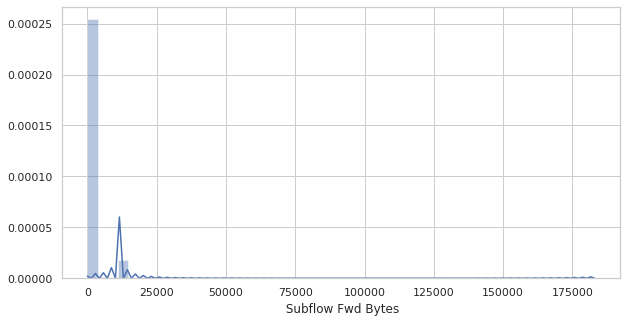

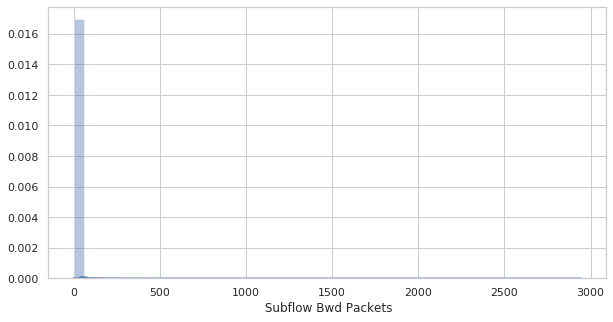

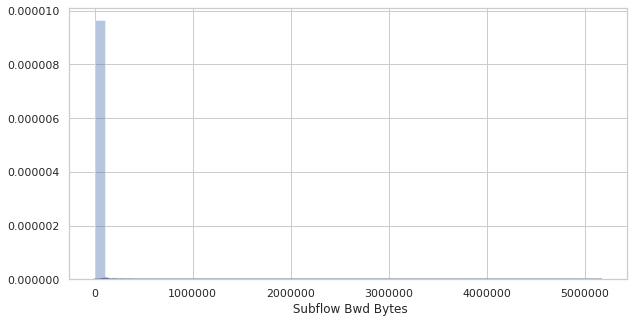

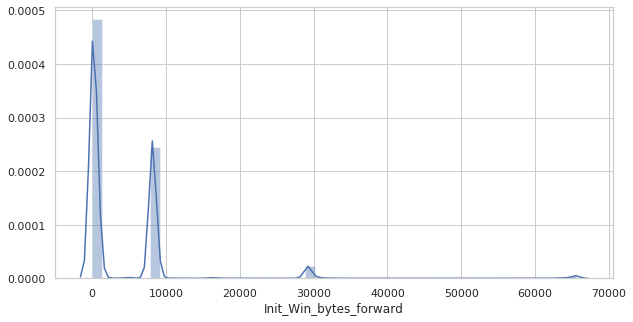

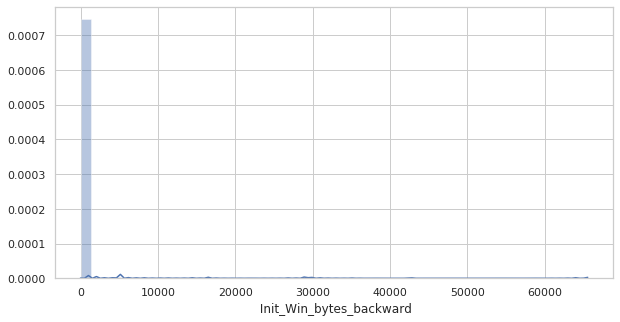

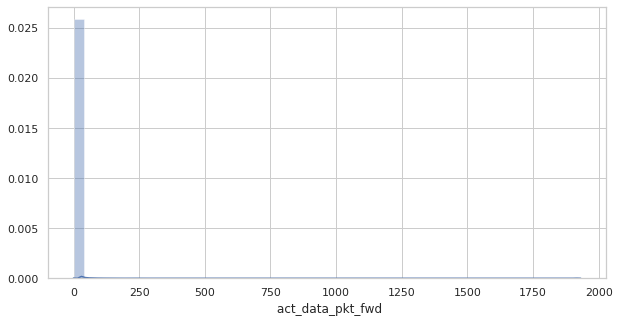

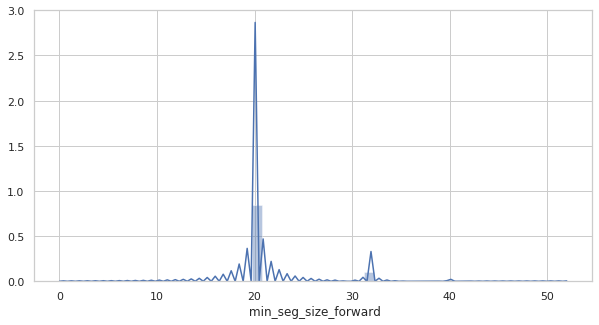

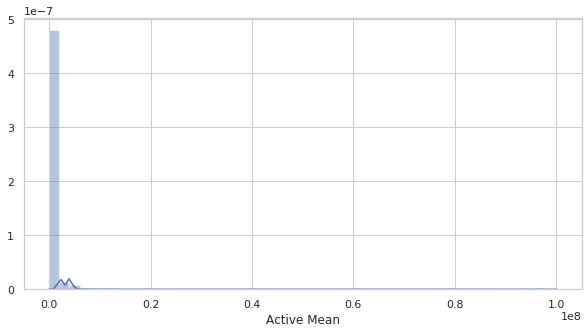

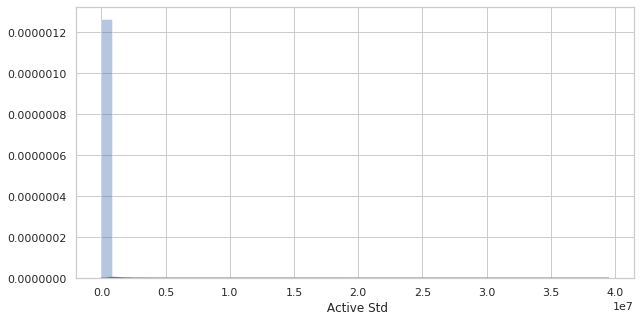

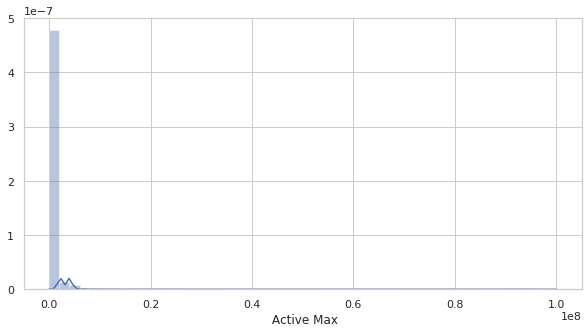

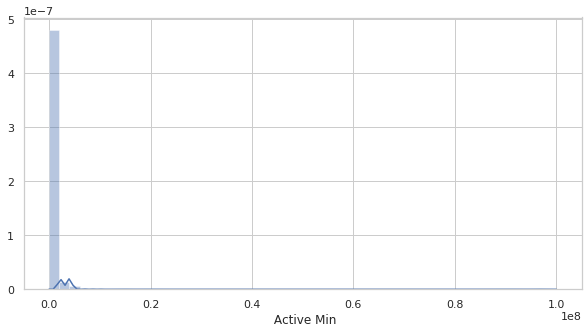

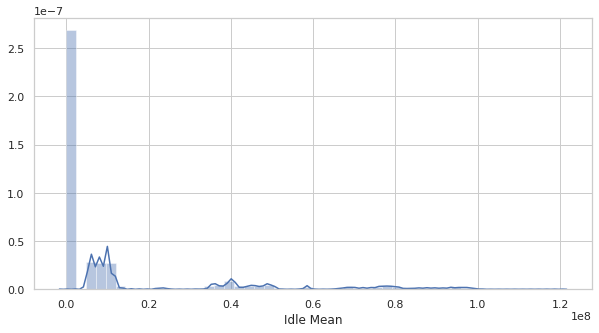

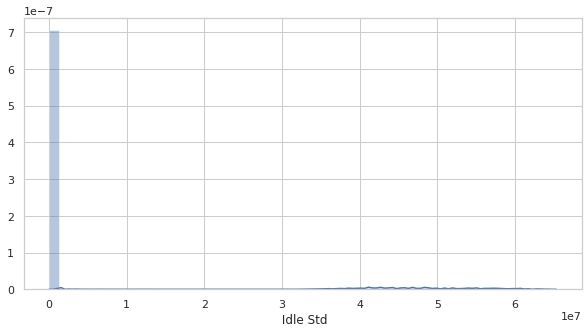

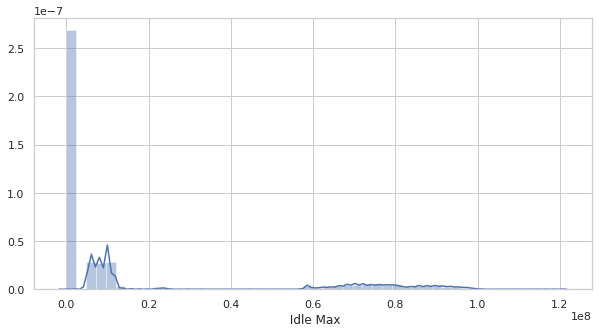

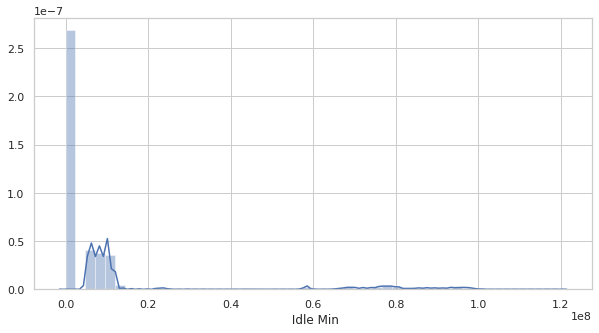

In [14]:
for i in features:
    try:
        plt.figure(figsize=(10,5))
        sns.distplot(data[i])
        plt.show()
    except:
        pass

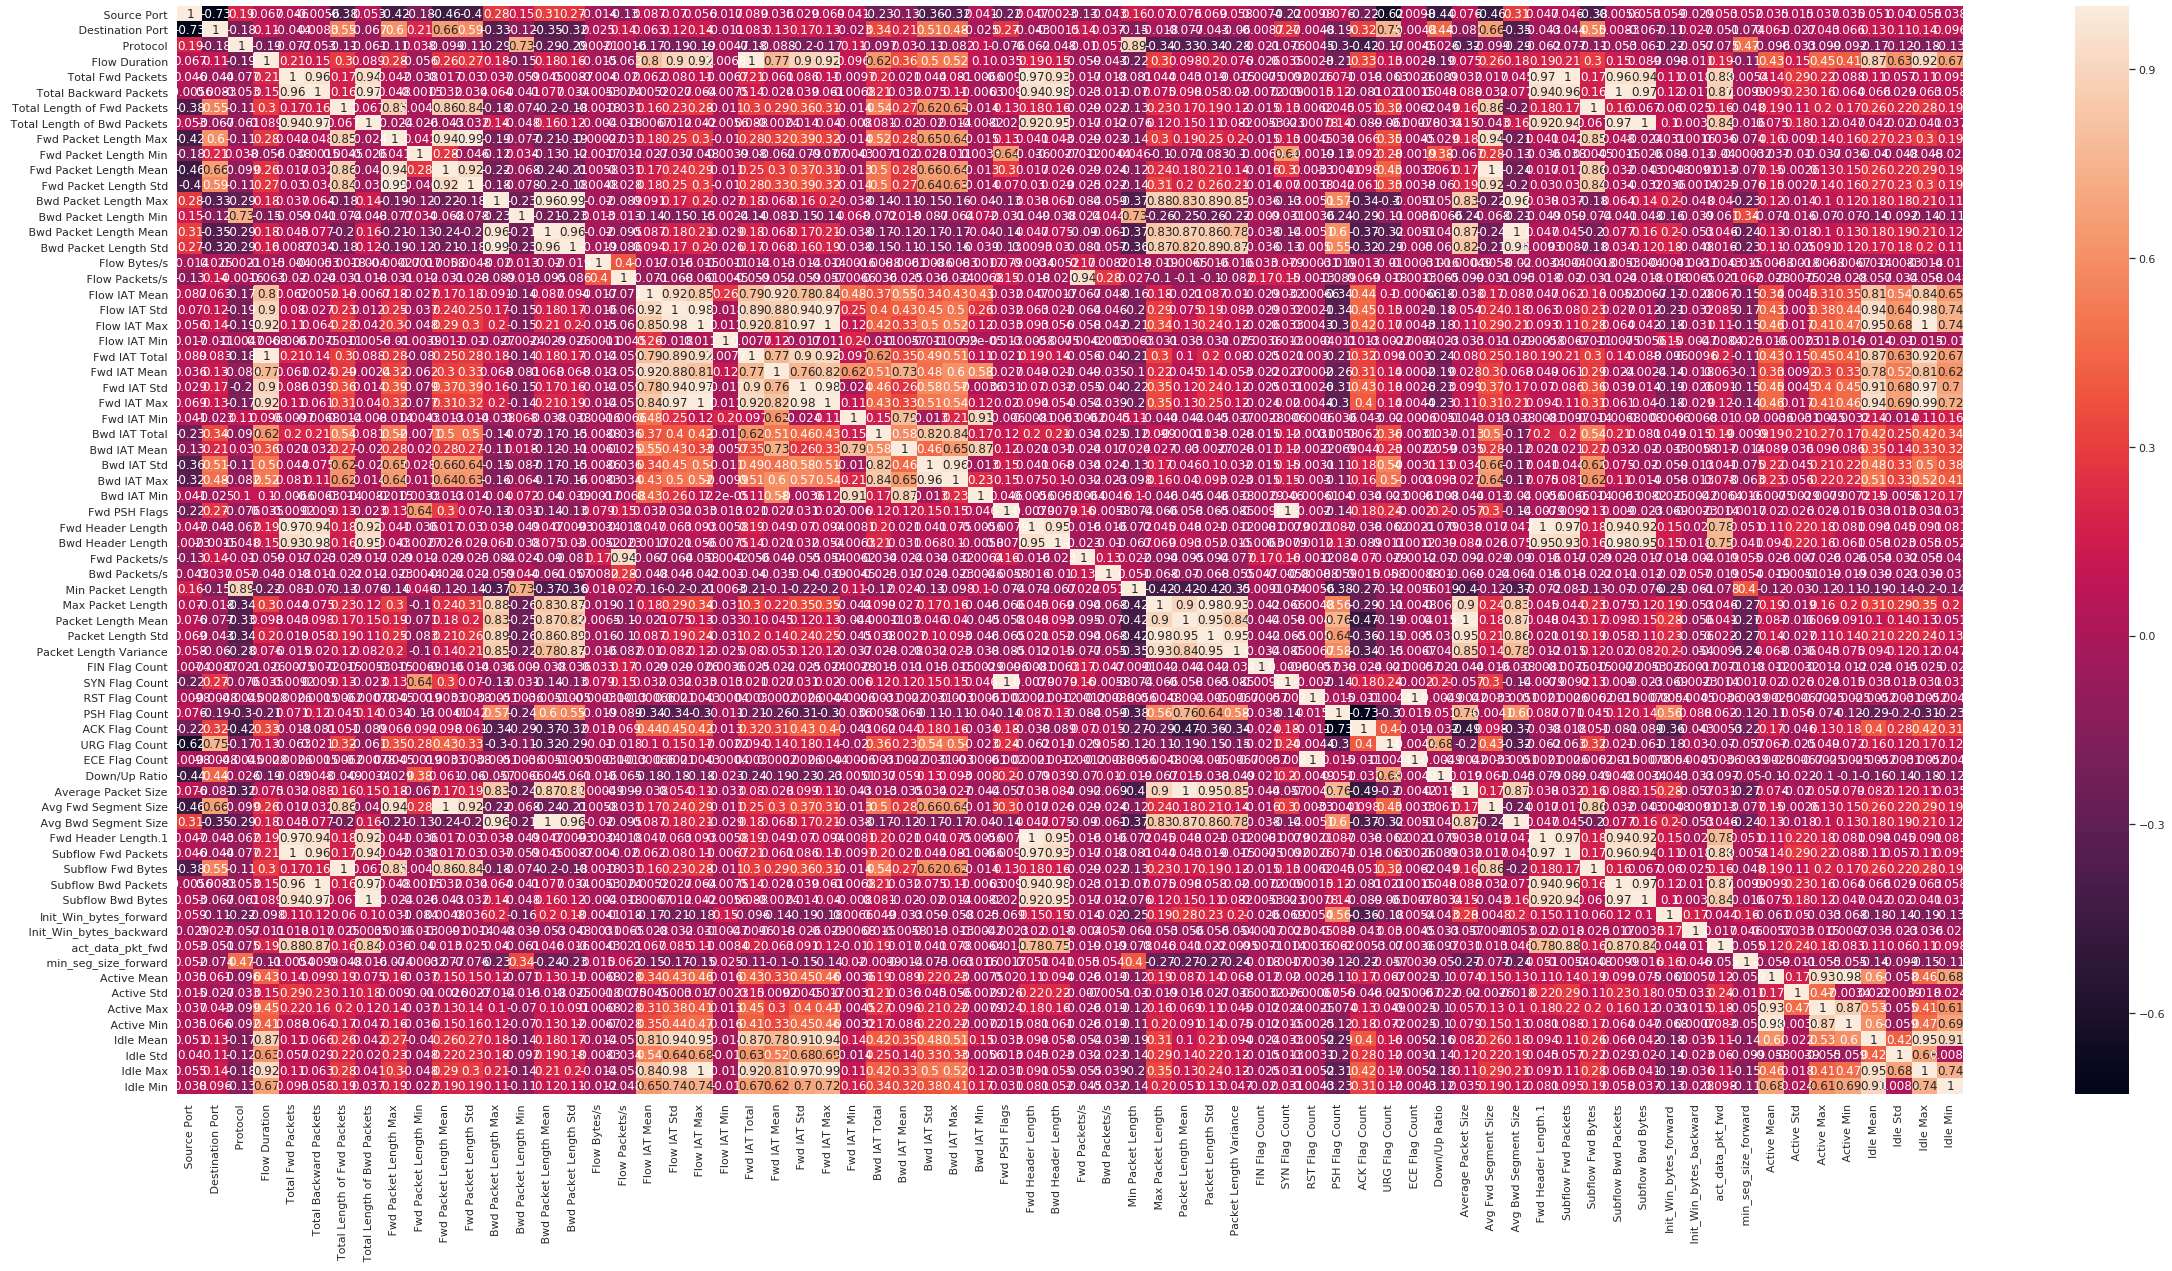

In [16]:
plt.figure(figsize=(40,20))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [17]:
normalized_df=(data-data.min())/(data.max()-data.min())

In [22]:
normalized_df.to_csv('Normalized_Data.csv')